# Generative Models as Data Augmentation in the Medical Domain

## 1. Overview

This project tries to evaluate the quality of generative models for data augmentation in the medical domain. 

Data augmentation will be relying on geometric data augmentation, (variational) auto-encoder (e.g. stacked denoising, denoising auto-encoder, etc.), and generative adversarial neural networks (e.g. GAN, DCGAN, Wasserstein GAN, etc.) for instance.

We will restrict ourself to three kind of models to generate new data and evaluate the (possible) improvement with regards to a final classification score (i.e. comparing results between augmented and non-augmented training sets). 

### Datasets

We will look into applying the above project on some (if not all) of the following datasets from the MedMNIST Classification Decathlon (https://medmnist.github.io/):

| Dataset | Classification Type | Train size | Validation size | Test size |
| :--- | :--- | :---: | :---: | :---: |  
| PathMNIST Pathology | Multi-Class (9) | 89,996 | 10,004 | 7,180 |
| DermaMNIST Dermatoscope | Multi-Class (7) | 7,007 | 1,003 | 2,005 |
| OctMNIST | Multi-Class (4) | 97,477 | 10,832 | 1,000 |
| PneumoniaMNIST Chest X-ray | Binary-Class (2) |4,708 | 524 | 624 |
| BreastMNIST Breast Ultrasound | Binary-Class (2) | 546 | 78 | 156 |
| OrganMNIST_Axial Abdominal CT | Multi-Class (11) | 34,581 | 6,491 | 17,778 |
| OragnMNIST_Coronal Abdominal CT | Multi-Class (11) |13,000 | 2,392 | 8,268 |
| OrganMNIST_Sagittal Abdominal CT | Multi-Class (11) | 13,940 | 2,452 | 8,829 |

### Notes

We will also provide a short report (in copy) explaining the choice of VAE, AE, and/or GAN models, outlining differences between datasets' results. We will also try to interprete and justify possible differences with regards to models, data specifications, visual features, and bibliography references used to support the choices made.

## 2. Data imports, Library Imports, and other preliminary declarations

### Source

We will retrieve the above dataset from the following website:

> [MedMNIST v2: A Large-Scale Lightweight Benchmark for 2D and 3D Biomedical Image Classification](https://medmnist.com/), Jiancheng Yang,Rui Shi,Donglai Wei,Zequan Liu,Lin Zhao,Bilian Ke,Hanspeter Pfister,Bingbing Ni

By following the instructions on their [github](https://github.com/MedMNIST/MedMNIST), we can download their ready-made module with the following instruction:

```sh
pip install jupyter ipywidgets IProgress
pip install medmnist
```

And load it in a python or ipython instance:

```python
import medmnist
```

### Library Imports

In [1]:
from python_scripts.classifier import run_classifier_pipeline
from python_scripts.variational_autoencoders import run_encoder_pipeline, one_hot
from python_scripts.generative_adversarial_networks import run_GAN_pipeline
from python_scripts.data import retrieve_flag_info, import_dataset
from python_scripts.data import check_cuda_availability
from python_scripts.data import generate_augmented_dataset_condVAE
from python_scripts.data import generate_augmented_dataset_jointVAE
from python_scripts.data import generate_augmented_dataset_condGAN

import os
import warnings
warnings.filterwarnings('ignore')

/home/quentin/anaconda3/envs/ML_base/lib/python3.9/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: /home/quentin/anaconda3/envs/ML_base/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZNK2at10TensorBase21__dispatch_contiguousEN3c1012MemoryFormatE
  warn(f"Failed to load image Python extension: {e}")


### Checks CUDA availability

In [2]:
check_cuda_availability()

True,0,<torch.cuda.device object at 0x7f8e54277460>,1
NVIDIA GeForce GTX 980 Ti


### Data Imports

We import the datasets in four manners:

| import # | with WSR | with Geometric DA | Application | Other transformation | 
| --- | --- | --- | --- | --- |
| 1 | No | No | To test the baseline classifier |  No | 
| 2 | Yes | No | To test the baseline classifier and train the VAE |  No | 
| 3 | Yes | No | To train the GAN |  Iimage upscale to 32x32* | 
| 4 | Yes | Yes | To test the baseline classifier |  No | 

\* Images are upscaled to 32 pixels by 32 pixels in size in order to work with TorchFusion's implementation of a GAN.


In [3]:
data_flags = ["pathmnist", "dermamnist", "octmnist", "pneumoniamnist", 
              "breastmnist", "organamnist", "organcmnist", "organsmnist"]

info_flags = {flag:retrieve_flag_info(flag) for flag in data_flags}

Using downloaded and verified file: /home/quentin/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pathmnist.npz
Montage of randomly extracted images from the dataset:


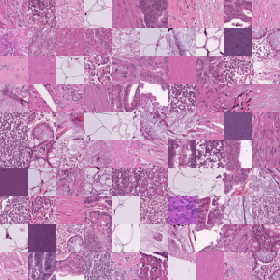

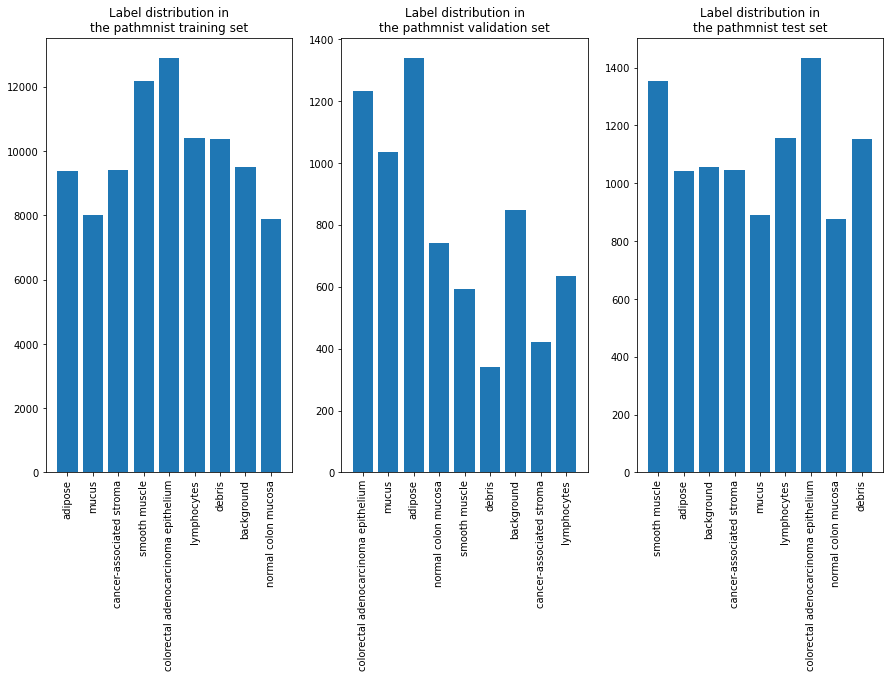

Using downloaded and verified file: /home/quentin/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pathmnist.npz


In [4]:
pathmnist_noWRS_noGDA = import_dataset(
    "pathmnist", info_flags, print_visualization=True
)
pathmnist_noGDA = import_dataset(
    "pathmnist", info_flags, sampler=True
)
pathmnist_noWSR_GDA = import_dataset(
    "pathmnist", info_flags, geometric_augment=3
)
pathmnist_WSR_GDA = import_dataset(
    "pathmnist", info_flags, sampler=True, geometric_augment=3
)
# To be used for the GAN training
pathmnist_noWRS_noGDA_upscaled = import_dataset(
    "pathmnist", info_flags, upscale=True
)

Using downloaded and verified file: /home/quentin/.medmnist/dermamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/dermamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/dermamnist.npz
Montage of randomly extracted images from the dataset:


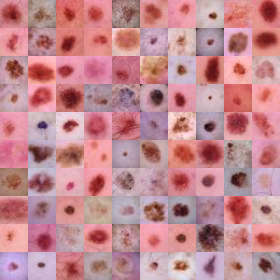

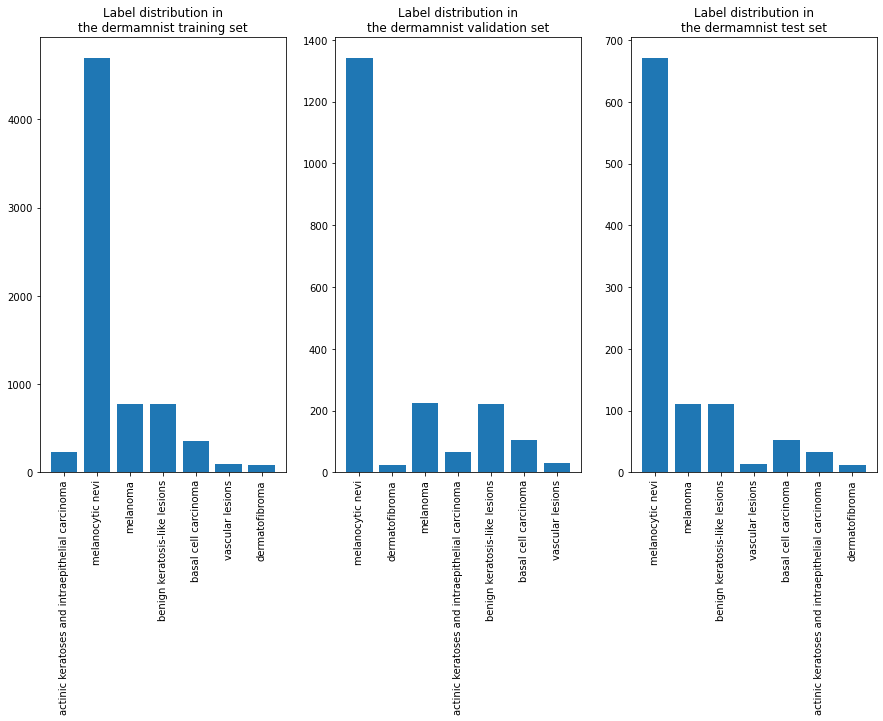

Using downloaded and verified file: /home/quentin/.medmnist/dermamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/dermamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/dermamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/dermamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/dermamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/dermamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/dermamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/dermamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/dermamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/dermamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/dermamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/dermamnist.npz


In [5]:
dermamnist_noWRS_noGDA = import_dataset(
    "dermamnist", info_flags, print_visualization=True
)
dermamnist_noGDA = import_dataset(
    "dermamnist", info_flags, sampler=True
)
dermamnist_noWSR_GDA = import_dataset(
    "dermamnist", info_flags, geometric_augment=3
)
dermamnist_WSR_GDA = import_dataset(
    "dermamnist", info_flags, sampler=True, geometric_augment=3
)
# To be used for the GAN training
dermamnist_noWRS_noGDA_upscaled = import_dataset(
    "dermamnist", info_flags, sampler=True, upscale=True
)

Using downloaded and verified file: /home/quentin/.medmnist/octmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/octmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/octmnist.npz
Montage of randomly extracted images from the dataset:


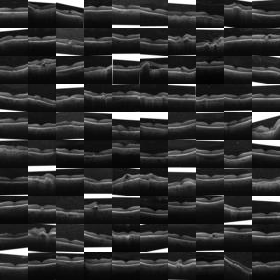

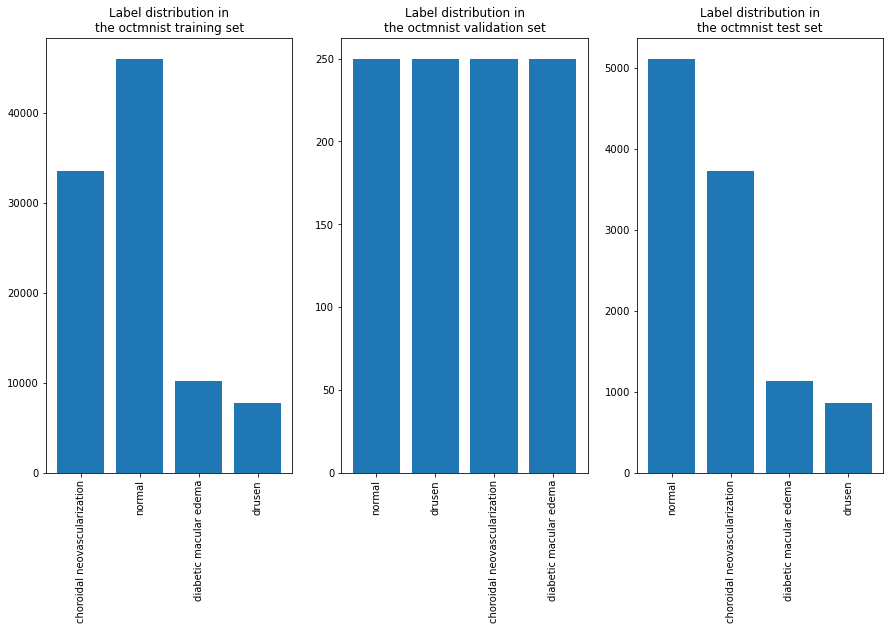

Using downloaded and verified file: /home/quentin/.medmnist/octmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/octmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/octmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/octmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/octmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/octmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/octmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/octmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/octmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/octmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/octmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/octmnist.npz


In [6]:
octmnist_noWRS_noGDA = import_dataset(
    "octmnist", info_flags, print_visualization=True
)
octmnist_noGDA = import_dataset(
    "octmnist", info_flags, sampler=True
)
octmnist_noWSR_GDA = import_dataset(
    "octmnist", info_flags, geometric_augment=2
)
octmnist_WSR_GDA = import_dataset(
    "octmnist", info_flags, sampler=True, geometric_augment=2
)
# To be used for the GAN training
octmnist_noWRS_noGDA_upscaled = import_dataset(
    "octmnist", info_flags, sampler=True, upscale=True
)

Using downloaded and verified file: /home/quentin/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pneumoniamnist.npz
Montage of randomly extracted images from the dataset:


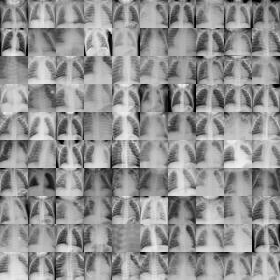

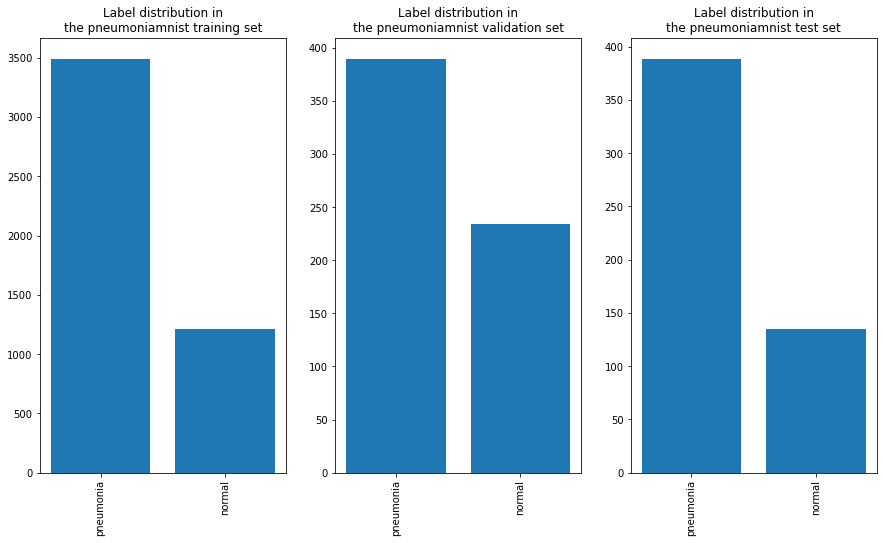

Using downloaded and verified file: /home/quentin/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pneumoniamnist.npz


In [7]:
pneumoniamnist_noWRS_noGDA = import_dataset(
    "pneumoniamnist", info_flags, print_visualization=True
)
pneumoniamnist_noGDA = import_dataset(
    "pneumoniamnist", info_flags, sampler=True
)
pneumoniamnist_noWSR_GDA = import_dataset(
    "pneumoniamnist", info_flags, geometric_augment=2
)
pneumoniamnist_WSR_GDA = import_dataset(
    "pneumoniamnist", info_flags, sampler=True, geometric_augment=2
)
# To be used for the GAN training
pneumoniamnist_noWRS_noGDA_upscaled = import_dataset(
    "pneumoniamnist", info_flags, sampler=True, upscale=True
)

Using downloaded and verified file: /home/quentin/.medmnist/breastmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/breastmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/breastmnist.npz
Montage of randomly extracted images from the dataset:


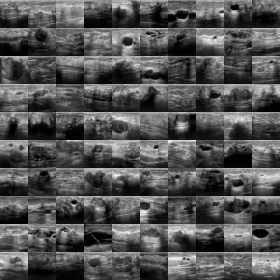

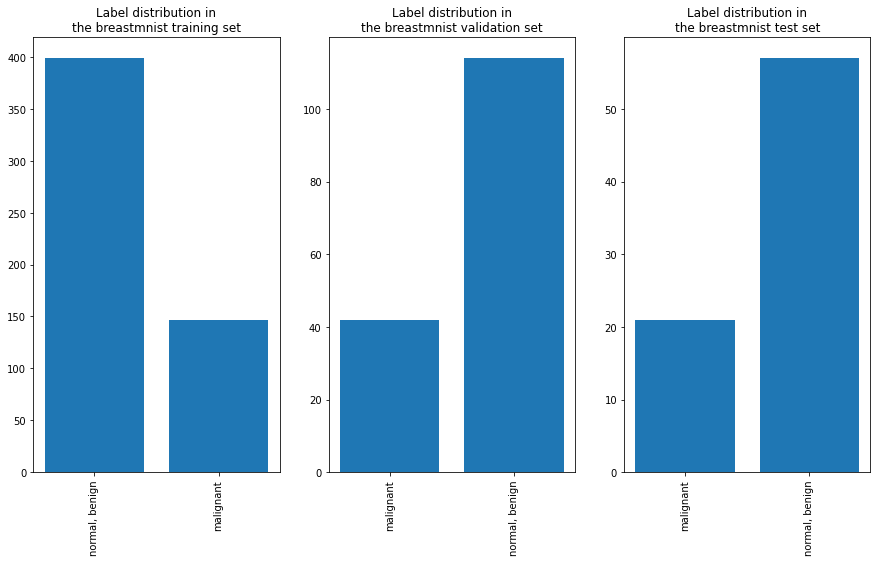

Using downloaded and verified file: /home/quentin/.medmnist/breastmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/breastmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/breastmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/breastmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/breastmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/breastmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/breastmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/breastmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/breastmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/breastmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/breastmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/breastmnist.npz


In [8]:
breastmnist_noWRS_noGDA = import_dataset(
    "breastmnist", info_flags, print_visualization=True
)
breastmnist_noGDA = import_dataset(
    "breastmnist", info_flags, sampler=True
)
breastmnist_noWSR_GDA = import_dataset(
    "breastmnist", info_flags, geometric_augment=2
)
breastmnist_WSR_GDA = import_dataset(
    "breastmnist", info_flags, sampler=True, geometric_augment=2
)
# To be used for the GAN training
breastmnist_noWRS_noGDA_upscaled = import_dataset(
    "breastmnist", info_flags, sampler=True, upscale=True
)

Using downloaded and verified file: /home/quentin/.medmnist/organamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organamnist.npz
Montage of randomly extracted images from the dataset:


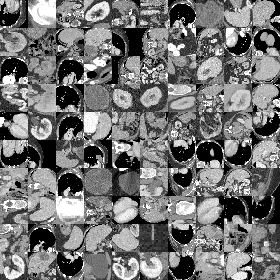

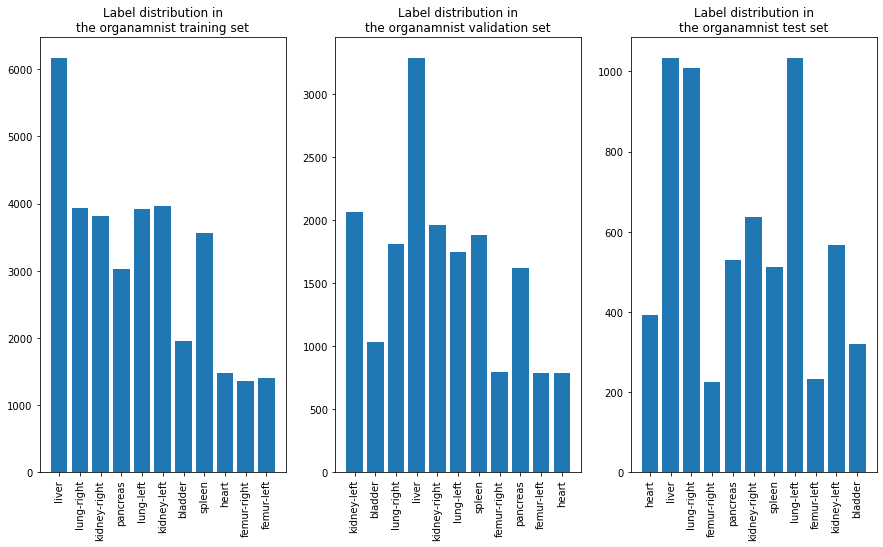

Using downloaded and verified file: /home/quentin/.medmnist/organamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organamnist.npz


In [9]:
organamnist_noWRS_noGDA = import_dataset(
    "organamnist", info_flags, print_visualization=True
)
organamnist_noGDA = import_dataset(
    "organamnist", info_flags, sampler=True
)
organamnist_noWSR_GDA = import_dataset(
    "organamnist", info_flags, geometric_augment=2
)
organamnist_WSR_GDA = import_dataset(
    "organamnist", info_flags, sampler=True, geometric_augment=2
)
# To be used for the GAN training
organamnist_noWRS_noGDA_upscaled = import_dataset(
    "organamnist", info_flags, sampler=True, upscale=True
)

Using downloaded and verified file: /home/quentin/.medmnist/organcmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organcmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organcmnist.npz
Montage of randomly extracted images from the dataset:


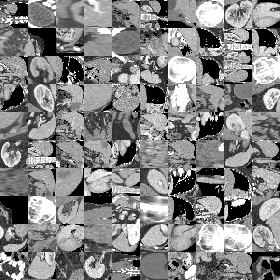

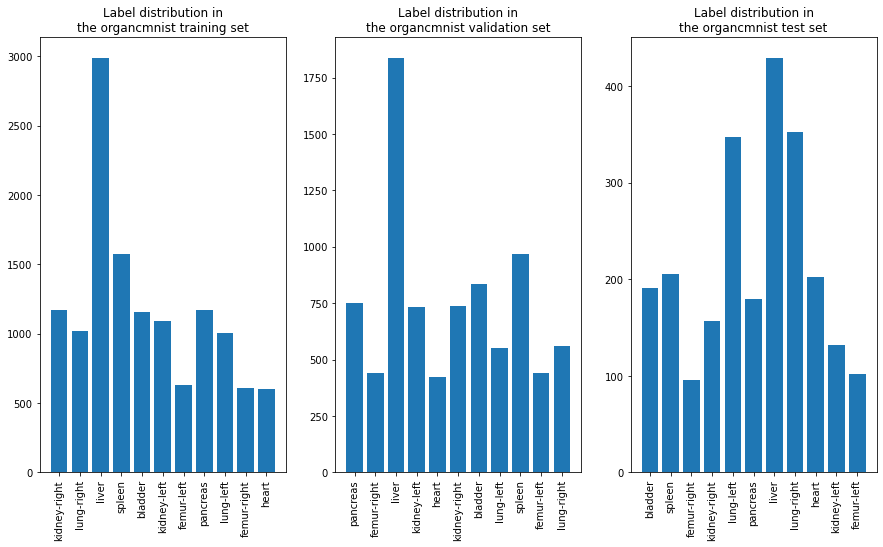

Using downloaded and verified file: /home/quentin/.medmnist/organcmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organcmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organcmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organcmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organcmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organcmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organcmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organcmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organcmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organcmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organcmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organcmnist.npz


In [10]:
organcmnist_noWRS_noGDA = import_dataset(
    "organcmnist", info_flags, print_visualization=True
)
organcmnist_noGDA = import_dataset(
    "organcmnist", info_flags, sampler=True
)
organcmnist_noWSR_GDA = import_dataset(
    "organcmnist", info_flags, geometric_augment=2
)
organcmnist_WSR_GDA = import_dataset(
    "organcmnist", info_flags, sampler=True, geometric_augment=2
)
# To be used for the GAN training
organcmnist_noWRS_noGDA_upscaled = import_dataset(
    "organcmnist", info_flags, sampler=True, upscale=True
)

Using downloaded and verified file: /home/quentin/.medmnist/organsmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organsmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organsmnist.npz
Montage of randomly extracted images from the dataset:


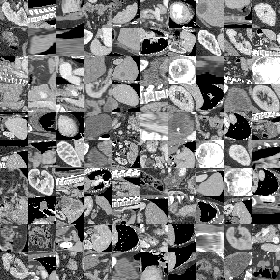

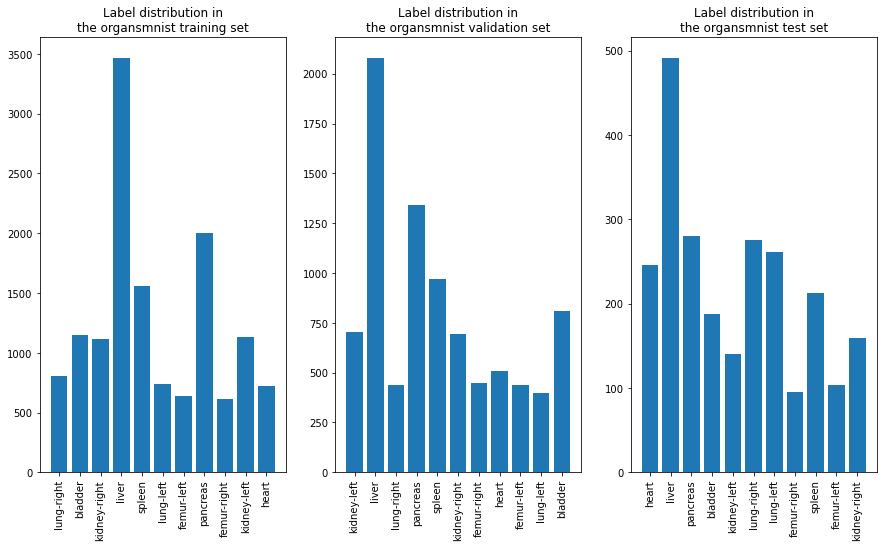

Using downloaded and verified file: /home/quentin/.medmnist/organsmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organsmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organsmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organsmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organsmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organsmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organsmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organsmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organsmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organsmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organsmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organsmnist.npz


In [11]:
organsmnist_noWRS_noGDA = import_dataset(
    "organsmnist", info_flags, print_visualization=True
)
organsmnist_noGDA = import_dataset(
    "organsmnist", info_flags, sampler=True
)
organsmnist_noWSR_GDA = import_dataset(
    "organsmnist", info_flags, geometric_augment=2
)
organsmnist_WSR_GDA = import_dataset(
    "organsmnist", info_flags, sampler=True, geometric_augment=2
)
# To be used for the GAN training
organsmnist_noWRS_noGDA_upscaled = import_dataset(
    "organsmnist", info_flags, sampler=True, upscale=True
)

## 3. Training the MedMNIST baseline classifier on dataset without Deep Learning data augmentation

Relying on the MedMNIST baseline classifier available on their github and repurposed for this notebook, we will train it on three variants of the datasets as listed in the previous section:

- Without geometric data augmentation and without weighted random sampling (the data is simply shuffled)
- With weighted random sampling and without geometric data augmentation
- With both geometric data augmentation and weighted random sampling

### 3.1. Training on the MedMNIST datasets without GDA and WSR

In [12]:
# Declares the baseline setup to save the related model
DA_technique="_noWRS_noGDA"

#### PathMNIST

{
  "python_class": "PathMNIST",
  "description": "The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of 7,180 image patches from a different clinical center. The dataset is comprised of 9 types of tissues, resulting in a multi-class classification task. We resize the source images of 3\u00d7224\u00d7224 into 3\u00d728\u00d728, and split NCT-CRC-HE-100K into training and validation set with a ratio of 9:1. The CRC-VAL-HE-7K is treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/pathmnist.npz?download=1",
  "MD5": "a8b06965200029087d5bd730944a56c1",
  "task": "multi-class",
  "label": {
    "0": "adipose",
    "1": "background",
    "2": "debris",
    "3": "lymphocytes",
    "4": "mucus",
    "5": "smooth muscle",
    "6": "normal colon mucosa"

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 56.59it/s]


train -- accuracy: 0.6647
val -- accuracy: 0.7917,  AUC: 0.9753
Epoch 1



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 57.33it/s]


train -- accuracy: 0.8253
val -- accuracy: 0.824,  AUC: 0.983
Epoch 2



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 58.47it/s]


train -- accuracy: 0.8689
val -- accuracy: 0.8343,  AUC: 0.9863
Epoch 3



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 57.94it/s]


train -- accuracy: 0.8917
val -- accuracy: 0.8401,  AUC: 0.987
Epoch 4



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 57.96it/s]


train -- accuracy: 0.9052
val -- accuracy: 0.8723,  AUC: 0.9927
Epoch 5



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 58.43it/s]


train -- accuracy: 0.9193
val -- accuracy: 0.9183,  AUC: 0.9951
Epoch 6



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 58.60it/s]


train -- accuracy: 0.9254
val -- accuracy: 0.9139,  AUC: 0.9948
Epoch 7



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:23<00:00, 58.91it/s]


train -- accuracy: 0.9324
val -- accuracy: 0.9042,  AUC: 0.9935
Epoch 8



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 58.26it/s]


train -- accuracy: 0.9389
val -- accuracy: 0.9203,  AUC: 0.9958
Epoch 9



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 58.09it/s]


train -- accuracy: 0.9429
val -- accuracy: 0.908,  AUC: 0.996
Epoch 10



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 58.16it/s]


train -- accuracy: 0.9476
val -- accuracy: 0.9322,  AUC: 0.997
Epoch 11



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:23<00:00, 58.84it/s]


train -- accuracy: 0.9506
val -- accuracy: 0.9282,  AUC: 0.9967
Epoch 12



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:23<00:00, 58.75it/s]


train -- accuracy: 0.9546
val -- accuracy: 0.9215,  AUC: 0.9964
Epoch 13



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 57.69it/s]


train -- accuracy: 0.9572
val -- accuracy: 0.9342,  AUC: 0.9969
Epoch 14



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 58.00it/s]


train -- accuracy: 0.9582
val -- accuracy: 0.9402,  AUC: 0.9976
Epoch 15



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 58.61it/s]


train -- accuracy: 0.9623
val -- accuracy: 0.9472,  AUC: 0.998
Epoch 16



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 58.34it/s]


train -- accuracy: 0.9664
val -- accuracy: 0.9318,  AUC: 0.9969
Epoch 17



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 57.94it/s]


train -- accuracy: 0.9655
val -- accuracy: 0.9454,  AUC: 0.9978
Epoch 18



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 58.45it/s]


train -- accuracy: 0.9699
val -- accuracy: 0.947,  AUC: 0.9977
Epoch 19



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 58.15it/s]


train -- accuracy: 0.9713
val -- accuracy: 0.9468,  AUC: 0.9977
test -- accuracy: 0.8436,  AUC: 0.9799


<Figure size 720x720 with 0 Axes>

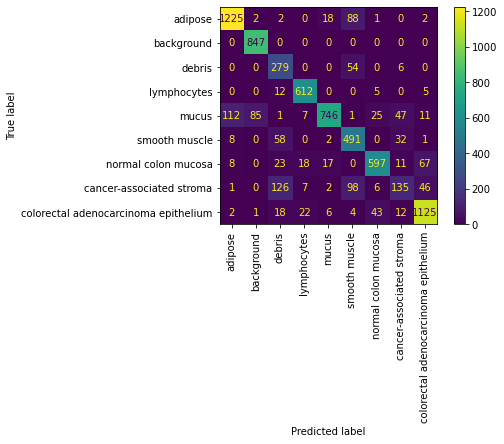

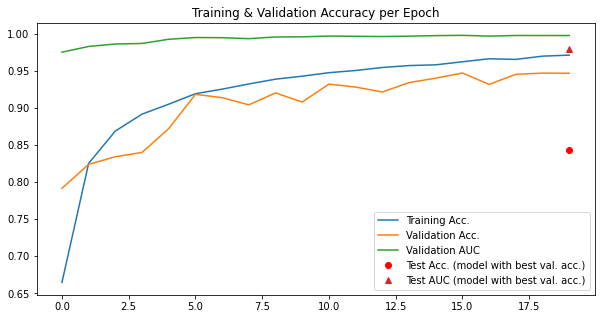

In [13]:
clf = run_classifier_pipeline(
    "pathmnist", info_flags, pathmnist_noWRS_noGDA,
    DA_technique=DA_technique
)

#### DermaMNIST

{
  "python_class": "DermaMNIST",
  "description": "The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3\u00d7600\u00d7450 are resized into 3\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/dermamnist.npz?download=1",
  "MD5": "0744692d530f8e62ec473284d019b0c7",
  "task": "multi-class",
  "label": {
    "0": "actinic keratoses and intraepithelial carcinoma",
    "1": "basal cell carcinoma",
    "2": "benign keratosis-like lesions",
    "3": "dermatofibroma",
    "4": "melanoma",
    "5": "melanocytic nevi",
    "6": "vascular lesions"
  },
  "n_channels": 3,
  "n_samples": {
    "train": 7007,
    "val": 1003,
    "test": 2005
  },
  "license": "CC B

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 56.94it/s]


train -- accuracy: 0.3177
val -- accuracy: 0.4736,  AUC: 0.8269
Epoch 1



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 58.73it/s]


train -- accuracy: 0.4367
val -- accuracy: 0.5005,  AUC: 0.8662
Epoch 2



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 59.19it/s]


train -- accuracy: 0.5145
val -- accuracy: 0.5165,  AUC: 0.8709
Epoch 3



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 58.89it/s]


train -- accuracy: 0.5612
val -- accuracy: 0.5733,  AUC: 0.8724
Epoch 4



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 57.44it/s]


train -- accuracy: 0.6154
val -- accuracy: 0.5025,  AUC: 0.8885
Epoch 5



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 57.37it/s]


train -- accuracy: 0.6738
val -- accuracy: 0.5174,  AUC: 0.869
Epoch 6



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 58.95it/s]


train -- accuracy: 0.7326
val -- accuracy: 0.5344,  AUC: 0.8896
Epoch 7



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 57.39it/s]


train -- accuracy: 0.7651
val -- accuracy: 0.675,  AUC: 0.9074
Epoch 8



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 59.09it/s]


train -- accuracy: 0.7969
val -- accuracy: 0.5573,  AUC: 0.8939
Epoch 9



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 58.43it/s]


train -- accuracy: 0.8342
val -- accuracy: 0.6461,  AUC: 0.8901
Epoch 10



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 58.20it/s]


train -- accuracy: 0.8487
val -- accuracy: 0.6949,  AUC: 0.9092
Epoch 11



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 57.39it/s]


train -- accuracy: 0.8747
val -- accuracy: 0.683,  AUC: 0.9031
Epoch 12



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 59.85it/s]


train -- accuracy: 0.8867
val -- accuracy: 0.6441,  AUC: 0.8942
Epoch 13



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 59.49it/s]


train -- accuracy: 0.9007
val -- accuracy: 0.6481,  AUC: 0.9041
Epoch 14



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 57.36it/s]


train -- accuracy: 0.9111
val -- accuracy: 0.666,  AUC: 0.9025
Epoch 15



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 57.89it/s]


train -- accuracy: 0.9259
val -- accuracy: 0.6112,  AUC: 0.8887
Epoch 16



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 57.57it/s]


train -- accuracy: 0.9272
val -- accuracy: 0.679,  AUC: 0.9002
Epoch 17



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 58.18it/s]


train -- accuracy: 0.9368
val -- accuracy: 0.6391,  AUC: 0.8995
Epoch 18



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 56.69it/s]


train -- accuracy: 0.9453
val -- accuracy: 0.7069,  AUC: 0.9052
Epoch 19



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 57.79it/s]


train -- accuracy: 0.9519
val -- accuracy: 0.6869,  AUC: 0.9044
test -- accuracy: 0.6594,  AUC: 0.8921


<Figure size 720x720 with 0 Axes>

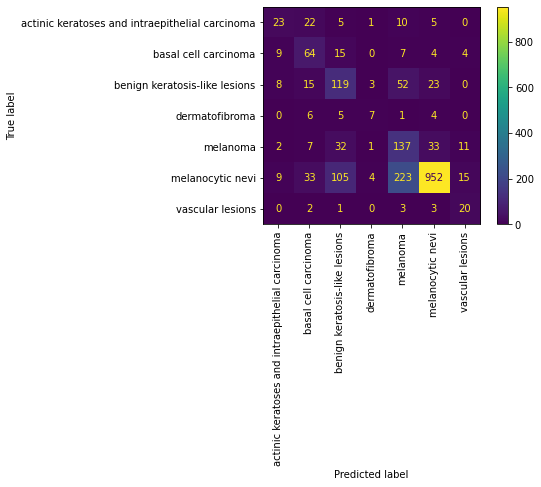

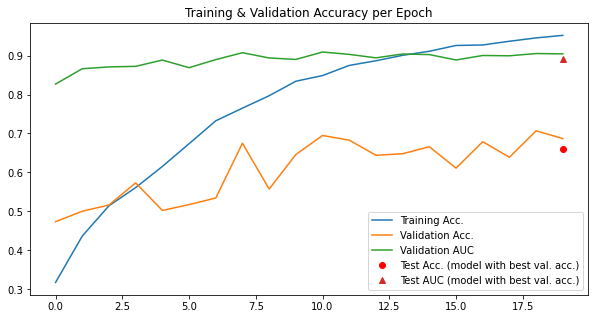

In [14]:
clf = run_classifier_pipeline(
    "dermamnist", info_flags, dermamnist_noWRS_noGDA,
    DA_technique=DA_technique
)

#### OctMNIST

{
  "python_class": "OCTMNIST",
  "description": "The OCTMNIST is based on a prior dataset of 109,309 valid optical coherence tomography (OCT) images for retinal diseases. The dataset is comprised of 4 diagnosis categories, leading to a multi-class classification task. We split the source training set with a ratio of 9:1 into training and validation set, and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384\u22121,536)\u00d7(277\u2212512). We center-crop the images and resize them into 1\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/octmnist.npz?download=1",
  "MD5": "c68d92d5b585d8d81f7112f81e2d0842",
  "task": "multi-class",
  "label": {
    "0": "choroidal neovascularization",
    "1": "diabetic macular edema",
    "2": "drusen",
    "3": "normal"
  },
  "n_channels": 1,
  "n_samples": {
    "train": 97477,
    "val": 10832,
    "test": 1000
  },
  "license": "CC BY 4.0"
}
--------------------------------

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 62.96it/s]


train -- accuracy: 0.692
val -- accuracy: 0.7915,  AUC: 0.9472
Epoch 1



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 62.67it/s]


train -- accuracy: 0.8099
val -- accuracy: 0.8781,  AUC: 0.9618
Epoch 2



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 62.87it/s]


train -- accuracy: 0.8466
val -- accuracy: 0.7328,  AUC: 0.9637
Epoch 3



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 63.15it/s]


train -- accuracy: 0.8707
val -- accuracy: 0.8783,  AUC: 0.9683
Epoch 4



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 63.47it/s]


train -- accuracy: 0.8852
val -- accuracy: 0.8723,  AUC: 0.9621
Epoch 5



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 62.60it/s]


train -- accuracy: 0.902
val -- accuracy: 0.8565,  AUC: 0.9692
Epoch 6



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:23<00:00, 63.60it/s]


train -- accuracy: 0.9154
val -- accuracy: 0.8494,  AUC: 0.9673
Epoch 7



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 62.37it/s]


train -- accuracy: 0.9252
val -- accuracy: 0.8389,  AUC: 0.9678
Epoch 8



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 63.42it/s]


train -- accuracy: 0.935
val -- accuracy: 0.9031,  AUC: 0.9715
Epoch 9



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 62.55it/s]


train -- accuracy: 0.9435
val -- accuracy: 0.8388,  AUC: 0.9673
Epoch 10



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 62.76it/s]


train -- accuracy: 0.9472
val -- accuracy: 0.8881,  AUC: 0.9701
Epoch 11



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 62.41it/s]


train -- accuracy: 0.9527
val -- accuracy: 0.9074,  AUC: 0.9716
Epoch 12



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 62.48it/s]


train -- accuracy: 0.9543
val -- accuracy: 0.8996,  AUC: 0.97
Epoch 13



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 62.73it/s]


train -- accuracy: 0.9626
val -- accuracy: 0.866,  AUC: 0.966
Epoch 14



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 63.01it/s]


train -- accuracy: 0.968
val -- accuracy: 0.9136,  AUC: 0.9742
Epoch 15



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 62.34it/s]


train -- accuracy: 0.9695
val -- accuracy: 0.9133,  AUC: 0.9721
Epoch 16



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 62.51it/s]


train -- accuracy: 0.9722
val -- accuracy: 0.8219,  AUC: 0.963
Epoch 17



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 62.93it/s]


train -- accuracy: 0.9672
val -- accuracy: 0.9093,  AUC: 0.974
Epoch 18



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 62.82it/s]


train -- accuracy: 0.976
val -- accuracy: 0.9042,  AUC: 0.9727
Epoch 19



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 62.63it/s]


train -- accuracy: 0.9771
val -- accuracy: 0.9141,  AUC: 0.9733
test -- accuracy: 0.704,  AUC: 0.934


<Figure size 720x720 with 0 Axes>

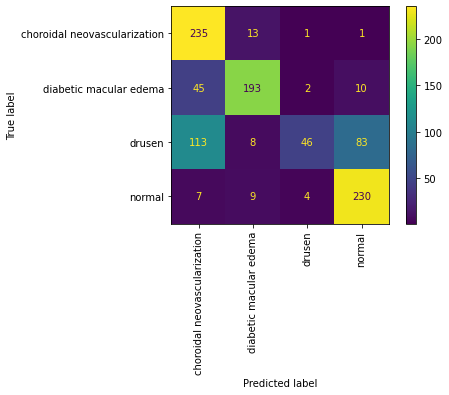

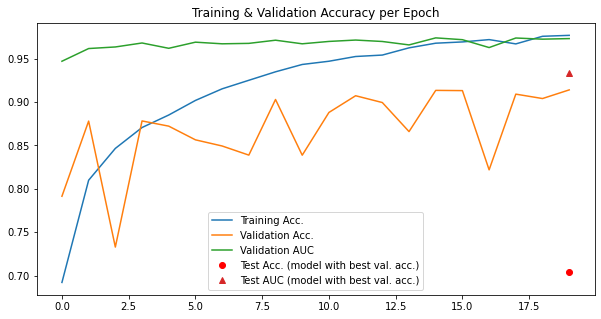

In [15]:
clf = run_classifier_pipeline(
    "octmnist", info_flags, octmnist_noWRS_noGDA,
    DA_technique=DA_technique
)

#### PneumoniaMNIST

{
  "python_class": "PneumoniaMNIST",
  "description": "The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384\u22122,916)\u00d7(127\u22122,713). We center-crop the images and resize them into 1\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/pneumoniamnist.npz?download=1",
  "MD5": "28209eda62fecd6e6a2d98b1501bb15f",
  "task": "binary-class",
  "label": {
    "0": "normal",
    "1": "pneumonia"
  },
  "n_channels": 1,
  "n_samples": {
    "train": 4708,
    "val": 524,
    "test": 624
  },
  "license": "CC BY 4.0"
}
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 65.17it/s]


train -- accuracy: 0.8218
val -- accuracy: 0.9122,  AUC: 0.9628
Epoch 1



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 64.97it/s]


train -- accuracy: 0.9427
val -- accuracy: 0.9351,  AUC: 0.9853
Epoch 2



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 64.69it/s]


train -- accuracy: 0.9573
val -- accuracy: 0.9561,  AUC: 0.9925
Epoch 3



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 64.32it/s]


train -- accuracy: 0.9611
val -- accuracy: 0.9618,  AUC: 0.9947
Epoch 4



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 62.39it/s]


train -- accuracy: 0.9754
val -- accuracy: 0.9637,  AUC: 0.9957
Epoch 5



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 63.73it/s]


train -- accuracy: 0.9773
val -- accuracy: 0.9695,  AUC: 0.9965
Epoch 6



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 63.71it/s]


train -- accuracy: 0.9834
val -- accuracy: 0.9656,  AUC: 0.9958
Epoch 7



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 61.16it/s]


train -- accuracy: 0.9887
val -- accuracy: 0.9695,  AUC: 0.9968
Epoch 8



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 63.31it/s]


train -- accuracy: 0.9896
val -- accuracy: 0.9656,  AUC: 0.9961
Epoch 9



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 61.67it/s]


train -- accuracy: 0.9943
val -- accuracy: 0.9695,  AUC: 0.9972
Epoch 10



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 63.99it/s]


train -- accuracy: 0.9964
val -- accuracy: 0.9714,  AUC: 0.9967
Epoch 11



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 61.15it/s]


train -- accuracy: 0.9972
val -- accuracy: 0.9695,  AUC: 0.9964
Epoch 12



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 63.44it/s]


train -- accuracy: 0.9983
val -- accuracy: 0.9714,  AUC: 0.9973
Epoch 13



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 61.83it/s]


train -- accuracy: 0.9966
val -- accuracy: 0.9676,  AUC: 0.9962
Epoch 14



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 62.76it/s]


train -- accuracy: 0.9992
val -- accuracy: 0.9676,  AUC: 0.9976
Epoch 15



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 63.54it/s]


train -- accuracy: 0.9992
val -- accuracy: 0.9714,  AUC: 0.9976
Epoch 16



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 65.06it/s]


train -- accuracy: 0.9998
val -- accuracy: 0.9733,  AUC: 0.9978
Epoch 17



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 65.06it/s]


train -- accuracy: 0.9994
val -- accuracy: 0.9695,  AUC: 0.9973
Epoch 18



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 62.64it/s]


train -- accuracy: 0.9994
val -- accuracy: 0.9695,  AUC: 0.9974
Epoch 19



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 64.85it/s]


train -- accuracy: 1.0
val -- accuracy: 0.9733,  AUC: 0.9974
test -- accuracy: 0.8558,  AUC: 0.958


<Figure size 720x720 with 0 Axes>

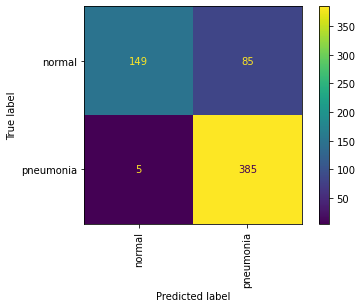

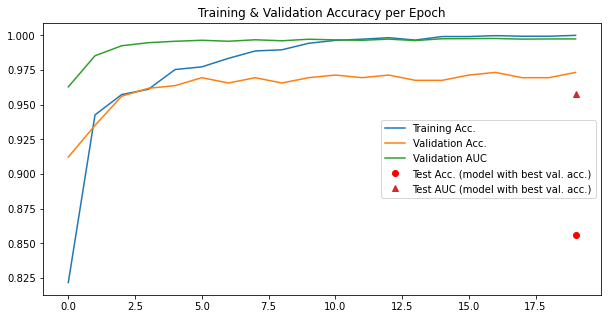

In [16]:
clf = run_classifier_pipeline(
    "pneumoniamnist", info_flags, pneumoniamnist_noWRS_noGDA,
    DA_technique=DA_technique
)

#### BreastMNIST

{
  "python_class": "BreastMNIST",
  "description": "The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1\u00d7500\u00d7500 are resized into 1\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/breastmnist.npz?download=1",
  "MD5": "750601b1f35ba3300ea97c75c52ff8f6",
  "task": "binary-class",
  "label": {
    "0": "malignant",
    "1": "normal, benign"
  },
  "n_channels": 1,
  "n_samples": {
    "train": 546,
    "val": 78,
    "test": 156
  },
  "license": "CC BY 4.0"
}
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
    

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 62.07it/s]


train -- accuracy: 0.5568
val -- accuracy: 0.2692,  AUC: 0.3241
Epoch 1



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 66.25it/s]


train -- accuracy: 0.6337
val -- accuracy: 0.5641,  AUC: 0.5965
Epoch 2



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 41.72it/s]


train -- accuracy: 0.6978
val -- accuracy: 0.4487,  AUC: 0.7561
Epoch 3



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 63.80it/s]


train -- accuracy: 0.674
val -- accuracy: 0.5385,  AUC: 0.7753
Epoch 4



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 64.29it/s]


train -- accuracy: 0.7033
val -- accuracy: 0.7051,  AUC: 0.7878
Epoch 5



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 67.54it/s]


train -- accuracy: 0.7454
val -- accuracy: 0.7179,  AUC: 0.8028
Epoch 6



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 65.06it/s]


train -- accuracy: 0.7308
val -- accuracy: 0.7179,  AUC: 0.8012
Epoch 7



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 65.86it/s]


train -- accuracy: 0.7601
val -- accuracy: 0.7436,  AUC: 0.8087
Epoch 8



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 64.35it/s]


train -- accuracy: 0.7875
val -- accuracy: 0.7436,  AUC: 0.812
Epoch 9



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 66.09it/s]


train -- accuracy: 0.7912
val -- accuracy: 0.7436,  AUC: 0.8279
Epoch 10



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 65.10it/s]


train -- accuracy: 0.8242
val -- accuracy: 0.7436,  AUC: 0.8329
Epoch 11



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 64.69it/s]


train -- accuracy: 0.8004
val -- accuracy: 0.7436,  AUC: 0.848
Epoch 12



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 61.57it/s]


train -- accuracy: 0.8425
val -- accuracy: 0.7436,  AUC: 0.8513
Epoch 13



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 59.74it/s]


train -- accuracy: 0.8297
val -- accuracy: 0.7564,  AUC: 0.8672
Epoch 14



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 67.32it/s]


train -- accuracy: 0.8535
val -- accuracy: 0.7436,  AUC: 0.8663
Epoch 15



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 62.71it/s]


train -- accuracy: 0.8919
val -- accuracy: 0.7564,  AUC: 0.873
Epoch 16



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 64.17it/s]


train -- accuracy: 0.9103
val -- accuracy: 0.7436,  AUC: 0.8722
Epoch 17



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 67.70it/s]


train -- accuracy: 0.9139
val -- accuracy: 0.8077,  AUC: 0.8939
Epoch 18



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 65.24it/s]


train -- accuracy: 0.9231
val -- accuracy: 0.7564,  AUC: 0.8822
Epoch 19



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 64.10it/s]


train -- accuracy: 0.9322
val -- accuracy: 0.8077,  AUC: 0.9006
test -- accuracy: 0.8269,  AUC: 0.8835


<Figure size 720x720 with 0 Axes>

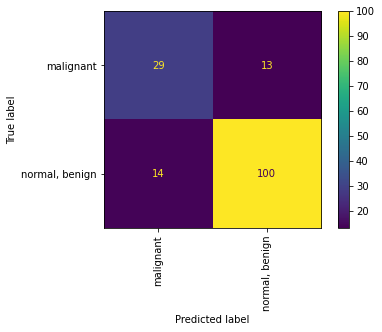

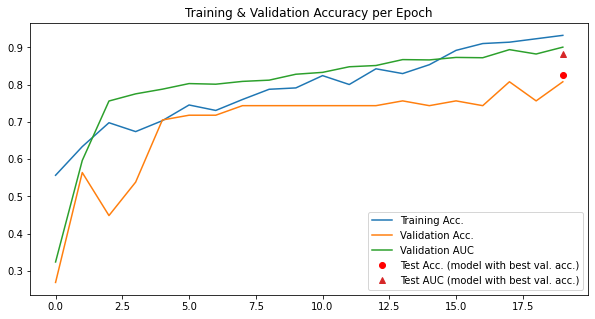

In [17]:
clf= run_classifier_pipeline(
    "breastmnist", info_flags, breastmnist_noWRS_noGDA,
    DA_technique=DA_technique
)

#### OrganAMNIST

{
  "python_class": "OrganAMNIST",
  "description": "The OrganAMNIST is based on 3D computed tomography (CT) images from Liver Tumor Segmentation Benchmark (LiTS). It is renamed from OrganMNIST_Axial (in MedMNIST v1) for simplicity. We use bounding-box annotations of 11 body organs from another study to obtain the organ labels. Hounsfield-Unit (HU) of the 3D images are transformed into gray-scale with an abdominal window. We crop 2D images from the center slices of the 3D bounding boxes in axial views (planes). The images are resized into 1\u00d728\u00d728 to perform multi-class classification of 11 body organs. 115 and 16 CT scans from the source training set are used as training and validation set, respectively. The 70 CT scans from the source test set are treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/organamnist.npz?download=1",
  "MD5": "866b832ed4eeba67bfb9edee1d5544e6",
  "task": "multi-class",
  "label": {
    "0": "bladder",
    "1": "femur-left",

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 63.80it/s]


train -- accuracy: 0.5816
val -- accuracy: 0.8906,  AUC: 0.9946
Epoch 1



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 63.14it/s]


train -- accuracy: 0.8689
val -- accuracy: 0.9532,  AUC: 0.9986
Epoch 2



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 62.47it/s]


train -- accuracy: 0.931
val -- accuracy: 0.9533,  AUC: 0.9986
Epoch 3



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 62.85it/s]


train -- accuracy: 0.9543
val -- accuracy: 0.961,  AUC: 0.999
Epoch 4



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 63.71it/s]


train -- accuracy: 0.9716
val -- accuracy: 0.9584,  AUC: 0.9993
Epoch 5



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 63.06it/s]


train -- accuracy: 0.9785
val -- accuracy: 0.9621,  AUC: 0.9993
Epoch 6



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 62.79it/s]


train -- accuracy: 0.9826
val -- accuracy: 0.9678,  AUC: 0.9993
Epoch 7



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 62.85it/s]


train -- accuracy: 0.9873
val -- accuracy: 0.9616,  AUC: 0.9992
Epoch 8



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 62.21it/s]


train -- accuracy: 0.9889
val -- accuracy: 0.9632,  AUC: 0.9991
Epoch 9



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 62.94it/s]


train -- accuracy: 0.9905
val -- accuracy: 0.9663,  AUC: 0.9993
Epoch 10



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 62.51it/s]


train -- accuracy: 0.9926
val -- accuracy: 0.969,  AUC: 0.9993
Epoch 11



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 63.21it/s]


train -- accuracy: 0.9944
val -- accuracy: 0.9661,  AUC: 0.9995
Epoch 12



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 62.84it/s]


train -- accuracy: 0.9952
val -- accuracy: 0.9701,  AUC: 0.9994
Epoch 13



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 62.98it/s]


train -- accuracy: 0.9947
val -- accuracy: 0.9718,  AUC: 0.9994
Epoch 14



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 63.98it/s]


train -- accuracy: 0.9975
val -- accuracy: 0.9698,  AUC: 0.9992
Epoch 15



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 63.88it/s]


train -- accuracy: 0.9973
val -- accuracy: 0.9695,  AUC: 0.9994
Epoch 16



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 64.11it/s]


train -- accuracy: 0.9975
val -- accuracy: 0.9641,  AUC: 0.9993
Epoch 17



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 61.92it/s]


train -- accuracy: 0.9977
val -- accuracy: 0.9697,  AUC: 0.9994
Epoch 18



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 63.35it/s]


train -- accuracy: 0.998
val -- accuracy: 0.97,  AUC: 0.9994
Epoch 19



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 62.35it/s]


train -- accuracy: 0.9981
val -- accuracy: 0.9726,  AUC: 0.9994
test -- accuracy: 0.881,  AUC: 0.9912


<Figure size 720x720 with 0 Axes>

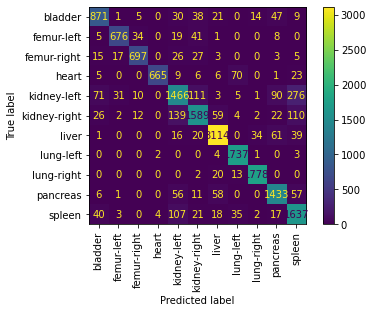

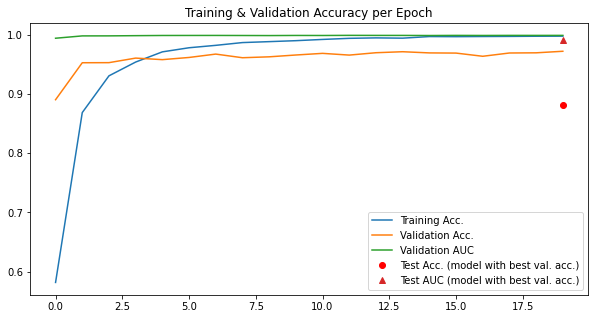

In [18]:
clf = run_classifier_pipeline(
    "organamnist", info_flags, organamnist_noWRS_noGDA,
    DA_technique=DA_technique
)

#### OrganCMNIST

{
  "python_class": "OrganCMNIST",
  "description": "The OrganCMNIST is based on 3D computed tomography (CT) images from Liver Tumor Segmentation Benchmark (LiTS). It is renamed from OrganMNIST_Coronal (in MedMNIST v1) for simplicity. We use bounding-box annotations of 11 body organs from another study to obtain the organ labels. Hounsfield-Unit (HU) of the 3D images are transformed into gray-scale with an abdominal window. We crop 2D images from the center slices of the 3D bounding boxes in coronal views (planes). The images are resized into 1\u00d728\u00d728 to perform multi-class classification of 11 body organs. 115 and 16 CT scans from the source training set are used as training and validation set, respectively. The 70 CT scans from the source test set are treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/organcmnist.npz?download=1",
  "MD5": "0afa5834fb105f7705a7d93372119a21",
  "task": "multi-class",
  "label": {
    "0": "bladder",
    "1": "femur-le

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 63.93it/s]


train -- accuracy: 0.403
val -- accuracy: 0.7266,  AUC: 0.9543
Epoch 1



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 61.71it/s]


train -- accuracy: 0.6825
val -- accuracy: 0.8516,  AUC: 0.9895
Epoch 2



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 64.19it/s]


train -- accuracy: 0.7987
val -- accuracy: 0.9034,  AUC: 0.995
Epoch 3



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 64.20it/s]


train -- accuracy: 0.8572
val -- accuracy: 0.9093,  AUC: 0.9955
Epoch 4



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 63.00it/s]


train -- accuracy: 0.8854
val -- accuracy: 0.9239,  AUC: 0.9971
Epoch 5



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 63.78it/s]


train -- accuracy: 0.8981
val -- accuracy: 0.9423,  AUC: 0.9977
Epoch 6



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 63.14it/s]


train -- accuracy: 0.9194
val -- accuracy: 0.9314,  AUC: 0.9974
Epoch 7



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 63.69it/s]


train -- accuracy: 0.9258
val -- accuracy: 0.9348,  AUC: 0.9982
Epoch 8



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 63.79it/s]


train -- accuracy: 0.9382
val -- accuracy: 0.9356,  AUC: 0.9978
Epoch 9



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 63.49it/s]


train -- accuracy: 0.9487
val -- accuracy: 0.9486,  AUC: 0.998
Epoch 10



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 64.08it/s]


train -- accuracy: 0.9575
val -- accuracy: 0.9415,  AUC: 0.9982
Epoch 11



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 64.24it/s]


train -- accuracy: 0.9596
val -- accuracy: 0.9419,  AUC: 0.998
Epoch 12



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 63.59it/s]


train -- accuracy: 0.9657
val -- accuracy: 0.9402,  AUC: 0.9974
Epoch 13



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 63.24it/s]


train -- accuracy: 0.9635
val -- accuracy: 0.9473,  AUC: 0.998
Epoch 14



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 62.73it/s]


train -- accuracy: 0.9715
val -- accuracy: 0.9406,  AUC: 0.9978
Epoch 15



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 64.13it/s]


train -- accuracy: 0.9748
val -- accuracy: 0.9519,  AUC: 0.9984
Epoch 16



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 62.85it/s]


train -- accuracy: 0.9774
val -- accuracy: 0.9515,  AUC: 0.9984
Epoch 17



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 63.56it/s]


train -- accuracy: 0.9822
val -- accuracy: 0.9582,  AUC: 0.9985
Epoch 18



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 64.04it/s]


train -- accuracy: 0.9877
val -- accuracy: 0.9498,  AUC: 0.9982
Epoch 19



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 64.23it/s]


train -- accuracy: 0.9884
val -- accuracy: 0.9532,  AUC: 0.9986
test -- accuracy: 0.8625,  AUC: 0.9872


<Figure size 720x720 with 0 Axes>

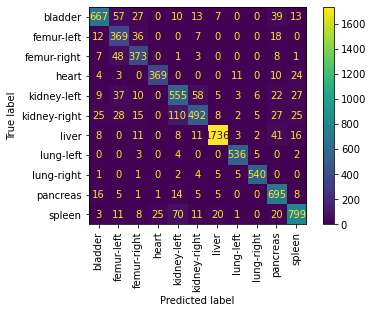

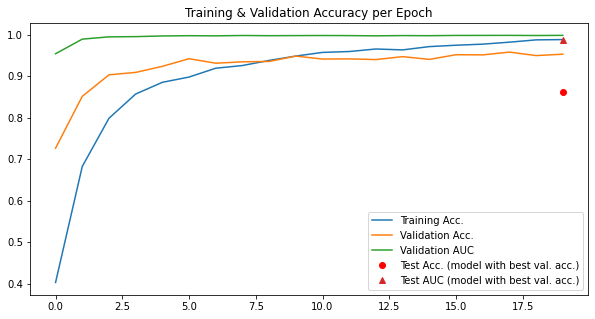

In [19]:
clf = run_classifier_pipeline(
    "organcmnist", info_flags, organcmnist_noWRS_noGDA,
    DA_technique=DA_technique
)

#### OrganSMNIST

{
  "python_class": "OrganSMNIST",
  "description": "The OrganSMNIST is based on 3D computed tomography (CT) images from Liver Tumor Segmentation Benchmark (LiTS). It is renamed from OrganMNIST_Sagittal (in MedMNIST v1) for simplicity. We use bounding-box annotations of 11 body organs from another study to obtain the organ labels. Hounsfield-Unit (HU) of the 3D images are transformed into gray-scale with an abdominal window. We crop 2D images from the center slices of the 3D bounding boxes in sagittal views (planes). The images are resized into 1\u00d728\u00d728 to perform multi-class classification of 11 body organs. 115 and 16 CT scans from the source training set are used as training and validation set, respectively. The 70 CT scans from the source test set are treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/organsmnist.npz?download=1",
  "MD5": "e5c39f1af030238290b9557d9503af9d",
  "task": "multi-class",
  "label": {
    "0": "bladder",
    "1": "femur-

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 62.52it/s]


train -- accuracy: 0.335
val -- accuracy: 0.5359,  AUC: 0.9312
Epoch 1



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 61.95it/s]


train -- accuracy: 0.5295
val -- accuracy: 0.6203,  AUC: 0.955
Epoch 2



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 63.91it/s]


train -- accuracy: 0.6371
val -- accuracy: 0.7557,  AUC: 0.9829
Epoch 3



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 64.49it/s]


train -- accuracy: 0.6996
val -- accuracy: 0.7867,  AUC: 0.9864
Epoch 4



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 64.02it/s]


train -- accuracy: 0.7374
val -- accuracy: 0.8242,  AUC: 0.9879
Epoch 5



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 64.26it/s]


train -- accuracy: 0.7646
val -- accuracy: 0.821,  AUC: 0.9886
Epoch 6



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 63.51it/s]


train -- accuracy: 0.7941
val -- accuracy: 0.8467,  AUC: 0.9891
Epoch 7



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 62.10it/s]


train -- accuracy: 0.8122
val -- accuracy: 0.8467,  AUC: 0.9892
Epoch 8



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 62.92it/s]


train -- accuracy: 0.8263
val -- accuracy: 0.8409,  AUC: 0.9892
Epoch 9



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 63.09it/s]


train -- accuracy: 0.8491
val -- accuracy: 0.8377,  AUC: 0.9883
Epoch 10



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 63.39it/s]


train -- accuracy: 0.8664
val -- accuracy: 0.8128,  AUC: 0.9879
Epoch 11



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 62.74it/s]


train -- accuracy: 0.8783
val -- accuracy: 0.8063,  AUC: 0.988
Epoch 12



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 62.81it/s]


train -- accuracy: 0.8902
val -- accuracy: 0.8316,  AUC: 0.9869
Epoch 13



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 63.06it/s]


train -- accuracy: 0.9075
val -- accuracy: 0.823,  AUC: 0.9882
Epoch 14



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 63.32it/s]


train -- accuracy: 0.9122
val -- accuracy: 0.8267,  AUC: 0.9885
Epoch 15



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 61.63it/s]


train -- accuracy: 0.92
val -- accuracy: 0.8271,  AUC: 0.9892
Epoch 16



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 61.37it/s]


train -- accuracy: 0.9349
val -- accuracy: 0.8471,  AUC: 0.9895
Epoch 17



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 62.05it/s]


train -- accuracy: 0.9419
val -- accuracy: 0.8556,  AUC: 0.9895
Epoch 18



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 63.17it/s]


train -- accuracy: 0.9481
val -- accuracy: 0.8348,  AUC: 0.9874
Epoch 19



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 62.86it/s]


train -- accuracy: 0.9541
val -- accuracy: 0.8487,  AUC: 0.9893
test -- accuracy: 0.7192,  AUC: 0.9646


<Figure size 720x720 with 0 Axes>

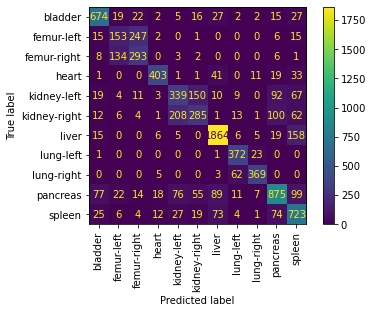

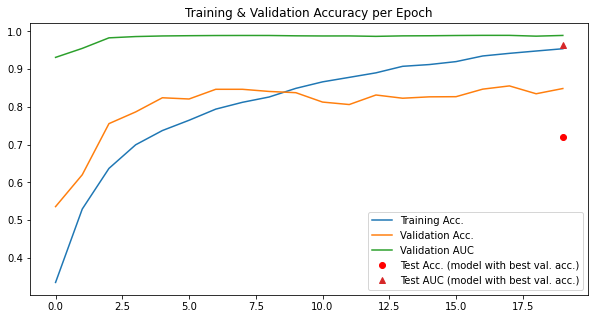

In [20]:
clf = run_classifier_pipeline(
    "organsmnist", info_flags, organsmnist_noWRS_noGDA,
    DA_technique=DA_technique
)

### 3.2. Training on the MedMNIST datasets with WSR and without GDA

In [21]:
# Declares the baseline setup to save the related model
DA_technique="_noGDA"

#### PathMNIST

{
  "python_class": "PathMNIST",
  "description": "The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of 7,180 image patches from a different clinical center. The dataset is comprised of 9 types of tissues, resulting in a multi-class classification task. We resize the source images of 3\u00d7224\u00d7224 into 3\u00d728\u00d728, and split NCT-CRC-HE-100K into training and validation set with a ratio of 9:1. The CRC-VAL-HE-7K is treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/pathmnist.npz?download=1",
  "MD5": "a8b06965200029087d5bd730944a56c1",
  "task": "multi-class",
  "label": {
    "0": "adipose",
    "1": "background",
    "2": "debris",
    "3": "lymphocytes",
    "4": "mucus",
    "5": "smooth muscle",
    "6": "normal colon mucosa"

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 57.69it/s]


train -- accuracy: 0.6606
val -- accuracy: 0.7762,  AUC: 0.9733
Epoch 1



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 57.99it/s]


train -- accuracy: 0.8346
val -- accuracy: 0.8413,  AUC: 0.986
Epoch 2



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 57.72it/s]


train -- accuracy: 0.875
val -- accuracy: 0.8747,  AUC: 0.9917
Epoch 3



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 57.82it/s]


train -- accuracy: 0.8947
val -- accuracy: 0.8757,  AUC: 0.9909
Epoch 4



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 58.52it/s]


train -- accuracy: 0.9117
val -- accuracy: 0.9181,  AUC: 0.995
Epoch 5



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 58.18it/s]


train -- accuracy: 0.9195
val -- accuracy: 0.9065,  AUC: 0.994
Epoch 6



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 57.95it/s]


train -- accuracy: 0.9295
val -- accuracy: 0.898,  AUC: 0.995
Epoch 7



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 58.34it/s]


train -- accuracy: 0.9351
val -- accuracy: 0.9262,  AUC: 0.9963
Epoch 8



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 58.03it/s]


train -- accuracy: 0.9405
val -- accuracy: 0.936,  AUC: 0.9968
Epoch 9



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 58.10it/s]


train -- accuracy: 0.9452
val -- accuracy: 0.9314,  AUC: 0.9964
Epoch 10



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 57.50it/s]


train -- accuracy: 0.9473
val -- accuracy: 0.9367,  AUC: 0.9969
Epoch 11



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 58.22it/s]


train -- accuracy: 0.9504
val -- accuracy: 0.9274,  AUC: 0.9967
Epoch 12



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 58.21it/s]


train -- accuracy: 0.9572
val -- accuracy: 0.9267,  AUC: 0.9963
Epoch 13



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 57.47it/s]


train -- accuracy: 0.9584
val -- accuracy: 0.9188,  AUC: 0.9958
Epoch 14



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 57.06it/s]


train -- accuracy: 0.9568
val -- accuracy: 0.9364,  AUC: 0.9969
Epoch 15



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 57.20it/s]


train -- accuracy: 0.9629
val -- accuracy: 0.9409,  AUC: 0.9973
Epoch 16



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 57.52it/s]


train -- accuracy: 0.9654
val -- accuracy: 0.9423,  AUC: 0.9972
Epoch 17



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 57.70it/s]


train -- accuracy: 0.9675
val -- accuracy: 0.9486,  AUC: 0.9977
Epoch 18



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 57.67it/s]


train -- accuracy: 0.9697
val -- accuracy: 0.9428,  AUC: 0.997
Epoch 19



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [00:24<00:00, 57.45it/s]


train -- accuracy: 0.9715
val -- accuracy: 0.9269,  AUC: 0.9969
test -- accuracy: 0.7993,  AUC: 0.9667


<Figure size 720x720 with 0 Axes>

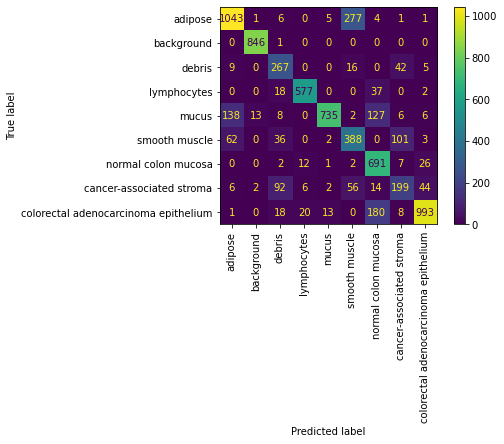

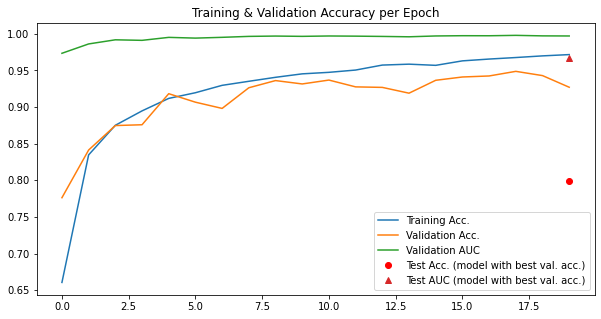

In [22]:
clf = run_classifier_pipeline(
    "pathmnist", info_flags, pathmnist_noGDA,
    DA_technique=DA_technique
)

#### DermaMNIST

{
  "python_class": "DermaMNIST",
  "description": "The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3\u00d7600\u00d7450 are resized into 3\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/dermamnist.npz?download=1",
  "MD5": "0744692d530f8e62ec473284d019b0c7",
  "task": "multi-class",
  "label": {
    "0": "actinic keratoses and intraepithelial carcinoma",
    "1": "basal cell carcinoma",
    "2": "benign keratosis-like lesions",
    "3": "dermatofibroma",
    "4": "melanoma",
    "5": "melanocytic nevi",
    "6": "vascular lesions"
  },
  "n_channels": 3,
  "n_samples": {
    "train": 7007,
    "val": 1003,
    "test": 2005
  },
  "license": "CC B

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 59.04it/s]


train -- accuracy: 0.3114
val -- accuracy: 0.4407,  AUC: 0.8019
Epoch 1



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 57.57it/s]


train -- accuracy: 0.4737
val -- accuracy: 0.4975,  AUC: 0.8571
Epoch 2



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 59.50it/s]


train -- accuracy: 0.5143
val -- accuracy: 0.5025,  AUC: 0.8725
Epoch 3



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 58.06it/s]


train -- accuracy: 0.5764
val -- accuracy: 0.5204,  AUC: 0.8839
Epoch 4



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 58.84it/s]


train -- accuracy: 0.6429
val -- accuracy: 0.5045,  AUC: 0.8762
Epoch 5



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 57.59it/s]


train -- accuracy: 0.6787
val -- accuracy: 0.5693,  AUC: 0.8841
Epoch 6



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 58.45it/s]


train -- accuracy: 0.7445
val -- accuracy: 0.5753,  AUC: 0.8892
Epoch 7



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 57.85it/s]


train -- accuracy: 0.7828
val -- accuracy: 0.65,  AUC: 0.89
Epoch 8



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 58.22it/s]


train -- accuracy: 0.8065
val -- accuracy: 0.6002,  AUC: 0.8914
Epoch 9



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 59.48it/s]


train -- accuracy: 0.8333
val -- accuracy: 0.6042,  AUC: 0.896
Epoch 10



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 60.26it/s]


train -- accuracy: 0.8536
val -- accuracy: 0.67,  AUC: 0.9011
Epoch 11



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 57.45it/s]


train -- accuracy: 0.885
val -- accuracy: 0.5693,  AUC: 0.8801
Epoch 12



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 59.67it/s]


train -- accuracy: 0.8981
val -- accuracy: 0.6102,  AUC: 0.8952
Epoch 13



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 58.19it/s]


train -- accuracy: 0.9031
val -- accuracy: 0.663,  AUC: 0.8827
Epoch 14



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 58.42it/s]


train -- accuracy: 0.9184
val -- accuracy: 0.673,  AUC: 0.8964
Epoch 15



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 56.73it/s]


train -- accuracy: 0.9298
val -- accuracy: 0.6082,  AUC: 0.8751
Epoch 16



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 57.54it/s]


train -- accuracy: 0.9341
val -- accuracy: 0.65,  AUC: 0.8758
Epoch 17



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 57.55it/s]


train -- accuracy: 0.9395
val -- accuracy: 0.675,  AUC: 0.8906
Epoch 18



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 58.11it/s]


train -- accuracy: 0.9475
val -- accuracy: 0.6979,  AUC: 0.882
Epoch 19



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:01<00:00, 58.12it/s]


train -- accuracy: 0.9536
val -- accuracy: 0.7079,  AUC: 0.8877
test -- accuracy: 0.6943,  AUC: 0.8962


<Figure size 720x720 with 0 Axes>

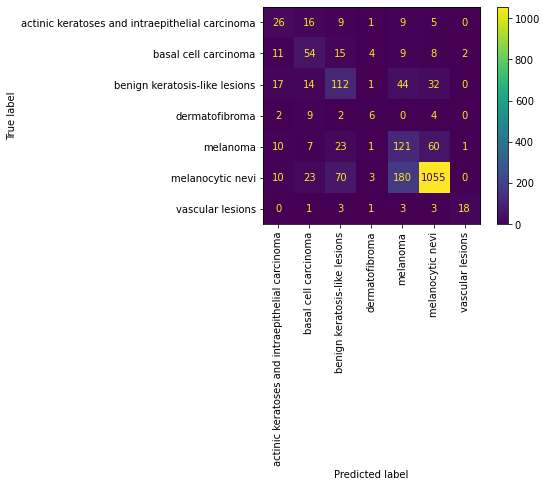

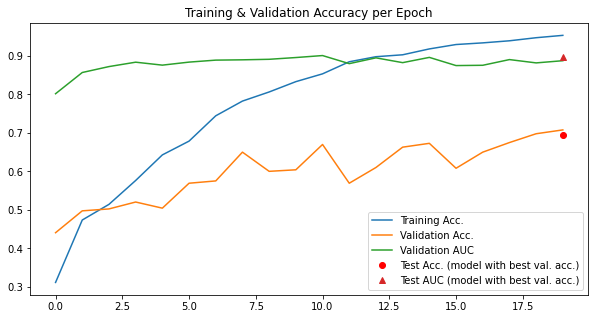

In [23]:
clf = run_classifier_pipeline(
    "dermamnist", info_flags, dermamnist_noGDA,
    DA_technique=DA_technique
)

#### OctMNIST

{
  "python_class": "OCTMNIST",
  "description": "The OCTMNIST is based on a prior dataset of 109,309 valid optical coherence tomography (OCT) images for retinal diseases. The dataset is comprised of 4 diagnosis categories, leading to a multi-class classification task. We split the source training set with a ratio of 9:1 into training and validation set, and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384\u22121,536)\u00d7(277\u2212512). We center-crop the images and resize them into 1\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/octmnist.npz?download=1",
  "MD5": "c68d92d5b585d8d81f7112f81e2d0842",
  "task": "multi-class",
  "label": {
    "0": "choroidal neovascularization",
    "1": "diabetic macular edema",
    "2": "drusen",
    "3": "normal"
  },
  "n_channels": 1,
  "n_samples": {
    "train": 97477,
    "val": 10832,
    "test": 1000
  },
  "license": "CC BY 4.0"
}
--------------------------------

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 63.41it/s]


train -- accuracy: 0.683
val -- accuracy: 0.5712,  AUC: 0.9276
Epoch 1



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 62.54it/s]


train -- accuracy: 0.8093
val -- accuracy: 0.7855,  AUC: 0.9588
Epoch 2



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 63.19it/s]


train -- accuracy: 0.8424
val -- accuracy: 0.8262,  AUC: 0.9626
Epoch 3



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 62.25it/s]


train -- accuracy: 0.8672
val -- accuracy: 0.8224,  AUC: 0.9462
Epoch 4



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 63.42it/s]


train -- accuracy: 0.8856
val -- accuracy: 0.8299,  AUC: 0.9618
Epoch 5



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 62.47it/s]


train -- accuracy: 0.8996
val -- accuracy: 0.8505,  AUC: 0.9663
Epoch 6



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 61.82it/s]


train -- accuracy: 0.9107
val -- accuracy: 0.878,  AUC: 0.9661
Epoch 7



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 62.02it/s]


train -- accuracy: 0.923
val -- accuracy: 0.856,  AUC: 0.9674
Epoch 8



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 62.85it/s]


train -- accuracy: 0.9329
val -- accuracy: 0.8632,  AUC: 0.9629
Epoch 9



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 63.31it/s]


train -- accuracy: 0.9428
val -- accuracy: 0.8775,  AUC: 0.9675
Epoch 10



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 63.03it/s]


train -- accuracy: 0.9494
val -- accuracy: 0.8945,  AUC: 0.9666
Epoch 11



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 63.41it/s]


train -- accuracy: 0.9531
val -- accuracy: 0.8563,  AUC: 0.9669
Epoch 12



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 62.65it/s]


train -- accuracy: 0.9578
val -- accuracy: 0.9021,  AUC: 0.9696
Epoch 13



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:23<00:00, 63.65it/s]


train -- accuracy: 0.9606
val -- accuracy: 0.8872,  AUC: 0.9603
Epoch 14



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 63.39it/s]


train -- accuracy: 0.959
val -- accuracy: 0.9,  AUC: 0.971
Epoch 15



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:24<00:00, 63.19it/s]


train -- accuracy: 0.9685
val -- accuracy: 0.8508,  AUC: 0.9642
Epoch 16



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:23<00:00, 63.58it/s]


train -- accuracy: 0.9694
val -- accuracy: 0.8911,  AUC: 0.9702
Epoch 17



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:23<00:00, 63.93it/s]


train -- accuracy: 0.9729
val -- accuracy: 0.8932,  AUC: 0.9676
Epoch 18



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:23<00:00, 64.43it/s]


train -- accuracy: 0.9757
val -- accuracy: 0.9093,  AUC: 0.9718
Epoch 19



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:23<00:00, 64.93it/s]


train -- accuracy: 0.9766
val -- accuracy: 0.9034,  AUC: 0.969
test -- accuracy: 0.766,  AUC: 0.9429


<Figure size 720x720 with 0 Axes>

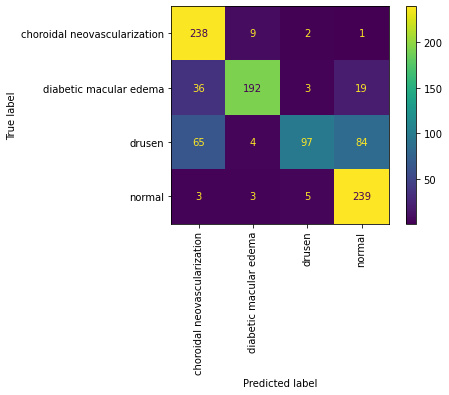

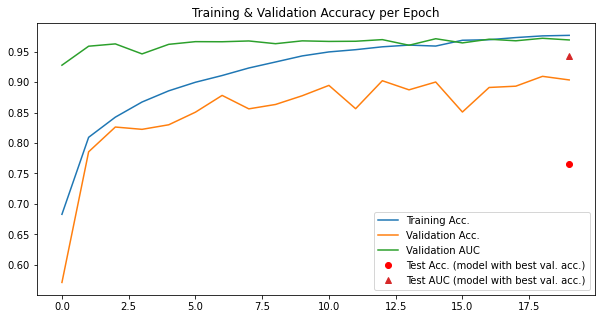

In [24]:
clf = run_classifier_pipeline(
    "octmnist", info_flags, octmnist_noGDA,
    DA_technique=DA_technique
)

#### PneumoniaMNIST

{
  "python_class": "PneumoniaMNIST",
  "description": "The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384\u22122,916)\u00d7(127\u22122,713). We center-crop the images and resize them into 1\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/pneumoniamnist.npz?download=1",
  "MD5": "28209eda62fecd6e6a2d98b1501bb15f",
  "task": "binary-class",
  "label": {
    "0": "normal",
    "1": "pneumonia"
  },
  "n_channels": 1,
  "n_samples": {
    "train": 4708,
    "val": 524,
    "test": 624
  },
  "license": "CC BY 4.0"
}
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 65.13it/s]


train -- accuracy: 0.761
val -- accuracy: 0.9122,  AUC: 0.9715
Epoch 1



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 62.94it/s]


train -- accuracy: 0.9427
val -- accuracy: 0.9485,  AUC: 0.9891
Epoch 2



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 63.36it/s]


train -- accuracy: 0.9565
val -- accuracy: 0.9485,  AUC: 0.9918
Epoch 3



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 64.45it/s]


train -- accuracy: 0.969
val -- accuracy: 0.9695,  AUC: 0.9961
Epoch 4



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 64.41it/s]


train -- accuracy: 0.976
val -- accuracy: 0.9714,  AUC: 0.9969
Epoch 5



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 65.10it/s]


train -- accuracy: 0.9785
val -- accuracy: 0.9656,  AUC: 0.9967
Epoch 6



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 64.04it/s]


train -- accuracy: 0.9839
val -- accuracy: 0.9771,  AUC: 0.9969
Epoch 7



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 59.39it/s]


train -- accuracy: 0.989
val -- accuracy: 0.9695,  AUC: 0.9978
Epoch 8



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 64.18it/s]


train -- accuracy: 0.993
val -- accuracy: 0.9714,  AUC: 0.9974
Epoch 9



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 64.95it/s]


train -- accuracy: 0.9955
val -- accuracy: 0.979,  AUC: 0.9975
Epoch 10



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 63.48it/s]


train -- accuracy: 0.9921
val -- accuracy: 0.9637,  AUC: 0.9968
Epoch 11



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 64.98it/s]


train -- accuracy: 0.996
val -- accuracy: 0.9656,  AUC: 0.9973
Epoch 12



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 64.70it/s]


train -- accuracy: 0.9983
val -- accuracy: 0.9752,  AUC: 0.998
Epoch 13



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 64.06it/s]


train -- accuracy: 0.9996
val -- accuracy: 0.9847,  AUC: 0.9983
Epoch 14



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 62.53it/s]


train -- accuracy: 0.9992
val -- accuracy: 0.9809,  AUC: 0.9981
Epoch 15



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 63.99it/s]


train -- accuracy: 1.0
val -- accuracy: 0.9828,  AUC: 0.998
Epoch 16



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 64.01it/s]


train -- accuracy: 0.9998
val -- accuracy: 0.9828,  AUC: 0.9981
Epoch 17



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 64.77it/s]


train -- accuracy: 0.9998
val -- accuracy: 0.9847,  AUC: 0.998
Epoch 18



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 64.55it/s]


train -- accuracy: 0.9998
val -- accuracy: 0.9828,  AUC: 0.9979
Epoch 19



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:01<00:00, 63.76it/s]


train -- accuracy: 1.0
val -- accuracy: 0.9752,  AUC: 0.9979
test -- accuracy: 0.8798,  AUC: 0.9607


<Figure size 720x720 with 0 Axes>

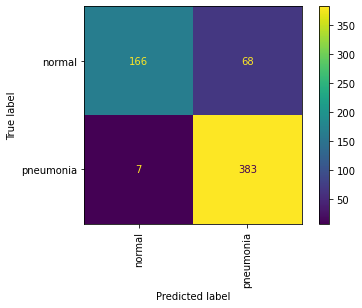

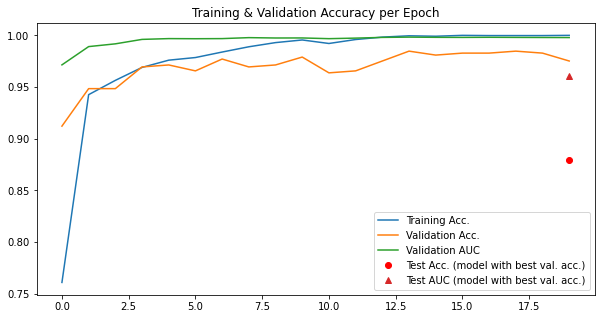

In [25]:
clf = run_classifier_pipeline(
    "pneumoniamnist", info_flags, pneumoniamnist_noGDA,
    DA_technique=DA_technique
)

#### BreastMNIST

{
  "python_class": "BreastMNIST",
  "description": "The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1\u00d7500\u00d7500 are resized into 1\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/breastmnist.npz?download=1",
  "MD5": "750601b1f35ba3300ea97c75c52ff8f6",
  "task": "binary-class",
  "label": {
    "0": "malignant",
    "1": "normal, benign"
  },
  "n_channels": 1,
  "n_samples": {
    "train": 546,
    "val": 78,
    "test": 156
  },
  "license": "CC BY 4.0"
}
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
    

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 67.24it/s]


train -- accuracy: 0.5183
val -- accuracy: 0.2692,  AUC: 0.6165
Epoch 1



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 67.12it/s]


train -- accuracy: 0.5531
val -- accuracy: 0.2692,  AUC: 0.6533
Epoch 2



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 66.72it/s]


train -- accuracy: 0.6575
val -- accuracy: 0.2949,  AUC: 0.7135
Epoch 3



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 64.71it/s]


train -- accuracy: 0.7143
val -- accuracy: 0.6154,  AUC: 0.7527
Epoch 4



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 67.22it/s]


train -- accuracy: 0.7198
val -- accuracy: 0.6923,  AUC: 0.7786
Epoch 5



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 62.05it/s]


train -- accuracy: 0.7344
val -- accuracy: 0.6923,  AUC: 0.7886
Epoch 6



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 63.14it/s]


train -- accuracy: 0.7546
val -- accuracy: 0.7051,  AUC: 0.7962
Epoch 7



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 65.90it/s]


train -- accuracy: 0.7491
val -- accuracy: 0.7308,  AUC: 0.8137
Epoch 8



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 65.78it/s]


train -- accuracy: 0.7711
val -- accuracy: 0.7564,  AUC: 0.8279
Epoch 9



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 66.53it/s]


train -- accuracy: 0.7802
val -- accuracy: 0.7692,  AUC: 0.8212
Epoch 10



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 66.95it/s]


train -- accuracy: 0.7674
val -- accuracy: 0.7564,  AUC: 0.8371
Epoch 11



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 65.45it/s]


train -- accuracy: 0.8004
val -- accuracy: 0.7821,  AUC: 0.8521
Epoch 12



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 67.64it/s]


train -- accuracy: 0.8223
val -- accuracy: 0.7821,  AUC: 0.8513
Epoch 13



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 66.61it/s]


train -- accuracy: 0.8553
val -- accuracy: 0.7949,  AUC: 0.8596
Epoch 14



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 66.69it/s]


train -- accuracy: 0.8626
val -- accuracy: 0.7949,  AUC: 0.8789
Epoch 15



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 66.66it/s]


train -- accuracy: 0.8571
val -- accuracy: 0.7949,  AUC: 0.8947
Epoch 16



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 67.04it/s]


train -- accuracy: 0.8846
val -- accuracy: 0.8462,  AUC: 0.8872
Epoch 17



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 64.77it/s]


train -- accuracy: 0.8883
val -- accuracy: 0.7179,  AUC: 0.9081
Epoch 18



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 66.54it/s]


train -- accuracy: 0.9139
val -- accuracy: 0.8462,  AUC: 0.8931
Epoch 19



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 63.92it/s]


train -- accuracy: 0.9322
val -- accuracy: 0.859,  AUC: 0.9256
test -- accuracy: 0.8462,  AUC: 0.8645


<Figure size 720x720 with 0 Axes>

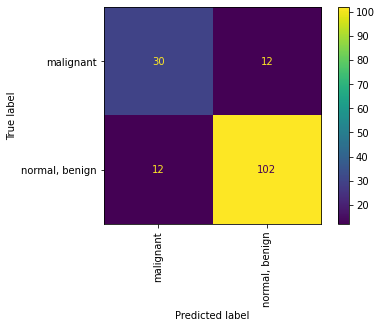

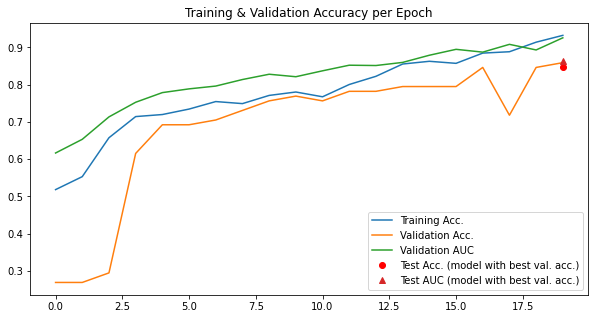

In [26]:
clf = run_classifier_pipeline(
    "breastmnist", info_flags, breastmnist_noGDA,
    DA_technique=DA_technique
)

#### OrganAMNIST

{
  "python_class": "OrganAMNIST",
  "description": "The OrganAMNIST is based on 3D computed tomography (CT) images from Liver Tumor Segmentation Benchmark (LiTS). It is renamed from OrganMNIST_Axial (in MedMNIST v1) for simplicity. We use bounding-box annotations of 11 body organs from another study to obtain the organ labels. Hounsfield-Unit (HU) of the 3D images are transformed into gray-scale with an abdominal window. We crop 2D images from the center slices of the 3D bounding boxes in axial views (planes). The images are resized into 1\u00d728\u00d728 to perform multi-class classification of 11 body organs. 115 and 16 CT scans from the source training set are used as training and validation set, respectively. The 70 CT scans from the source test set are treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/organamnist.npz?download=1",
  "MD5": "866b832ed4eeba67bfb9edee1d5544e6",
  "task": "multi-class",
  "label": {
    "0": "bladder",
    "1": "femur-left",

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 63.85it/s]


train -- accuracy: 0.5842
val -- accuracy: 0.8877,  AUC: 0.9929
Epoch 1



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 63.88it/s]


train -- accuracy: 0.8662
val -- accuracy: 0.933,  AUC: 0.9978
Epoch 2



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 63.36it/s]


train -- accuracy: 0.9325
val -- accuracy: 0.9578,  AUC: 0.9987
Epoch 3



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 62.42it/s]


train -- accuracy: 0.9531
val -- accuracy: 0.9586,  AUC: 0.9991
Epoch 4



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 64.66it/s]


train -- accuracy: 0.9681
val -- accuracy: 0.9578,  AUC: 0.9991
Epoch 5



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 64.13it/s]


train -- accuracy: 0.9753
val -- accuracy: 0.9613,  AUC: 0.9993
Epoch 6



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 63.18it/s]


train -- accuracy: 0.982
val -- accuracy: 0.9633,  AUC: 0.9995
Epoch 7



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 63.26it/s]


train -- accuracy: 0.9876
val -- accuracy: 0.9658,  AUC: 0.9995
Epoch 8



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 63.30it/s]


train -- accuracy: 0.9896
val -- accuracy: 0.9681,  AUC: 0.9996
Epoch 9



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 62.76it/s]


train -- accuracy: 0.9912
val -- accuracy: 0.9684,  AUC: 0.9995
Epoch 10



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 62.63it/s]


train -- accuracy: 0.9924
val -- accuracy: 0.9695,  AUC: 0.9995
Epoch 11



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 62.46it/s]


train -- accuracy: 0.9942
val -- accuracy: 0.971,  AUC: 0.9997
Epoch 12



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 62.57it/s]


train -- accuracy: 0.995
val -- accuracy: 0.9701,  AUC: 0.9997
Epoch 13



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 63.08it/s]


train -- accuracy: 0.9955
val -- accuracy: 0.9695,  AUC: 0.9996
Epoch 14



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 63.24it/s]


train -- accuracy: 0.9966
val -- accuracy: 0.9663,  AUC: 0.9996
Epoch 15



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 62.22it/s]


train -- accuracy: 0.9968
val -- accuracy: 0.9698,  AUC: 0.9997
Epoch 16



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 61.93it/s]


train -- accuracy: 0.9975
val -- accuracy: 0.9684,  AUC: 0.9997
Epoch 17



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 62.50it/s]


train -- accuracy: 0.9967
val -- accuracy: 0.9653,  AUC: 0.9995
Epoch 18



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 63.23it/s]


train -- accuracy: 0.998
val -- accuracy: 0.972,  AUC: 0.9997
Epoch 19



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:08<00:00, 62.28it/s]


train -- accuracy: 0.9981
val -- accuracy: 0.9712,  AUC: 0.9997
test -- accuracy: 0.8849,  AUC: 0.9914


<Figure size 720x720 with 0 Axes>

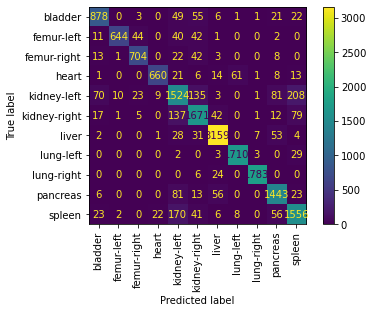

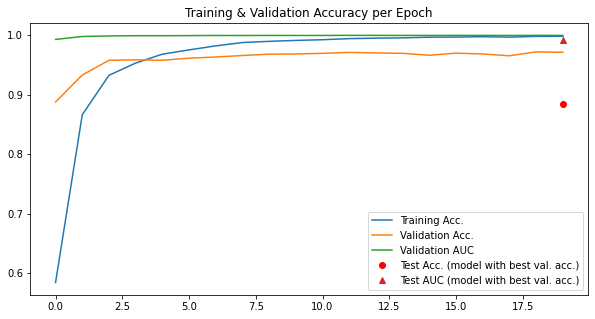

In [27]:
clf = run_classifier_pipeline(
    "organamnist", info_flags, organamnist_noGDA,
    DA_technique=DA_technique
)

#### OrganCMNIST

{
  "python_class": "OrganCMNIST",
  "description": "The OrganCMNIST is based on 3D computed tomography (CT) images from Liver Tumor Segmentation Benchmark (LiTS). It is renamed from OrganMNIST_Coronal (in MedMNIST v1) for simplicity. We use bounding-box annotations of 11 body organs from another study to obtain the organ labels. Hounsfield-Unit (HU) of the 3D images are transformed into gray-scale with an abdominal window. We crop 2D images from the center slices of the 3D bounding boxes in coronal views (planes). The images are resized into 1\u00d728\u00d728 to perform multi-class classification of 11 body organs. 115 and 16 CT scans from the source training set are used as training and validation set, respectively. The 70 CT scans from the source test set are treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/organcmnist.npz?download=1",
  "MD5": "0afa5834fb105f7705a7d93372119a21",
  "task": "multi-class",
  "label": {
    "0": "bladder",
    "1": "femur-le

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 63.03it/s]


train -- accuracy: 0.4055
val -- accuracy: 0.6798,  AUC: 0.9614
Epoch 1



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 64.29it/s]


train -- accuracy: 0.6657
val -- accuracy: 0.8441,  AUC: 0.9899
Epoch 2



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 64.16it/s]


train -- accuracy: 0.7985
val -- accuracy: 0.9202,  AUC: 0.9963
Epoch 3



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 63.83it/s]


train -- accuracy: 0.8538
val -- accuracy: 0.9206,  AUC: 0.9963
Epoch 4



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 63.48it/s]


train -- accuracy: 0.8855
val -- accuracy: 0.9419,  AUC: 0.9973
Epoch 5



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 64.25it/s]


train -- accuracy: 0.898
val -- accuracy: 0.9419,  AUC: 0.9977
Epoch 6



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 61.55it/s]


train -- accuracy: 0.9173
val -- accuracy: 0.9473,  AUC: 0.9979
Epoch 7



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 63.32it/s]


train -- accuracy: 0.9328
val -- accuracy: 0.9352,  AUC: 0.9977
Epoch 8



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 63.37it/s]


train -- accuracy: 0.9386
val -- accuracy: 0.9511,  AUC: 0.9984
Epoch 9



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 64.79it/s]


train -- accuracy: 0.9457
val -- accuracy: 0.9528,  AUC: 0.9984
Epoch 10



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 64.77it/s]


train -- accuracy: 0.9605
val -- accuracy: 0.9532,  AUC: 0.9985
Epoch 11



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 64.70it/s]


train -- accuracy: 0.9555
val -- accuracy: 0.954,  AUC: 0.9984
Epoch 12



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 62.29it/s]


train -- accuracy: 0.9638
val -- accuracy: 0.9465,  AUC: 0.9983
Epoch 13



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 64.99it/s]


train -- accuracy: 0.9709
val -- accuracy: 0.9561,  AUC: 0.9986
Epoch 14



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 63.07it/s]


train -- accuracy: 0.9725
val -- accuracy: 0.9624,  AUC: 0.9987
Epoch 15



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 62.97it/s]


train -- accuracy: 0.9771
val -- accuracy: 0.9594,  AUC: 0.9986
Epoch 16



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 63.87it/s]


train -- accuracy: 0.9814
val -- accuracy: 0.9553,  AUC: 0.9986
Epoch 17



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 61.70it/s]


train -- accuracy: 0.9835
val -- accuracy: 0.962,  AUC: 0.9989
Epoch 18



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 61.83it/s]


train -- accuracy: 0.9857
val -- accuracy: 0.9553,  AUC: 0.9985
Epoch 19



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:03<00:00, 64.92it/s]


train -- accuracy: 0.9889
val -- accuracy: 0.9586,  AUC: 0.9987
test -- accuracy: 0.8632,  AUC: 0.9874


<Figure size 720x720 with 0 Axes>

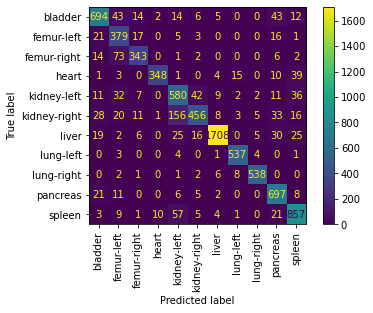

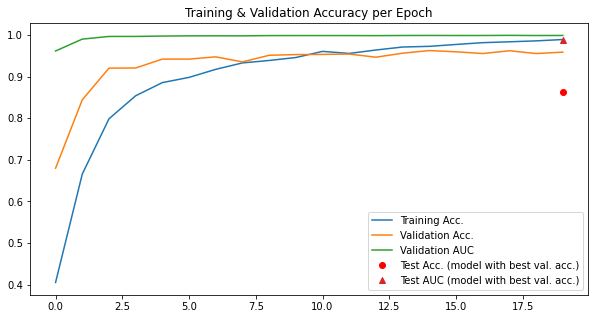

In [28]:
clf = run_classifier_pipeline(
    "organcmnist", info_flags, organcmnist_noGDA,
    DA_technique=DA_technique
)

#### OrganSMNIST

{
  "python_class": "OrganSMNIST",
  "description": "The OrganSMNIST is based on 3D computed tomography (CT) images from Liver Tumor Segmentation Benchmark (LiTS). It is renamed from OrganMNIST_Sagittal (in MedMNIST v1) for simplicity. We use bounding-box annotations of 11 body organs from another study to obtain the organ labels. Hounsfield-Unit (HU) of the 3D images are transformed into gray-scale with an abdominal window. We crop 2D images from the center slices of the 3D bounding boxes in sagittal views (planes). The images are resized into 1\u00d728\u00d728 to perform multi-class classification of 11 body organs. 115 and 16 CT scans from the source training set are used as training and validation set, respectively. The 70 CT scans from the source test set are treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/organsmnist.npz?download=1",
  "MD5": "e5c39f1af030238290b9557d9503af9d",
  "task": "multi-class",
  "label": {
    "0": "bladder",
    "1": "femur-

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 64.13it/s]


train -- accuracy: 0.2851
val -- accuracy: 0.5918,  AUC: 0.925
Epoch 1



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 63.62it/s]


train -- accuracy: 0.5168
val -- accuracy: 0.6264,  AUC: 0.9592
Epoch 2



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 63.02it/s]


train -- accuracy: 0.6259
val -- accuracy: 0.7749,  AUC: 0.9802
Epoch 3



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 64.14it/s]


train -- accuracy: 0.6887
val -- accuracy: 0.8181,  AUC: 0.9859
Epoch 4



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 65.01it/s]


train -- accuracy: 0.7302
val -- accuracy: 0.77,  AUC: 0.9842
Epoch 5



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 64.35it/s]


train -- accuracy: 0.7592
val -- accuracy: 0.8373,  AUC: 0.988
Epoch 6



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 64.46it/s]


train -- accuracy: 0.7858
val -- accuracy: 0.8475,  AUC: 0.989
Epoch 7



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 64.41it/s]


train -- accuracy: 0.8046
val -- accuracy: 0.8471,  AUC: 0.9903
Epoch 8



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 63.32it/s]


train -- accuracy: 0.828
val -- accuracy: 0.8352,  AUC: 0.9909
Epoch 9



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 64.65it/s]


train -- accuracy: 0.8504
val -- accuracy: 0.8238,  AUC: 0.9906
Epoch 10



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 64.09it/s]


train -- accuracy: 0.8617
val -- accuracy: 0.8609,  AUC: 0.9914
Epoch 11



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 64.58it/s]


train -- accuracy: 0.885
val -- accuracy: 0.8271,  AUC: 0.9911
Epoch 12



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 64.13it/s]


train -- accuracy: 0.8968
val -- accuracy: 0.8458,  AUC: 0.9898
Epoch 13



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 64.51it/s]


train -- accuracy: 0.9045
val -- accuracy: 0.8691,  AUC: 0.9911
Epoch 14



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 63.90it/s]


train -- accuracy: 0.9107
val -- accuracy: 0.8556,  AUC: 0.9906
Epoch 15



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 63.82it/s]


train -- accuracy: 0.917
val -- accuracy: 0.8617,  AUC: 0.9909
Epoch 16



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 61.61it/s]


train -- accuracy: 0.9354
val -- accuracy: 0.8642,  AUC: 0.9909
Epoch 17



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 60.45it/s]


train -- accuracy: 0.9368
val -- accuracy: 0.8683,  AUC: 0.9913
Epoch 18



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 61.00it/s]


train -- accuracy: 0.9498
val -- accuracy: 0.8687,  AUC: 0.9915
Epoch 19



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:03<00:00, 63.10it/s]


train -- accuracy: 0.9516
val -- accuracy: 0.8524,  AUC: 0.991
test -- accuracy: 0.7194,  AUC: 0.9642


<Figure size 720x720 with 0 Axes>

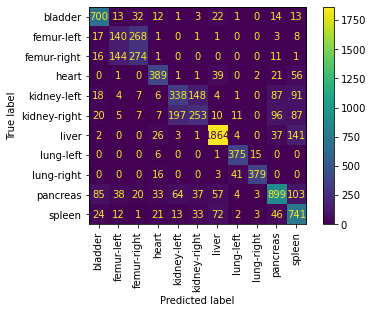

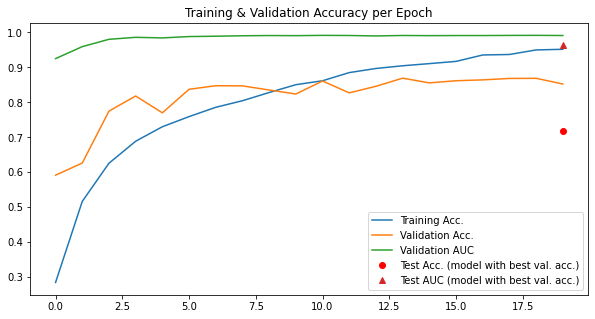

In [29]:
clf = run_classifier_pipeline(
    "organsmnist", info_flags, organsmnist_noGDA,
    DA_technique=DA_technique
)

### 3.3. Training on the MedMNIST datasets with WSR and GDA

In [12]:
# Declares the baseline setup to save the related model
DA_technique="_WSR_GDA"

#### PathMNIST

{
  "python_class": "PathMNIST",
  "description": "The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of 7,180 image patches from a different clinical center. The dataset is comprised of 9 types of tissues, resulting in a multi-class classification task. We resize the source images of 3\u00d7224\u00d7224 into 3\u00d728\u00d728, and split NCT-CRC-HE-100K into training and validation set with a ratio of 9:1. The CRC-VAL-HE-7K is treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/pathmnist.npz?download=1",
  "MD5": "a8b06965200029087d5bd730944a56c1",
  "task": "multi-class",
  "label": {
    "0": "adipose",
    "1": "background",
    "2": "debris",
    "3": "lymphocytes",
    "4": "mucus",
    "5": "smooth muscle",
    "6": "normal colon mucosa"

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [02:10<00:00, 10.79it/s]


train -- accuracy: 0.5707
val -- accuracy: 0.6276,  AUC: 0.9538
Epoch 1



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:56<00:00, 12.09it/s]


train -- accuracy: 0.7555
val -- accuracy: 0.8044,  AUC: 0.9773
Epoch 2



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:57<00:00, 11.98it/s]


train -- accuracy: 0.8124
val -- accuracy: 0.823,  AUC: 0.9824
Epoch 3



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:53<00:00, 12.40it/s]


train -- accuracy: 0.8432
val -- accuracy: 0.8145,  AUC: 0.9839
Epoch 4



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:45<00:00, 13.31it/s]


train -- accuracy: 0.8581
val -- accuracy: 0.8394,  AUC: 0.988
Epoch 5



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:44<00:00, 13.44it/s]


train -- accuracy: 0.8722
val -- accuracy: 0.8604,  AUC: 0.9894
Epoch 6



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:56<00:00, 12.11it/s]


train -- accuracy: 0.8798
val -- accuracy: 0.8749,  AUC: 0.9912
Epoch 7



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:58<00:00, 11.88it/s]


train -- accuracy: 0.8892
val -- accuracy: 0.8604,  AUC: 0.9884
Epoch 8



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:57<00:00, 11.99it/s]


train -- accuracy: 0.8954
val -- accuracy: 0.8814,  AUC: 0.9923
Epoch 9



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:57<00:00, 11.95it/s]


train -- accuracy: 0.8979
val -- accuracy: 0.8915,  AUC: 0.9927
Epoch 10



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:58<00:00, 11.88it/s]


train -- accuracy: 0.9019
val -- accuracy: 0.9036,  AUC: 0.9932
Epoch 11



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [02:00<00:00, 11.63it/s]


train -- accuracy: 0.9057
val -- accuracy: 0.8515,  AUC: 0.991
Epoch 12



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [02:05<00:00, 11.17it/s]


train -- accuracy: 0.9074
val -- accuracy: 0.9083,  AUC: 0.9946
Epoch 13



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [02:02<00:00, 11.48it/s]


train -- accuracy: 0.9104
val -- accuracy: 0.9074,  AUC: 0.995
Epoch 14



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [02:01<00:00, 11.61it/s]


train -- accuracy: 0.9128
val -- accuracy: 0.8994,  AUC: 0.9943
Epoch 15



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [02:19<00:00, 10.06it/s]


train -- accuracy: 0.9141
val -- accuracy: 0.8917,  AUC: 0.9929
Epoch 16



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [02:33<00:00,  9.15it/s]


train -- accuracy: 0.9193
val -- accuracy: 0.8741,  AUC: 0.9926
Epoch 17



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [02:19<00:00, 10.09it/s]


train -- accuracy: 0.9201
val -- accuracy: 0.9071,  AUC: 0.9938
Epoch 18



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:55<00:00, 12.19it/s]


train -- accuracy: 0.9223
val -- accuracy: 0.921,  AUC: 0.9953
Epoch 19



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:59<00:00, 11.78it/s]


train -- accuracy: 0.9237
val -- accuracy: 0.9218,  AUC: 0.9957
test -- accuracy: 0.8829,  AUC: 0.9914


<Figure size 720x720 with 0 Axes>

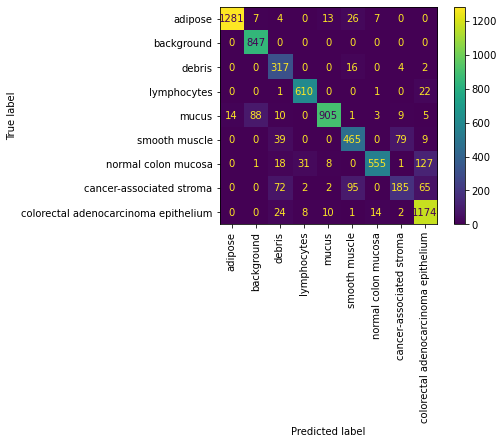

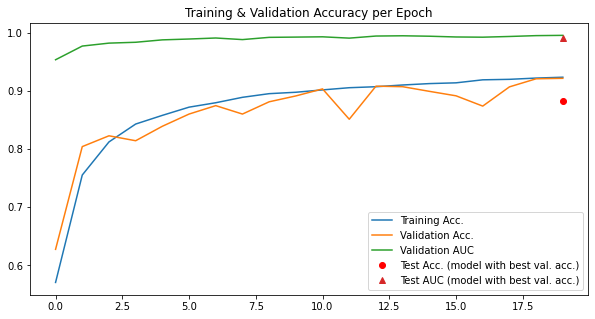

In [13]:
clf = run_classifier_pipeline(
    "pathmnist", info_flags, pathmnist_WSR_GDA,
    DA_technique=DA_technique
)

#### DermaMNIST

{
  "python_class": "DermaMNIST",
  "description": "The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3\u00d7600\u00d7450 are resized into 3\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/dermamnist.npz?download=1",
  "MD5": "0744692d530f8e62ec473284d019b0c7",
  "task": "multi-class",
  "label": {
    "0": "actinic keratoses and intraepithelial carcinoma",
    "1": "basal cell carcinoma",
    "2": "benign keratosis-like lesions",
    "3": "dermatofibroma",
    "4": "melanoma",
    "5": "melanocytic nevi",
    "6": "vascular lesions"
  },
  "n_channels": 3,
  "n_samples": {
    "train": 7007,
    "val": 1003,
    "test": 2005
  },
  "license": "CC B

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:11<00:00,  9.72it/s]


train -- accuracy: 0.2208
val -- accuracy: 0.5125,  AUC: 0.8022
Epoch 1



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:10<00:00, 10.32it/s]


train -- accuracy: 0.3237
val -- accuracy: 0.5733,  AUC: 0.8416
Epoch 2



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:10<00:00, 10.29it/s]


train -- accuracy: 0.3939
val -- accuracy: 0.5364,  AUC: 0.8554
Epoch 3



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:10<00:00, 10.21it/s]


train -- accuracy: 0.4461
val -- accuracy: 0.4656,  AUC: 0.8334
Epoch 4



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:11<00:00,  9.37it/s]


train -- accuracy: 0.4613
val -- accuracy: 0.5234,  AUC: 0.8652
Epoch 5



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:10<00:00, 10.18it/s]


train -- accuracy: 0.5002
val -- accuracy: 0.654,  AUC: 0.8882
Epoch 6



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:12<00:00,  8.88it/s]


train -- accuracy: 0.527
val -- accuracy: 0.6251,  AUC: 0.8855
Epoch 7



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:12<00:00,  8.54it/s]


train -- accuracy: 0.5526
val -- accuracy: 0.4945,  AUC: 0.8599
Epoch 8



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:11<00:00,  9.82it/s]


train -- accuracy: 0.5864
val -- accuracy: 0.6062,  AUC: 0.8809
Epoch 9



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:11<00:00,  9.29it/s]


train -- accuracy: 0.6105
val -- accuracy: 0.5713,  AUC: 0.8861
Epoch 10



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:11<00:00,  9.54it/s]


train -- accuracy: 0.6332
val -- accuracy: 0.4726,  AUC: 0.854
Epoch 11



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:12<00:00,  8.92it/s]


train -- accuracy: 0.6529
val -- accuracy: 0.654,  AUC: 0.88
Epoch 12



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:12<00:00,  9.13it/s]


train -- accuracy: 0.6708
val -- accuracy: 0.6421,  AUC: 0.8786
Epoch 13



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:12<00:00,  8.75it/s]


train -- accuracy: 0.7046
val -- accuracy: 0.6879,  AUC: 0.9087
Epoch 14



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:09<00:00, 11.19it/s]


train -- accuracy: 0.7006
val -- accuracy: 0.6092,  AUC: 0.8797
Epoch 15



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:09<00:00, 11.62it/s]


train -- accuracy: 0.7186
val -- accuracy: 0.5474,  AUC: 0.8623
Epoch 16



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:09<00:00, 11.46it/s]


train -- accuracy: 0.7493
val -- accuracy: 0.6082,  AUC: 0.8834
Epoch 17



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:09<00:00, 11.30it/s]


train -- accuracy: 0.7521
val -- accuracy: 0.668,  AUC: 0.8883
Epoch 18



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:12<00:00,  8.87it/s]


train -- accuracy: 0.7687
val -- accuracy: 0.5543,  AUC: 0.8608
Epoch 19



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:10<00:00, 10.81it/s]


train -- accuracy: 0.7799
val -- accuracy: 0.6251,  AUC: 0.884
test -- accuracy: 0.6439,  AUC: 0.8943


<Figure size 720x720 with 0 Axes>

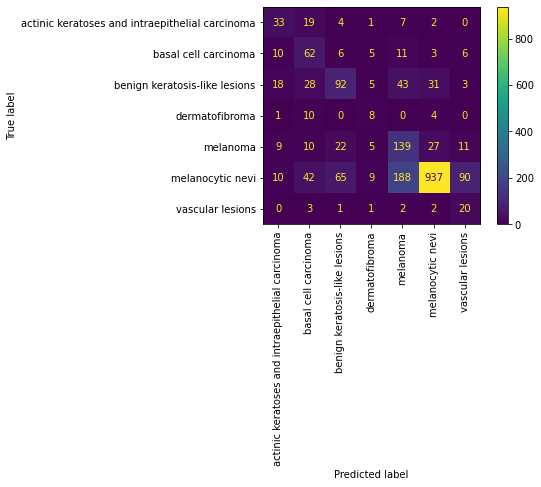

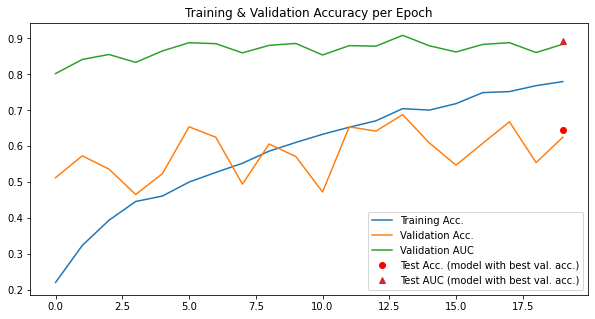

In [14]:
clf = run_classifier_pipeline(
    "dermamnist", info_flags, dermamnist_WSR_GDA,
    DA_technique=DA_technique
)

#### OctMNIST

{
  "python_class": "OCTMNIST",
  "description": "The OCTMNIST is based on a prior dataset of 109,309 valid optical coherence tomography (OCT) images for retinal diseases. The dataset is comprised of 4 diagnosis categories, leading to a multi-class classification task. We split the source training set with a ratio of 9:1 into training and validation set, and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384\u22121,536)\u00d7(277\u2212512). We center-crop the images and resize them into 1\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/octmnist.npz?download=1",
  "MD5": "c68d92d5b585d8d81f7112f81e2d0842",
  "task": "multi-class",
  "label": {
    "0": "choroidal neovascularization",
    "1": "diabetic macular edema",
    "2": "drusen",
    "3": "normal"
  },
  "n_channels": 1,
  "n_samples": {
    "train": 97477,
    "val": 10832,
    "test": 1000
  },
  "license": "CC BY 4.0"
}
--------------------------------

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:51<00:00, 29.50it/s]


train -- accuracy: 0.6672
val -- accuracy: 0.6484,  AUC: 0.9234
Epoch 1



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:50<00:00, 30.42it/s]


train -- accuracy: 0.7855
val -- accuracy: 0.8684,  AUC: 0.9527
Epoch 2



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:48<00:00, 31.24it/s]


train -- accuracy: 0.8131
val -- accuracy: 0.7959,  AUC: 0.956
Epoch 3



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:49<00:00, 31.06it/s]


train -- accuracy: 0.8311
val -- accuracy: 0.6084,  AUC: 0.9544
Epoch 4



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:49<00:00, 31.02it/s]


train -- accuracy: 0.8417
val -- accuracy: 0.8643,  AUC: 0.9638
Epoch 5



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:48<00:00, 31.44it/s]


train -- accuracy: 0.8526
val -- accuracy: 0.8227,  AUC: 0.9619
Epoch 6



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:48<00:00, 31.31it/s]


train -- accuracy: 0.8593
val -- accuracy: 0.851,  AUC: 0.9635
Epoch 7



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:45<00:00, 33.50it/s]


train -- accuracy: 0.8683
val -- accuracy: 0.8758,  AUC: 0.9672
Epoch 8



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:43<00:00, 35.33it/s]


train -- accuracy: 0.8742
val -- accuracy: 0.88,  AUC: 0.9677
Epoch 9



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:43<00:00, 35.24it/s]


train -- accuracy: 0.8812
val -- accuracy: 0.8655,  AUC: 0.9677
Epoch 10



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:43<00:00, 35.16it/s]


train -- accuracy: 0.8888
val -- accuracy: 0.8564,  AUC: 0.9691
Epoch 11



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:43<00:00, 35.03it/s]


train -- accuracy: 0.8915
val -- accuracy: 0.8882,  AUC: 0.9691
Epoch 12



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:43<00:00, 34.77it/s]


train -- accuracy: 0.896
val -- accuracy: 0.8326,  AUC: 0.9684
Epoch 13



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:43<00:00, 35.19it/s]


train -- accuracy: 0.9022
val -- accuracy: 0.8735,  AUC: 0.9678
Epoch 14



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:43<00:00, 35.18it/s]


train -- accuracy: 0.9037
val -- accuracy: 0.8081,  AUC: 0.9632
Epoch 15



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:44<00:00, 34.62it/s]


train -- accuracy: 0.9085
val -- accuracy: 0.8307,  AUC: 0.9677
Epoch 16



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:42<00:00, 35.88it/s]


train -- accuracy: 0.9132
val -- accuracy: 0.8786,  AUC: 0.9703
Epoch 17



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:43<00:00, 35.15it/s]


train -- accuracy: 0.9156
val -- accuracy: 0.8539,  AUC: 0.9709
Epoch 18



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:43<00:00, 34.68it/s]


train -- accuracy: 0.9209
val -- accuracy: 0.8796,  AUC: 0.9714
Epoch 19



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:42<00:00, 35.51it/s]


train -- accuracy: 0.9238
val -- accuracy: 0.8972,  AUC: 0.9724
test -- accuracy: 0.742,  AUC: 0.9298


<Figure size 720x720 with 0 Axes>

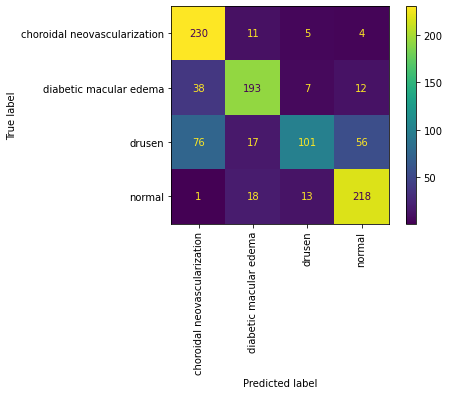

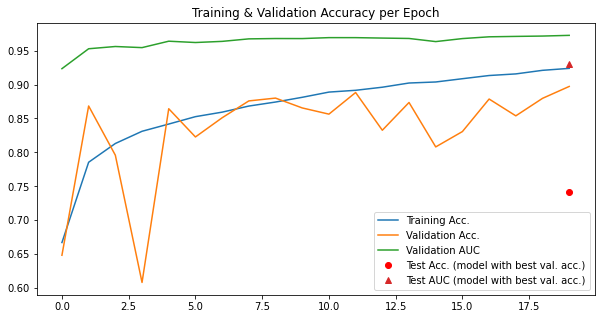

In [15]:
clf = run_classifier_pipeline(
    "octmnist", info_flags, octmnist_WSR_GDA,
    DA_technique=DA_technique
)

#### PneumoniaMNIST

{
  "python_class": "PneumoniaMNIST",
  "description": "The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384\u22122,916)\u00d7(127\u22122,713). We center-crop the images and resize them into 1\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/pneumoniamnist.npz?download=1",
  "MD5": "28209eda62fecd6e6a2d98b1501bb15f",
  "task": "binary-class",
  "label": {
    "0": "normal",
    "1": "pneumonia"
  },
  "n_channels": 1,
  "n_samples": {
    "train": 4708,
    "val": 524,
    "test": 624
  },
  "license": "CC BY 4.0"
}
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 34.37it/s]


train -- accuracy: 0.7593
val -- accuracy: 0.9179,  AUC: 0.9641
Epoch 1



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 34.86it/s]


train -- accuracy: 0.9331
val -- accuracy: 0.9561,  AUC: 0.9863
Epoch 2



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 34.45it/s]


train -- accuracy: 0.9376
val -- accuracy: 0.9485,  AUC: 0.9914
Epoch 3



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 34.93it/s]


train -- accuracy: 0.9494
val -- accuracy: 0.9427,  AUC: 0.9921
Epoch 4



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 35.32it/s]


train -- accuracy: 0.9552
val -- accuracy: 0.9618,  AUC: 0.9948
Epoch 5



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 34.84it/s]


train -- accuracy: 0.9592
val -- accuracy: 0.9637,  AUC: 0.995
Epoch 6



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 35.48it/s]


train -- accuracy: 0.9696
val -- accuracy: 0.9676,  AUC: 0.9949
Epoch 7



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 35.45it/s]


train -- accuracy: 0.9679
val -- accuracy: 0.9733,  AUC: 0.9967
Epoch 8



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 35.31it/s]


train -- accuracy: 0.9732
val -- accuracy: 0.9714,  AUC: 0.9967
Epoch 9



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 35.32it/s]


train -- accuracy: 0.9754
val -- accuracy: 0.9618,  AUC: 0.9958
Epoch 10



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 35.33it/s]


train -- accuracy: 0.9783
val -- accuracy: 0.9752,  AUC: 0.9966
Epoch 11



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 35.93it/s]


train -- accuracy: 0.9768
val -- accuracy: 0.9714,  AUC: 0.9965
Epoch 12



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 35.41it/s]


train -- accuracy: 0.9807
val -- accuracy: 0.9676,  AUC: 0.9954
Epoch 13



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 35.59it/s]


train -- accuracy: 0.9832
val -- accuracy: 0.9561,  AUC: 0.997
Epoch 14



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 35.84it/s]


train -- accuracy: 0.9832
val -- accuracy: 0.979,  AUC: 0.9963
Epoch 15



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 35.61it/s]


train -- accuracy: 0.9847
val -- accuracy: 0.9676,  AUC: 0.9961
Epoch 16



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 35.48it/s]


train -- accuracy: 0.9862
val -- accuracy: 0.9771,  AUC: 0.9968
Epoch 17



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 35.28it/s]


train -- accuracy: 0.9873
val -- accuracy: 0.9695,  AUC: 0.996
Epoch 18



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 35.20it/s]


train -- accuracy: 0.9887
val -- accuracy: 0.9771,  AUC: 0.9973
Epoch 19



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 35.12it/s]


train -- accuracy: 0.9911
val -- accuracy: 0.9752,  AUC: 0.9971
test -- accuracy: 0.9038,  AUC: 0.9666


<Figure size 720x720 with 0 Axes>

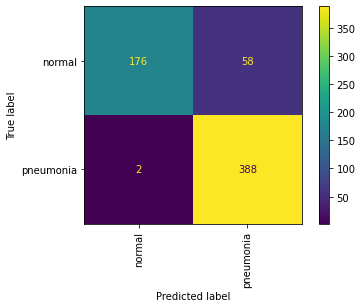

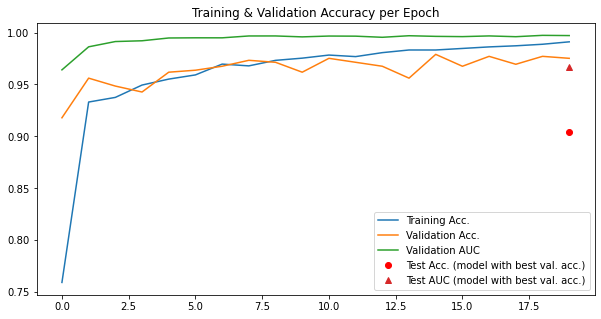

In [16]:
clf = run_classifier_pipeline(
    "pneumoniamnist", info_flags, pneumoniamnist_WSR_GDA,
    DA_technique=DA_technique
)

#### BreastMNIST

{
  "python_class": "BreastMNIST",
  "description": "The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1\u00d7500\u00d7500 are resized into 1\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/breastmnist.npz?download=1",
  "MD5": "750601b1f35ba3300ea97c75c52ff8f6",
  "task": "binary-class",
  "label": {
    "0": "malignant",
    "1": "normal, benign"
  },
  "n_channels": 1,
  "n_samples": {
    "train": 546,
    "val": 78,
    "test": 156
  },
  "license": "CC BY 4.0"
}
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
    

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 31.63it/s]


train -- accuracy: 0.4799
val -- accuracy: 0.7308,  AUC: 0.2765
Epoch 1



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 36.30it/s]


train -- accuracy: 0.5861
val -- accuracy: 0.7308,  AUC: 0.2556
Epoch 2



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 36.82it/s]


train -- accuracy: 0.6593
val -- accuracy: 0.4872,  AUC: 0.406
Epoch 3



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 34.48it/s]


train -- accuracy: 0.6429
val -- accuracy: 0.4103,  AUC: 0.7226
Epoch 4



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 35.43it/s]


train -- accuracy: 0.7216
val -- accuracy: 0.6026,  AUC: 0.7794
Epoch 5



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 37.63it/s]


train -- accuracy: 0.6868
val -- accuracy: 0.641,  AUC: 0.7803
Epoch 6



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 37.23it/s]


train -- accuracy: 0.6832
val -- accuracy: 0.6667,  AUC: 0.7753
Epoch 7



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 33.40it/s]


train -- accuracy: 0.6557
val -- accuracy: 0.6795,  AUC: 0.7836
Epoch 8



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 36.82it/s]


train -- accuracy: 0.7363
val -- accuracy: 0.6667,  AUC: 0.7845
Epoch 9



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 37.55it/s]


train -- accuracy: 0.707
val -- accuracy: 0.5641,  AUC: 0.797
Epoch 10



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 35.39it/s]


train -- accuracy: 0.7161
val -- accuracy: 0.6282,  AUC: 0.8045
Epoch 11



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 36.16it/s]


train -- accuracy: 0.7509
val -- accuracy: 0.6923,  AUC: 0.8003
Epoch 12



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 37.07it/s]


train -- accuracy: 0.7015
val -- accuracy: 0.6667,  AUC: 0.8154
Epoch 13



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 37.21it/s]


train -- accuracy: 0.7234
val -- accuracy: 0.7051,  AUC: 0.8179
Epoch 14



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 34.86it/s]


train -- accuracy: 0.7601
val -- accuracy: 0.6667,  AUC: 0.8179
Epoch 15



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 37.14it/s]


train -- accuracy: 0.7418
val -- accuracy: 0.7949,  AUC: 0.8396
Epoch 16



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 36.98it/s]


train -- accuracy: 0.7839
val -- accuracy: 0.7949,  AUC: 0.858
Epoch 17



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 34.46it/s]


train -- accuracy: 0.8187
val -- accuracy: 0.6538,  AUC: 0.8396
Epoch 18



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 35.15it/s]


train -- accuracy: 0.8223
val -- accuracy: 0.7436,  AUC: 0.8371
Epoch 19



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 36.59it/s]


train -- accuracy: 0.8077
val -- accuracy: 0.6795,  AUC: 0.858
test -- accuracy: 0.6795,  AUC: 0.8302


<Figure size 720x720 with 0 Axes>

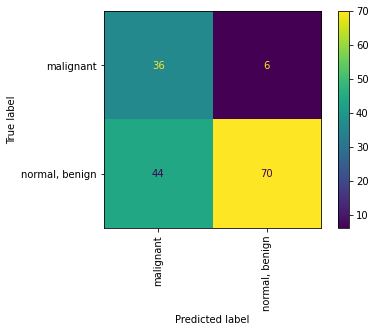

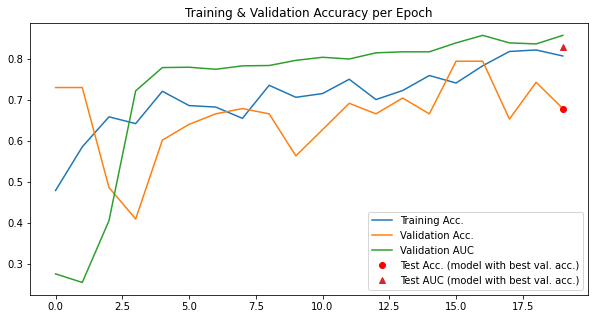

In [17]:
clf = run_classifier_pipeline(
    "breastmnist", info_flags, breastmnist_WSR_GDA,
    DA_technique=DA_technique
)

#### OrganAMNIST

{
  "python_class": "OrganAMNIST",
  "description": "The OrganAMNIST is based on 3D computed tomography (CT) images from Liver Tumor Segmentation Benchmark (LiTS). It is renamed from OrganMNIST_Axial (in MedMNIST v1) for simplicity. We use bounding-box annotations of 11 body organs from another study to obtain the organ labels. Hounsfield-Unit (HU) of the 3D images are transformed into gray-scale with an abdominal window. We crop 2D images from the center slices of the 3D bounding boxes in axial views (planes). The images are resized into 1\u00d728\u00d728 to perform multi-class classification of 11 body organs. 115 and 16 CT scans from the source training set are used as training and validation set, respectively. The 70 CT scans from the source test set are treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/organamnist.npz?download=1",
  "MD5": "866b832ed4eeba67bfb9edee1d5544e6",
  "task": "multi-class",
  "label": {
    "0": "bladder",
    "1": "femur-left",

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 33.99it/s]


train -- accuracy: 0.5626
val -- accuracy: 0.8698,  AUC: 0.9903
Epoch 1



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 35.07it/s]


train -- accuracy: 0.8314
val -- accuracy: 0.884,  AUC: 0.9948
Epoch 2



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 35.28it/s]


train -- accuracy: 0.8811
val -- accuracy: 0.9382,  AUC: 0.9979
Epoch 3



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 35.62it/s]


train -- accuracy: 0.9108
val -- accuracy: 0.9393,  AUC: 0.9976
Epoch 4



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 35.08it/s]


train -- accuracy: 0.9249
val -- accuracy: 0.9365,  AUC: 0.9979
Epoch 5



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 35.08it/s]


train -- accuracy: 0.9371
val -- accuracy: 0.9455,  AUC: 0.9982
Epoch 6



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 35.11it/s]


train -- accuracy: 0.9483
val -- accuracy: 0.9499,  AUC: 0.998
Epoch 7



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 35.44it/s]


train -- accuracy: 0.9552
val -- accuracy: 0.9553,  AUC: 0.9984
Epoch 8



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 35.56it/s]


train -- accuracy: 0.9604
val -- accuracy: 0.9579,  AUC: 0.9988
Epoch 9



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 34.47it/s]


train -- accuracy: 0.965
val -- accuracy: 0.9559,  AUC: 0.9989
Epoch 10



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 35.03it/s]


train -- accuracy: 0.9696
val -- accuracy: 0.9613,  AUC: 0.9989
Epoch 11



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 35.20it/s]


train -- accuracy: 0.9714
val -- accuracy: 0.9584,  AUC: 0.9987
Epoch 12



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 34.47it/s]


train -- accuracy: 0.976
val -- accuracy: 0.9592,  AUC: 0.9988
Epoch 13



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 35.57it/s]


train -- accuracy: 0.9774
val -- accuracy: 0.9502,  AUC: 0.9988
Epoch 14



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 34.15it/s]


train -- accuracy: 0.9815
val -- accuracy: 0.9525,  AUC: 0.9987
Epoch 15



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 34.43it/s]


train -- accuracy: 0.98
val -- accuracy: 0.9599,  AUC: 0.9991
Epoch 16



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 34.47it/s]


train -- accuracy: 0.9828
val -- accuracy: 0.9561,  AUC: 0.999
Epoch 17



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 35.45it/s]


train -- accuracy: 0.9844
val -- accuracy: 0.9604,  AUC: 0.9991
Epoch 18



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 34.67it/s]


train -- accuracy: 0.9857
val -- accuracy: 0.9559,  AUC: 0.9989
Epoch 19



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 34.59it/s]


train -- accuracy: 0.9874
val -- accuracy: 0.9633,  AUC: 0.9993
test -- accuracy: 0.8743,  AUC: 0.9885


<Figure size 720x720 with 0 Axes>

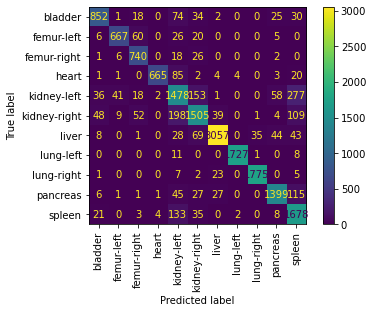

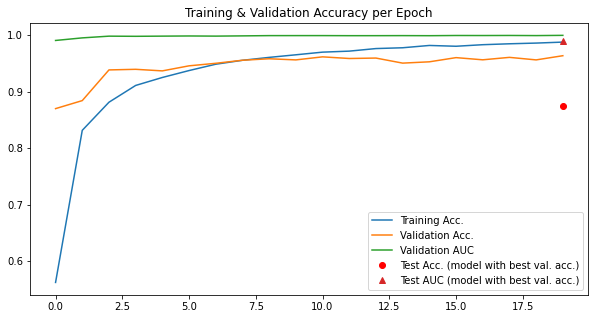

In [18]:
clf = run_classifier_pipeline(
    "organamnist", info_flags, organamnist_WSR_GDA,
    DA_technique=DA_technique
)

#### OrganCMNIST

{
  "python_class": "OrganCMNIST",
  "description": "The OrganCMNIST is based on 3D computed tomography (CT) images from Liver Tumor Segmentation Benchmark (LiTS). It is renamed from OrganMNIST_Coronal (in MedMNIST v1) for simplicity. We use bounding-box annotations of 11 body organs from another study to obtain the organ labels. Hounsfield-Unit (HU) of the 3D images are transformed into gray-scale with an abdominal window. We crop 2D images from the center slices of the 3D bounding boxes in coronal views (planes). The images are resized into 1\u00d728\u00d728 to perform multi-class classification of 11 body organs. 115 and 16 CT scans from the source training set are used as training and validation set, respectively. The 70 CT scans from the source test set are treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/organcmnist.npz?download=1",
  "MD5": "0afa5834fb105f7705a7d93372119a21",
  "task": "multi-class",
  "label": {
    "0": "bladder",
    "1": "femur-le

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 34.83it/s]


train -- accuracy: 0.3038
val -- accuracy: 0.5635,  AUC: 0.9003
Epoch 1



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 34.71it/s]


train -- accuracy: 0.5475
val -- accuracy: 0.7722,  AUC: 0.9692
Epoch 2



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 35.06it/s]


train -- accuracy: 0.6843
val -- accuracy: 0.8336,  AUC: 0.9844
Epoch 3



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:06<00:00, 33.43it/s]


train -- accuracy: 0.7592
val -- accuracy: 0.8917,  AUC: 0.9908
Epoch 4



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 35.14it/s]


train -- accuracy: 0.7924
val -- accuracy: 0.9147,  AUC: 0.9939
Epoch 5



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 35.86it/s]


train -- accuracy: 0.8222
val -- accuracy: 0.9331,  AUC: 0.9956
Epoch 6



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 35.66it/s]


train -- accuracy: 0.8422
val -- accuracy: 0.936,  AUC: 0.9961
Epoch 7



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 35.38it/s]


train -- accuracy: 0.852
val -- accuracy: 0.931,  AUC: 0.9959
Epoch 8



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 35.53it/s]


train -- accuracy: 0.8713
val -- accuracy: 0.9402,  AUC: 0.9967
Epoch 9



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 35.07it/s]


train -- accuracy: 0.8795
val -- accuracy: 0.9277,  AUC: 0.9956
Epoch 10



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 35.57it/s]


train -- accuracy: 0.8943
val -- accuracy: 0.9427,  AUC: 0.9971
Epoch 11



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 35.59it/s]


train -- accuracy: 0.8995
val -- accuracy: 0.9415,  AUC: 0.9971
Epoch 12



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 34.81it/s]


train -- accuracy: 0.9042
val -- accuracy: 0.9427,  AUC: 0.9974
Epoch 13



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 35.56it/s]


train -- accuracy: 0.9048
val -- accuracy: 0.9356,  AUC: 0.9964
Epoch 14



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 35.07it/s]


train -- accuracy: 0.9208
val -- accuracy: 0.9256,  AUC: 0.9972
Epoch 15



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 35.54it/s]


train -- accuracy: 0.9171
val -- accuracy: 0.9469,  AUC: 0.997
Epoch 16



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 35.21it/s]


train -- accuracy: 0.9235
val -- accuracy: 0.9498,  AUC: 0.9975
Epoch 17



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 34.96it/s]


train -- accuracy: 0.9365
val -- accuracy: 0.9457,  AUC: 0.997
Epoch 18



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 35.44it/s]


train -- accuracy: 0.9392
val -- accuracy: 0.954,  AUC: 0.9977
Epoch 19



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 36.06it/s]


train -- accuracy: 0.9442
val -- accuracy: 0.9344,  AUC: 0.9965
test -- accuracy: 0.8166,  AUC: 0.983


<Figure size 720x720 with 0 Axes>

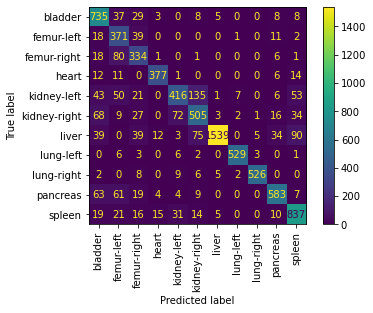

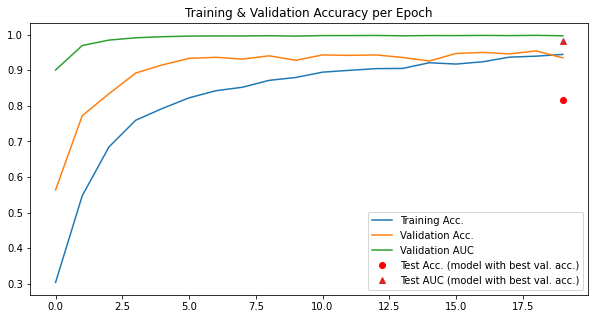

In [19]:
clf = run_classifier_pipeline(
    "organcmnist", info_flags, organcmnist_WSR_GDA,
    DA_technique=DA_technique
)

#### OrganSMNIST

{
  "python_class": "OrganSMNIST",
  "description": "The OrganSMNIST is based on 3D computed tomography (CT) images from Liver Tumor Segmentation Benchmark (LiTS). It is renamed from OrganMNIST_Sagittal (in MedMNIST v1) for simplicity. We use bounding-box annotations of 11 body organs from another study to obtain the organ labels. Hounsfield-Unit (HU) of the 3D images are transformed into gray-scale with an abdominal window. We crop 2D images from the center slices of the 3D bounding boxes in sagittal views (planes). The images are resized into 1\u00d728\u00d728 to perform multi-class classification of 11 body organs. 115 and 16 CT scans from the source training set are used as training and validation set, respectively. The 70 CT scans from the source test set are treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/organsmnist.npz?download=1",
  "MD5": "e5c39f1af030238290b9557d9503af9d",
  "task": "multi-class",
  "label": {
    "0": "bladder",
    "1": "femur-

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 35.02it/s]


train -- accuracy: 0.282
val -- accuracy: 0.3793,  AUC: 0.8808
Epoch 1



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 34.96it/s]


train -- accuracy: 0.4339
val -- accuracy: 0.5734,  AUC: 0.9244
Epoch 2



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 33.26it/s]


train -- accuracy: 0.5214
val -- accuracy: 0.5934,  AUC: 0.9549
Epoch 3



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 35.22it/s]


train -- accuracy: 0.5891
val -- accuracy: 0.6664,  AUC: 0.9688
Epoch 4



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 34.85it/s]


train -- accuracy: 0.6435
val -- accuracy: 0.7378,  AUC: 0.9799
Epoch 5



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 34.79it/s]


train -- accuracy: 0.6708
val -- accuracy: 0.7732,  AUC: 0.9828
Epoch 6



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 34.26it/s]


train -- accuracy: 0.6879
val -- accuracy: 0.7794,  AUC: 0.9838
Epoch 7



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 35.03it/s]


train -- accuracy: 0.7058
val -- accuracy: 0.8185,  AUC: 0.9861
Epoch 8



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 35.00it/s]


train -- accuracy: 0.7318
val -- accuracy: 0.7924,  AUC: 0.9845
Epoch 9



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 34.62it/s]


train -- accuracy: 0.7437
val -- accuracy: 0.7561,  AUC: 0.9831
Epoch 10



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 35.32it/s]


train -- accuracy: 0.7554
val -- accuracy: 0.8201,  AUC: 0.986
Epoch 11



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 34.18it/s]


train -- accuracy: 0.7623
val -- accuracy: 0.8144,  AUC: 0.9874
Epoch 12



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 34.41it/s]


train -- accuracy: 0.7801
val -- accuracy: 0.8083,  AUC: 0.987
Epoch 13



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 34.95it/s]


train -- accuracy: 0.7834
val -- accuracy: 0.8046,  AUC: 0.9873
Epoch 14



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 34.52it/s]


train -- accuracy: 0.802
val -- accuracy: 0.803,  AUC: 0.9876
Epoch 15



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 35.05it/s]


train -- accuracy: 0.8052
val -- accuracy: 0.7892,  AUC: 0.9874
Epoch 16



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 34.74it/s]


train -- accuracy: 0.8155
val -- accuracy: 0.81,  AUC: 0.9883
Epoch 17



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 35.18it/s]


train -- accuracy: 0.8303
val -- accuracy: 0.8189,  AUC: 0.9866
Epoch 18



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 35.18it/s]


train -- accuracy: 0.8326
val -- accuracy: 0.8263,  AUC: 0.987
Epoch 19



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 35.04it/s]


train -- accuracy: 0.8369
val -- accuracy: 0.7741,  AUC: 0.9868
test -- accuracy: 0.6395,  AUC: 0.9527


<Figure size 720x720 with 0 Axes>

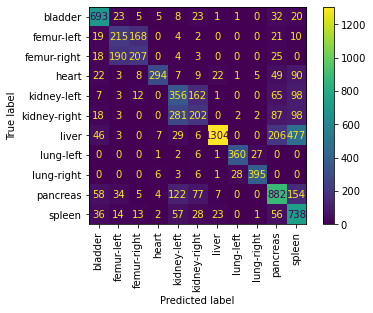

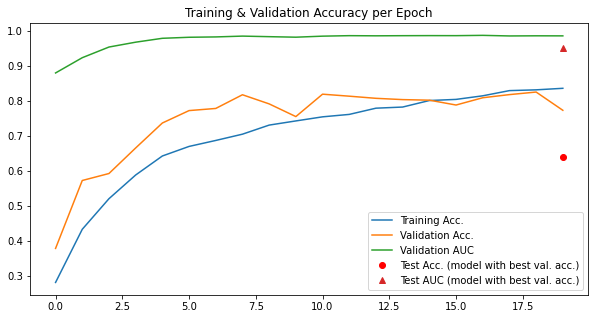

In [20]:
clf = run_classifier_pipeline(
    "organsmnist", info_flags, organsmnist_WSR_GDA,
    DA_technique=DA_technique
)

### 3.4. Training on the MedMNIST datasets with GDA but without WSR

In [21]:
# Declares the baseline setup to save the related model
DA_technique="_noWSR_GDA"

#### PathMNIST

{
  "python_class": "PathMNIST",
  "description": "The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of 7,180 image patches from a different clinical center. The dataset is comprised of 9 types of tissues, resulting in a multi-class classification task. We resize the source images of 3\u00d7224\u00d7224 into 3\u00d728\u00d728, and split NCT-CRC-HE-100K into training and validation set with a ratio of 9:1. The CRC-VAL-HE-7K is treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/pathmnist.npz?download=1",
  "MD5": "a8b06965200029087d5bd730944a56c1",
  "task": "multi-class",
  "label": {
    "0": "adipose",
    "1": "background",
    "2": "debris",
    "3": "lymphocytes",
    "4": "mucus",
    "5": "smooth muscle",
    "6": "normal colon mucosa"

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:50<00:00, 12.76it/s]


train -- accuracy: 0.5606
val -- accuracy: 0.6587,  AUC: 0.946
Epoch 1



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:50<00:00, 12.68it/s]


train -- accuracy: 0.7383
val -- accuracy: 0.7494,  AUC: 0.9669
Epoch 2



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:53<00:00, 12.43it/s]


train -- accuracy: 0.7974
val -- accuracy: 0.8084,  AUC: 0.9811
Epoch 3



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:52<00:00, 12.55it/s]


train -- accuracy: 0.8325
val -- accuracy: 0.8275,  AUC: 0.9841
Epoch 4



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:51<00:00, 12.56it/s]


train -- accuracy: 0.851
val -- accuracy: 0.8298,  AUC: 0.9852
Epoch 5



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:50<00:00, 12.75it/s]


train -- accuracy: 0.8616
val -- accuracy: 0.8635,  AUC: 0.9888
Epoch 6



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:53<00:00, 12.45it/s]


train -- accuracy: 0.8741
val -- accuracy: 0.8817,  AUC: 0.9912
Epoch 7



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:52<00:00, 12.52it/s]


train -- accuracy: 0.8827
val -- accuracy: 0.8729,  AUC: 0.9901
Epoch 8



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:51<00:00, 12.65it/s]


train -- accuracy: 0.8887
val -- accuracy: 0.8993,  AUC: 0.9929
Epoch 9



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:51<00:00, 12.60it/s]


train -- accuracy: 0.8942
val -- accuracy: 0.8713,  AUC: 0.9914
Epoch 10



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:51<00:00, 12.62it/s]


train -- accuracy: 0.8974
val -- accuracy: 0.8943,  AUC: 0.9934
Epoch 11



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:51<00:00, 12.62it/s]


train -- accuracy: 0.9031
val -- accuracy: 0.8937,  AUC: 0.9935
Epoch 12



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:51<00:00, 12.67it/s]


train -- accuracy: 0.9089
val -- accuracy: 0.8958,  AUC: 0.9926
Epoch 13



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:51<00:00, 12.65it/s]


train -- accuracy: 0.9115
val -- accuracy: 0.9017,  AUC: 0.9942
Epoch 14



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:51<00:00, 12.67it/s]


train -- accuracy: 0.9155
val -- accuracy: 0.8973,  AUC: 0.9943
Epoch 15



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:52<00:00, 12.53it/s]


train -- accuracy: 0.918
val -- accuracy: 0.909,  AUC: 0.9947
Epoch 16



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:50<00:00, 12.70it/s]


train -- accuracy: 0.9186
val -- accuracy: 0.9199,  AUC: 0.9952
Epoch 17



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:50<00:00, 12.69it/s]


train -- accuracy: 0.921
val -- accuracy: 0.8932,  AUC: 0.9936
Epoch 18



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:51<00:00, 12.58it/s]


train -- accuracy: 0.924
val -- accuracy: 0.9232,  AUC: 0.9961
Epoch 19



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1407/1407 [01:53<00:00, 12.42it/s]


train -- accuracy: 0.9264
val -- accuracy: 0.9226,  AUC: 0.9962
test -- accuracy: 0.8797,  AUC: 0.9894


<Figure size 720x720 with 0 Axes>

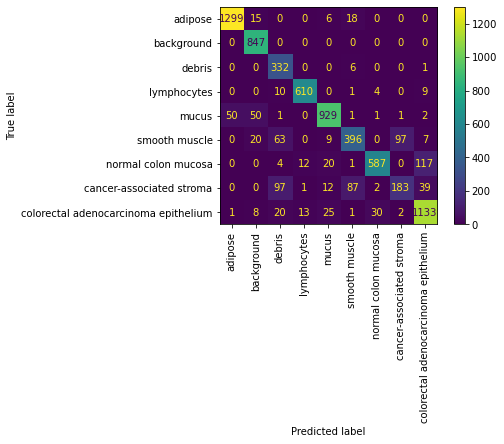

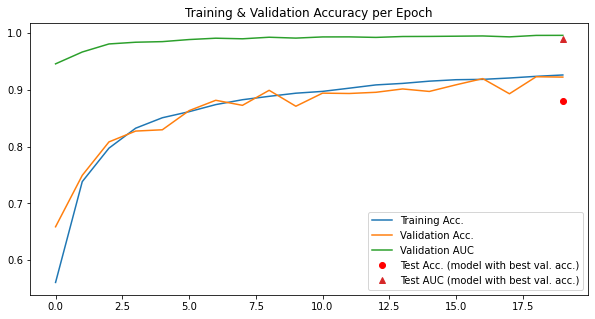

In [22]:
clf = run_classifier_pipeline(
    "pathmnist", info_flags, pathmnist_noWSR_GDA,
    DA_technique=DA_technique
)

#### DermaMNIST

{
  "python_class": "DermaMNIST",
  "description": "The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3\u00d7600\u00d7450 are resized into 3\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/dermamnist.npz?download=1",
  "MD5": "0744692d530f8e62ec473284d019b0c7",
  "task": "multi-class",
  "label": {
    "0": "actinic keratoses and intraepithelial carcinoma",
    "1": "basal cell carcinoma",
    "2": "benign keratosis-like lesions",
    "3": "dermatofibroma",
    "4": "melanoma",
    "5": "melanocytic nevi",
    "6": "vascular lesions"
  },
  "n_channels": 3,
  "n_samples": {
    "train": 7007,
    "val": 1003,
    "test": 2005
  },
  "license": "CC B

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:08<00:00, 12.48it/s]


train -- accuracy: 0.2242
val -- accuracy: 0.4487,  AUC: 0.7696
Epoch 1



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:08<00:00, 12.40it/s]


train -- accuracy: 0.3357
val -- accuracy: 0.5394,  AUC: 0.8056
Epoch 2



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:08<00:00, 12.36it/s]


train -- accuracy: 0.3849
val -- accuracy: 0.5563,  AUC: 0.8414
Epoch 3



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:08<00:00, 12.54it/s]


train -- accuracy: 0.4284
val -- accuracy: 0.6082,  AUC: 0.8528
Epoch 4



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:08<00:00, 12.54it/s]


train -- accuracy: 0.4688
val -- accuracy: 0.5803,  AUC: 0.8701
Epoch 5



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:08<00:00, 12.45it/s]


train -- accuracy: 0.5008
val -- accuracy: 0.5613,  AUC: 0.8628
Epoch 6



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:09<00:00, 12.14it/s]


train -- accuracy: 0.5376
val -- accuracy: 0.5892,  AUC: 0.8659
Epoch 7



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:08<00:00, 12.33it/s]


train -- accuracy: 0.5653
val -- accuracy: 0.6122,  AUC: 0.87
Epoch 8



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:08<00:00, 12.39it/s]


train -- accuracy: 0.5928
val -- accuracy: 0.5842,  AUC: 0.8822
Epoch 9



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:11<00:00,  9.21it/s]


train -- accuracy: 0.619
val -- accuracy: 0.6351,  AUC: 0.8916
Epoch 10



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:09<00:00, 12.22it/s]


train -- accuracy: 0.6508
val -- accuracy: 0.5633,  AUC: 0.8738
Epoch 11



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:08<00:00, 12.27it/s]


train -- accuracy: 0.6673
val -- accuracy: 0.6421,  AUC: 0.869
Epoch 12



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:09<00:00, 12.08it/s]


train -- accuracy: 0.6947
val -- accuracy: 0.6032,  AUC: 0.8877
Epoch 13



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:09<00:00, 11.88it/s]


train -- accuracy: 0.7107
val -- accuracy: 0.5952,  AUC: 0.8863
Epoch 14



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:08<00:00, 12.43it/s]


train -- accuracy: 0.7256
val -- accuracy: 0.6241,  AUC: 0.8912
Epoch 15



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:08<00:00, 12.43it/s]


train -- accuracy: 0.7434
val -- accuracy: 0.682,  AUC: 0.8887
Epoch 16



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:08<00:00, 12.64it/s]


train -- accuracy: 0.7631
val -- accuracy: 0.6132,  AUC: 0.8841
Epoch 17



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:08<00:00, 12.68it/s]


train -- accuracy: 0.7572
val -- accuracy: 0.5703,  AUC: 0.8771
Epoch 18



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:08<00:00, 12.71it/s]


train -- accuracy: 0.7889
val -- accuracy: 0.681,  AUC: 0.8907
Epoch 19



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:08<00:00, 12.54it/s]


train -- accuracy: 0.7949
val -- accuracy: 0.654,  AUC: 0.8989
test -- accuracy: 0.6653,  AUC: 0.8997


<Figure size 720x720 with 0 Axes>

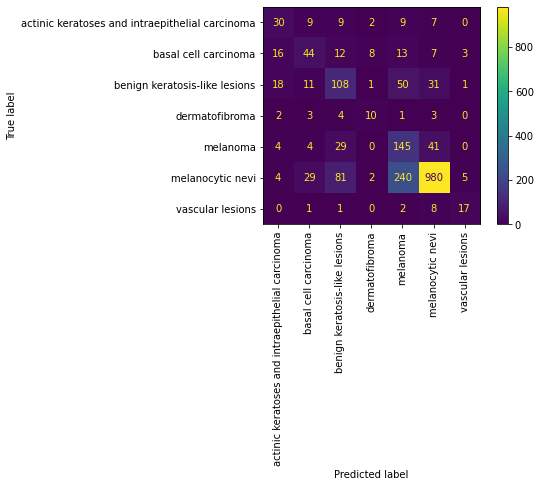

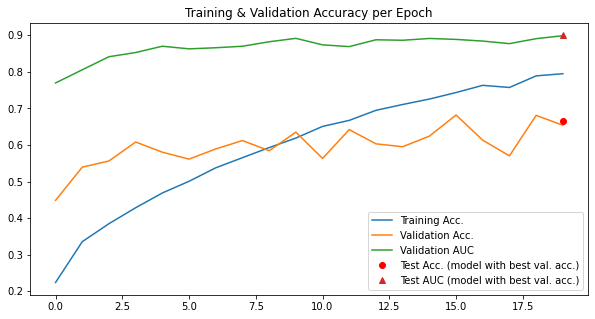

In [23]:
clf = run_classifier_pipeline(
    "dermamnist", info_flags, dermamnist_noWSR_GDA,
    DA_technique=DA_technique
)

#### OctMNIST

{
  "python_class": "OCTMNIST",
  "description": "The OCTMNIST is based on a prior dataset of 109,309 valid optical coherence tomography (OCT) images for retinal diseases. The dataset is comprised of 4 diagnosis categories, leading to a multi-class classification task. We split the source training set with a ratio of 9:1 into training and validation set, and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384\u22121,536)\u00d7(277\u2212512). We center-crop the images and resize them into 1\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/octmnist.npz?download=1",
  "MD5": "c68d92d5b585d8d81f7112f81e2d0842",
  "task": "multi-class",
  "label": {
    "0": "choroidal neovascularization",
    "1": "diabetic macular edema",
    "2": "drusen",
    "3": "normal"
  },
  "n_channels": 1,
  "n_samples": {
    "train": 97477,
    "val": 10832,
    "test": 1000
  },
  "license": "CC BY 4.0"
}
--------------------------------

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:42<00:00, 35.46it/s]


train -- accuracy: 0.6695
val -- accuracy: 0.7867,  AUC: 0.9459
Epoch 1



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:43<00:00, 35.22it/s]


train -- accuracy: 0.7807
val -- accuracy: 0.7885,  AUC: 0.9543
Epoch 2



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:43<00:00, 35.33it/s]


train -- accuracy: 0.8121
val -- accuracy: 0.8061,  AUC: 0.9565
Epoch 3



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:43<00:00, 35.27it/s]


train -- accuracy: 0.8303
val -- accuracy: 0.8138,  AUC: 0.9575
Epoch 4



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:43<00:00, 34.67it/s]


train -- accuracy: 0.8415
val -- accuracy: 0.8597,  AUC: 0.9636
Epoch 5



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:43<00:00, 35.07it/s]


train -- accuracy: 0.8499
val -- accuracy: 0.831,  AUC: 0.9636
Epoch 6



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:43<00:00, 34.64it/s]


train -- accuracy: 0.8588
val -- accuracy: 0.822,  AUC: 0.9644
Epoch 7



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:43<00:00, 35.39it/s]


train -- accuracy: 0.868
val -- accuracy: 0.885,  AUC: 0.9676
Epoch 8



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:43<00:00, 35.34it/s]


train -- accuracy: 0.8727
val -- accuracy: 0.8773,  AUC: 0.9675
Epoch 9



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:43<00:00, 34.77it/s]


train -- accuracy: 0.8775
val -- accuracy: 0.8867,  AUC: 0.9673
Epoch 10



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:43<00:00, 35.32it/s]


train -- accuracy: 0.8861
val -- accuracy: 0.871,  AUC: 0.9687
Epoch 11



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:43<00:00, 34.95it/s]


train -- accuracy: 0.8895
val -- accuracy: 0.8786,  AUC: 0.9695
Epoch 12



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:42<00:00, 35.63it/s]


train -- accuracy: 0.894
val -- accuracy: 0.8648,  AUC: 0.9702
Epoch 13



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:42<00:00, 35.71it/s]


train -- accuracy: 0.9007
val -- accuracy: 0.8783,  AUC: 0.968
Epoch 14



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:43<00:00, 34.98it/s]


train -- accuracy: 0.9017
val -- accuracy: 0.887,  AUC: 0.9686
Epoch 15



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:43<00:00, 35.30it/s]


train -- accuracy: 0.9081
val -- accuracy: 0.8447,  AUC: 0.9682
Epoch 16



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:43<00:00, 35.30it/s]


train -- accuracy: 0.9102
val -- accuracy: 0.8841,  AUC: 0.9699
Epoch 17



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:43<00:00, 34.85it/s]


train -- accuracy: 0.9151
val -- accuracy: 0.8705,  AUC: 0.9698
Epoch 18



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:43<00:00, 35.42it/s]


train -- accuracy: 0.9193
val -- accuracy: 0.8977,  AUC: 0.9683
Epoch 19



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1524/1524 [00:43<00:00, 35.35it/s]


train -- accuracy: 0.9208
val -- accuracy: 0.8859,  AUC: 0.968
test -- accuracy: 0.688,  AUC: 0.9154


<Figure size 720x720 with 0 Axes>

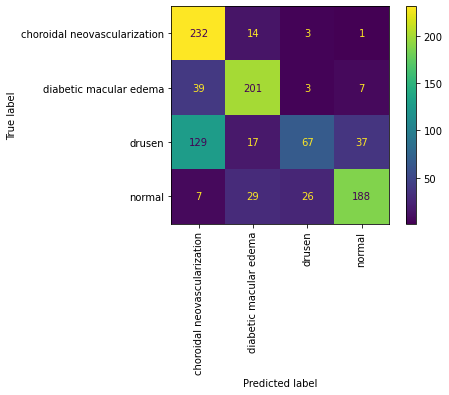

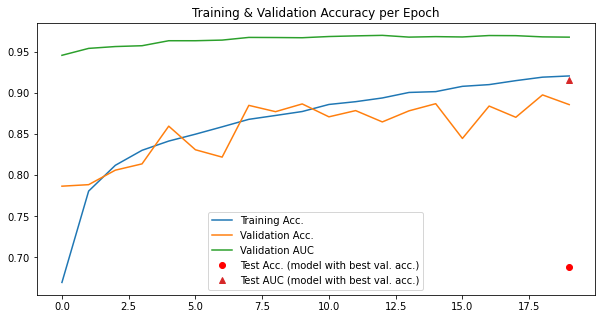

In [24]:
clf = run_classifier_pipeline(
    "octmnist", info_flags, octmnist_noWSR_GDA,
    DA_technique=DA_technique
)

#### PneumoniaMNIST

{
  "python_class": "PneumoniaMNIST",
  "description": "The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384\u22122,916)\u00d7(127\u22122,713). We center-crop the images and resize them into 1\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/pneumoniamnist.npz?download=1",
  "MD5": "28209eda62fecd6e6a2d98b1501bb15f",
  "task": "binary-class",
  "label": {
    "0": "normal",
    "1": "pneumonia"
  },
  "n_channels": 1,
  "n_samples": {
    "train": 4708,
    "val": 524,
    "test": 624
  },
  "license": "CC BY 4.0"
}
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 36.32it/s]


train -- accuracy: 0.7676
val -- accuracy: 0.9351,  AUC: 0.9781
Epoch 1



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 35.54it/s]


train -- accuracy: 0.9284
val -- accuracy: 0.9485,  AUC: 0.9869
Epoch 2



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 36.47it/s]


train -- accuracy: 0.941
val -- accuracy: 0.9599,  AUC: 0.991
Epoch 3



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 36.06it/s]


train -- accuracy: 0.9469
val -- accuracy: 0.9504,  AUC: 0.992
Epoch 4



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 36.33it/s]


train -- accuracy: 0.9575
val -- accuracy: 0.9561,  AUC: 0.9943
Epoch 5



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 34.47it/s]


train -- accuracy: 0.9609
val -- accuracy: 0.9656,  AUC: 0.9941
Epoch 6



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 36.17it/s]


train -- accuracy: 0.9652
val -- accuracy: 0.9618,  AUC: 0.9941
Epoch 7



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 36.23it/s]


train -- accuracy: 0.9715
val -- accuracy: 0.9656,  AUC: 0.9946
Epoch 8



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 34.80it/s]


train -- accuracy: 0.9675
val -- accuracy: 0.9218,  AUC: 0.9944
Epoch 9



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 35.44it/s]


train -- accuracy: 0.9673
val -- accuracy: 0.9618,  AUC: 0.9944
Epoch 10



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 36.07it/s]


train -- accuracy: 0.9745
val -- accuracy: 0.9637,  AUC: 0.9949
Epoch 11



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 36.64it/s]


train -- accuracy: 0.9775
val -- accuracy: 0.958,  AUC: 0.9955
Epoch 12



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 36.36it/s]


train -- accuracy: 0.9798
val -- accuracy: 0.9695,  AUC: 0.9957
Epoch 13



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 35.96it/s]


train -- accuracy: 0.9845
val -- accuracy: 0.9656,  AUC: 0.9947
Epoch 14



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 36.02it/s]


train -- accuracy: 0.9839
val -- accuracy: 0.9618,  AUC: 0.9948
Epoch 15



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 36.13it/s]


train -- accuracy: 0.987
val -- accuracy: 0.9618,  AUC: 0.994
Epoch 16



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 35.11it/s]


train -- accuracy: 0.9873
val -- accuracy: 0.9695,  AUC: 0.9936
Epoch 17



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 36.51it/s]


train -- accuracy: 0.9911
val -- accuracy: 0.9637,  AUC: 0.9942
Epoch 18



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 35.88it/s]


train -- accuracy: 0.9902
val -- accuracy: 0.9599,  AUC: 0.9945
Epoch 19



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 74/74 [00:02<00:00, 36.25it/s]


train -- accuracy: 0.9917
val -- accuracy: 0.9656,  AUC: 0.9953
test -- accuracy: 0.8638,  AUC: 0.9574


<Figure size 720x720 with 0 Axes>

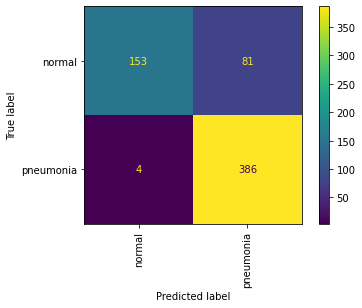

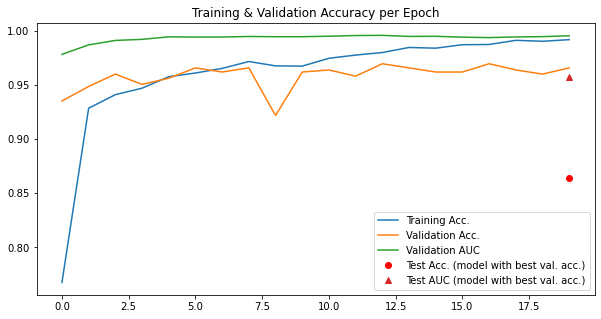

In [25]:
clf = run_classifier_pipeline(
    "pneumoniamnist", info_flags, pneumoniamnist_noWSR_GDA,
    DA_technique=DA_technique
)

#### BreastMNIST

{
  "python_class": "BreastMNIST",
  "description": "The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1\u00d7500\u00d7500 are resized into 1\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/breastmnist.npz?download=1",
  "MD5": "750601b1f35ba3300ea97c75c52ff8f6",
  "task": "binary-class",
  "label": {
    "0": "malignant",
    "1": "normal, benign"
  },
  "n_channels": 1,
  "n_samples": {
    "train": 546,
    "val": 78,
    "test": 156
  },
  "license": "CC BY 4.0"
}
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
    

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 34.78it/s]


train -- accuracy: 0.4799
val -- accuracy: 0.2692,  AUC: 0.4403
Epoch 1



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 37.16it/s]


train -- accuracy: 0.5861
val -- accuracy: 0.3077,  AUC: 0.4315
Epoch 2



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 35.48it/s]


train -- accuracy: 0.5989
val -- accuracy: 0.3718,  AUC: 0.6282
Epoch 3



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 37.30it/s]


train -- accuracy: 0.6722
val -- accuracy: 0.6154,  AUC: 0.7368
Epoch 4



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 36.83it/s]


train -- accuracy: 0.6648
val -- accuracy: 0.7436,  AUC: 0.7444
Epoch 5



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 34.74it/s]


train -- accuracy: 0.652
val -- accuracy: 0.7308,  AUC: 0.7469
Epoch 6



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 36.04it/s]


train -- accuracy: 0.685
val -- accuracy: 0.6667,  AUC: 0.7452
Epoch 7



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 37.77it/s]


train -- accuracy: 0.6996
val -- accuracy: 0.6795,  AUC: 0.7385
Epoch 8



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 38.28it/s]


train -- accuracy: 0.7271
val -- accuracy: 0.6795,  AUC: 0.7444
Epoch 9



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 35.37it/s]


train -- accuracy: 0.7088
val -- accuracy: 0.7051,  AUC: 0.7477
Epoch 10



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 38.09it/s]


train -- accuracy: 0.7198
val -- accuracy: 0.6795,  AUC: 0.7519
Epoch 11



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 37.76it/s]


train -- accuracy: 0.7161
val -- accuracy: 0.7051,  AUC: 0.7636
Epoch 12



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 36.03it/s]


train -- accuracy: 0.7143
val -- accuracy: 0.7308,  AUC: 0.7778
Epoch 13



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 38.39it/s]


train -- accuracy: 0.7289
val -- accuracy: 0.7436,  AUC: 0.797
Epoch 14



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 38.17it/s]


train -- accuracy: 0.7582
val -- accuracy: 0.641,  AUC: 0.8062
Epoch 15



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 37.38it/s]


train -- accuracy: 0.7527
val -- accuracy: 0.6795,  AUC: 0.8037
Epoch 16



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 37.21it/s]


train -- accuracy: 0.7436
val -- accuracy: 0.7564,  AUC: 0.8287
Epoch 17



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 38.31it/s]


train -- accuracy: 0.7784
val -- accuracy: 0.6667,  AUC: 0.8304
Epoch 18



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 39.46it/s]


train -- accuracy: 0.7637
val -- accuracy: 0.5897,  AUC: 0.812
Epoch 19



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 35.57it/s]


train -- accuracy: 0.7546
val -- accuracy: 0.7692,  AUC: 0.8571
test -- accuracy: 0.7821,  AUC: 0.8214


<Figure size 720x720 with 0 Axes>

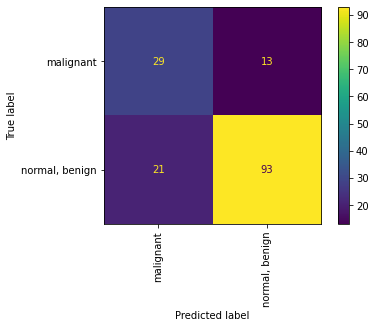

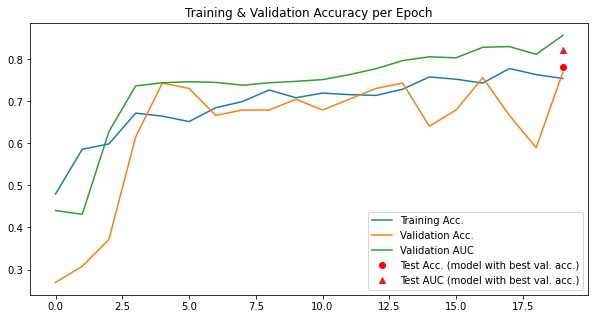

In [26]:
clf = run_classifier_pipeline(
    "breastmnist", info_flags, breastmnist_noWSR_GDA,
    DA_technique=DA_technique
)

#### OrganAMNIST

{
  "python_class": "OrganAMNIST",
  "description": "The OrganAMNIST is based on 3D computed tomography (CT) images from Liver Tumor Segmentation Benchmark (LiTS). It is renamed from OrganMNIST_Axial (in MedMNIST v1) for simplicity. We use bounding-box annotations of 11 body organs from another study to obtain the organ labels. Hounsfield-Unit (HU) of the 3D images are transformed into gray-scale with an abdominal window. We crop 2D images from the center slices of the 3D bounding boxes in axial views (planes). The images are resized into 1\u00d728\u00d728 to perform multi-class classification of 11 body organs. 115 and 16 CT scans from the source training set are used as training and validation set, respectively. The 70 CT scans from the source test set are treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/organamnist.npz?download=1",
  "MD5": "866b832ed4eeba67bfb9edee1d5544e6",
  "task": "multi-class",
  "label": {
    "0": "bladder",
    "1": "femur-left",

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 34.89it/s]


train -- accuracy: 0.5426
val -- accuracy: 0.839,  AUC: 0.9852
Epoch 1



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 35.39it/s]


train -- accuracy: 0.8162
val -- accuracy: 0.9066,  AUC: 0.9947
Epoch 2



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 35.47it/s]


train -- accuracy: 0.8718
val -- accuracy: 0.919,  AUC: 0.9964
Epoch 3



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 34.68it/s]


train -- accuracy: 0.9034
val -- accuracy: 0.9379,  AUC: 0.9975
Epoch 4



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 34.60it/s]


train -- accuracy: 0.9173
val -- accuracy: 0.9465,  AUC: 0.9977
Epoch 5



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 34.70it/s]


train -- accuracy: 0.9331
val -- accuracy: 0.9499,  AUC: 0.9981
Epoch 6



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 34.79it/s]


train -- accuracy: 0.9444
val -- accuracy: 0.955,  AUC: 0.9988
Epoch 7



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 35.17it/s]


train -- accuracy: 0.9512
val -- accuracy: 0.9485,  AUC: 0.9983
Epoch 8



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 34.16it/s]


train -- accuracy: 0.9565
val -- accuracy: 0.9623,  AUC: 0.999
Epoch 9



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 34.96it/s]


train -- accuracy: 0.9634
val -- accuracy: 0.9587,  AUC: 0.9991
Epoch 10



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 34.43it/s]


train -- accuracy: 0.9665
val -- accuracy: 0.9518,  AUC: 0.999
Epoch 11



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 35.29it/s]


train -- accuracy: 0.9687
val -- accuracy: 0.9542,  AUC: 0.9989
Epoch 12



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 35.25it/s]


train -- accuracy: 0.974
val -- accuracy: 0.9587,  AUC: 0.999
Epoch 13



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 34.16it/s]


train -- accuracy: 0.9773
val -- accuracy: 0.9629,  AUC: 0.9992
Epoch 14



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 34.69it/s]


train -- accuracy: 0.9792
val -- accuracy: 0.9509,  AUC: 0.9988
Epoch 15



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 34.98it/s]


train -- accuracy: 0.9795
val -- accuracy: 0.9613,  AUC: 0.9992
Epoch 16



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 35.03it/s]


train -- accuracy: 0.9822
val -- accuracy: 0.9623,  AUC: 0.9992
Epoch 17



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 34.83it/s]


train -- accuracy: 0.9846
val -- accuracy: 0.9533,  AUC: 0.9991
Epoch 18



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 33.82it/s]


train -- accuracy: 0.9853
val -- accuracy: 0.9612,  AUC: 0.9991
Epoch 19



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 541/541 [00:15<00:00, 34.86it/s]


train -- accuracy: 0.9853
val -- accuracy: 0.9547,  AUC: 0.999
test -- accuracy: 0.8703,  AUC: 0.9887


<Figure size 720x720 with 0 Axes>

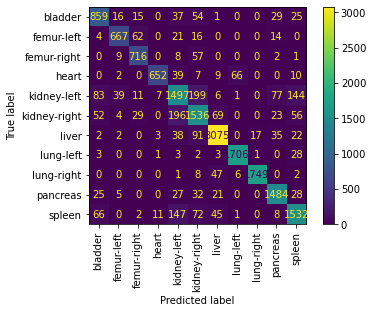

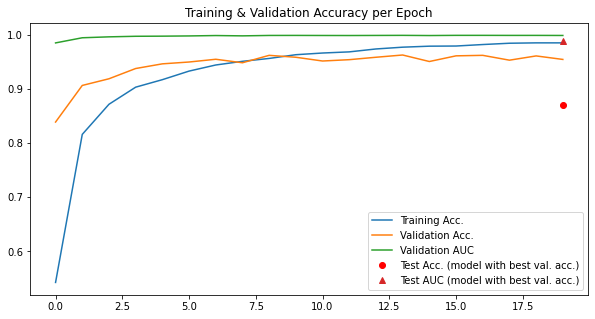

In [27]:
clf = run_classifier_pipeline(
    "organamnist", info_flags, organamnist_noWSR_GDA,
    DA_technique=DA_technique
)

#### OrganCMNIST

{
  "python_class": "OrganCMNIST",
  "description": "The OrganCMNIST is based on 3D computed tomography (CT) images from Liver Tumor Segmentation Benchmark (LiTS). It is renamed from OrganMNIST_Coronal (in MedMNIST v1) for simplicity. We use bounding-box annotations of 11 body organs from another study to obtain the organ labels. Hounsfield-Unit (HU) of the 3D images are transformed into gray-scale with an abdominal window. We crop 2D images from the center slices of the 3D bounding boxes in coronal views (planes). The images are resized into 1\u00d728\u00d728 to perform multi-class classification of 11 body organs. 115 and 16 CT scans from the source training set are used as training and validation set, respectively. The 70 CT scans from the source test set are treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/organcmnist.npz?download=1",
  "MD5": "0afa5834fb105f7705a7d93372119a21",
  "task": "multi-class",
  "label": {
    "0": "bladder",
    "1": "femur-le

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 35.16it/s]


train -- accuracy: 0.3578
val -- accuracy: 0.6472,  AUC: 0.9149
Epoch 1



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 34.59it/s]


train -- accuracy: 0.5805
val -- accuracy: 0.8027,  AUC: 0.9786
Epoch 2



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 34.62it/s]


train -- accuracy: 0.7063
val -- accuracy: 0.8637,  AUC: 0.9894
Epoch 3



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 34.70it/s]


train -- accuracy: 0.7678
val -- accuracy: 0.9089,  AUC: 0.9943
Epoch 4



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:06<00:00, 32.34it/s]


train -- accuracy: 0.8091
val -- accuracy: 0.9327,  AUC: 0.9961
Epoch 5



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 34.58it/s]


train -- accuracy: 0.8244
val -- accuracy: 0.926,  AUC: 0.9949
Epoch 6



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 34.82it/s]


train -- accuracy: 0.8435
val -- accuracy: 0.9051,  AUC: 0.996
Epoch 7



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 35.62it/s]


train -- accuracy: 0.8646
val -- accuracy: 0.9461,  AUC: 0.9972
Epoch 8



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 34.03it/s]


train -- accuracy: 0.8708
val -- accuracy: 0.9331,  AUC: 0.9966
Epoch 9



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 34.82it/s]


train -- accuracy: 0.8838
val -- accuracy: 0.9402,  AUC: 0.9972
Epoch 10



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 34.51it/s]


train -- accuracy: 0.8917
val -- accuracy: 0.939,  AUC: 0.9969
Epoch 11



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 34.73it/s]


train -- accuracy: 0.9035
val -- accuracy: 0.9093,  AUC: 0.9958
Epoch 12



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 34.91it/s]


train -- accuracy: 0.9051
val -- accuracy: 0.9344,  AUC: 0.9967
Epoch 13



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:06<00:00, 33.09it/s]


train -- accuracy: 0.9152
val -- accuracy: 0.9515,  AUC: 0.9974
Epoch 14



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 35.42it/s]


train -- accuracy: 0.9166
val -- accuracy: 0.9444,  AUC: 0.9971
Epoch 15



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 35.63it/s]


train -- accuracy: 0.9255
val -- accuracy: 0.9452,  AUC: 0.9972
Epoch 16



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 34.56it/s]


train -- accuracy: 0.931
val -- accuracy: 0.9273,  AUC: 0.9969
Epoch 17



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 35.12it/s]


train -- accuracy: 0.9355
val -- accuracy: 0.9515,  AUC: 0.9974
Epoch 18



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 35.61it/s]


train -- accuracy: 0.9451
val -- accuracy: 0.9448,  AUC: 0.9969
Epoch 19



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 204/204 [00:05<00:00, 35.59it/s]


train -- accuracy: 0.9403
val -- accuracy: 0.9327,  AUC: 0.997
test -- accuracy: 0.8319,  AUC: 0.9835


<Figure size 720x720 with 0 Axes>

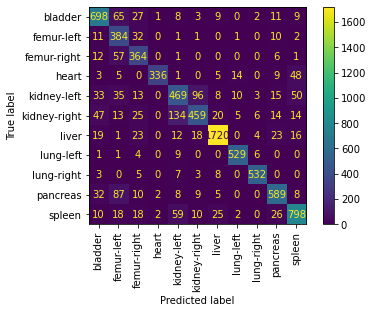

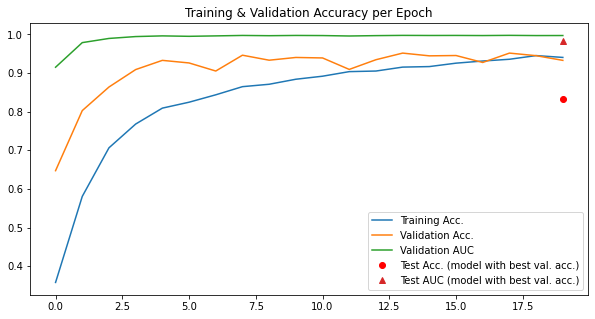

In [28]:
clf = run_classifier_pipeline(
    "organcmnist", info_flags, organcmnist_noWSR_GDA,
    DA_technique=DA_technique
)

#### OrganSMNIST

{
  "python_class": "OrganSMNIST",
  "description": "The OrganSMNIST is based on 3D computed tomography (CT) images from Liver Tumor Segmentation Benchmark (LiTS). It is renamed from OrganMNIST_Sagittal (in MedMNIST v1) for simplicity. We use bounding-box annotations of 11 body organs from another study to obtain the organ labels. Hounsfield-Unit (HU) of the 3D images are transformed into gray-scale with an abdominal window. We crop 2D images from the center slices of the 3D bounding boxes in sagittal views (planes). The images are resized into 1\u00d728\u00d728 to perform multi-class classification of 11 body organs. 115 and 16 CT scans from the source training set are used as training and validation set, respectively. The 70 CT scans from the source test set are treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/organsmnist.npz?download=1",
  "MD5": "e5c39f1af030238290b9557d9503af9d",
  "task": "multi-class",
  "label": {
    "0": "bladder",
    "1": "femur-

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 35.36it/s]


train -- accuracy: 0.2423
val -- accuracy: 0.314,  AUC: 0.8796
Epoch 1



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 35.39it/s]


train -- accuracy: 0.4189
val -- accuracy: 0.544,  AUC: 0.9084
Epoch 2



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 34.86it/s]


train -- accuracy: 0.5119
val -- accuracy: 0.6293,  AUC: 0.9499
Epoch 3



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 35.50it/s]


train -- accuracy: 0.5865
val -- accuracy: 0.6684,  AUC: 0.9657
Epoch 4



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 34.83it/s]


train -- accuracy: 0.6219
val -- accuracy: 0.7202,  AUC: 0.9751
Epoch 5



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 34.91it/s]


train -- accuracy: 0.6568
val -- accuracy: 0.761,  AUC: 0.9798
Epoch 6



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 35.04it/s]


train -- accuracy: 0.6745
val -- accuracy: 0.7508,  AUC: 0.9819
Epoch 7



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 34.07it/s]


train -- accuracy: 0.7044
val -- accuracy: 0.7761,  AUC: 0.9828
Epoch 8



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 35.13it/s]


train -- accuracy: 0.7196
val -- accuracy: 0.7867,  AUC: 0.9847
Epoch 9



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 35.15it/s]


train -- accuracy: 0.7346
val -- accuracy: 0.7981,  AUC: 0.9853
Epoch 10



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 34.65it/s]


train -- accuracy: 0.7473
val -- accuracy: 0.7945,  AUC: 0.9853
Epoch 11



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 32.46it/s]


train -- accuracy: 0.7659
val -- accuracy: 0.8051,  AUC: 0.9849
Epoch 12



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 34.86it/s]


train -- accuracy: 0.7691
val -- accuracy: 0.8165,  AUC: 0.9866
Epoch 13



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 34.21it/s]


train -- accuracy: 0.7831
val -- accuracy: 0.8124,  AUC: 0.9865
Epoch 14



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 35.18it/s]


train -- accuracy: 0.798
val -- accuracy: 0.8116,  AUC: 0.9857
Epoch 15



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 35.21it/s]


train -- accuracy: 0.8024
val -- accuracy: 0.8091,  AUC: 0.9859
Epoch 16



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 34.51it/s]


train -- accuracy: 0.8125
val -- accuracy: 0.8361,  AUC: 0.9888
Epoch 17



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 35.34it/s]


train -- accuracy: 0.8177
val -- accuracy: 0.8271,  AUC: 0.9884
Epoch 18



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 35.51it/s]


train -- accuracy: 0.8258
val -- accuracy: 0.759,  AUC: 0.9855
Epoch 19



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:06<00:00, 35.62it/s]


train -- accuracy: 0.8343
val -- accuracy: 0.8132,  AUC: 0.9863
test -- accuracy: 0.6864,  AUC: 0.9542


<Figure size 720x720 with 0 Axes>

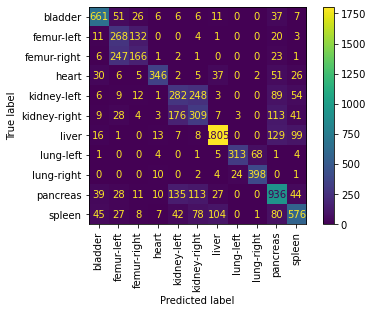

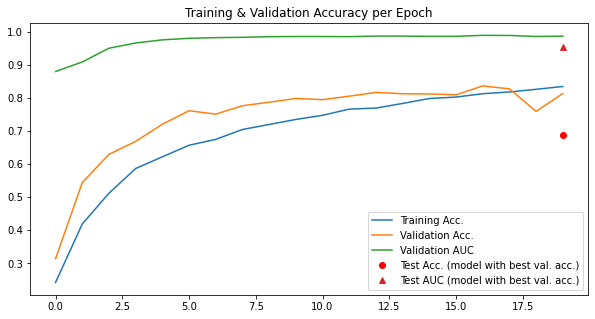

In [29]:
clf = run_classifier_pipeline(
    "organsmnist", info_flags, organsmnist_noWSR_GDA,
    DA_technique=DA_technique
)

## 4. Training a Conditional Variational Autoencoder 

We train a Conditional Variational Autoencoder for data augmentation for each of the datasets. 

For each dataset, we then retrain the underlying baseline classifier.

In [30]:
# Declares the Conditional VAE's hyperparameters
latent_dims = 150
epochs = 200

### PathMNIST

#### Training the Conditional VAE

In [31]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "pathmnist"
base_dataset = pathmnist_noWRS_noGDA

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

Testing Conditional Variational Autoencoder:
Clearing CUDA Pytorch Cache
Model Output size: torch.Size([10, 3, 28, 28])
Forward pass test:  True
{'loss': tensor(26135.4980, grad_fn=<AddBackward0>), 'Reconstruction_Loss': tensor(26135.4082, grad_fn=<MseLossBackward>), 'KLD': tensor(-18.0081, grad_fn=<NegBackward>)}
Loss test:  True
Cuda device:  cuda
Training phase:
Train epoch 1 -- average loss: 78.56070144933416
Validation set loss: 61.878848
Train epoch 2 -- average loss: 59.140029300238865
Validation set loss: 56.053766
Train epoch 3 -- average loss: 53.67366504402149
Validation set loss: 51.036159
Train epoch 4 -- average loss: 49.50042732883397
Validation set loss: 47.898431
Train epoch 5 -- average loss: 46.96846417864882
Validation set loss: 45.04989
Train epoch 6 -- average loss: 45.331653317078846
Validation set loss: 43.465347
Train epoch 7 -- average loss: 43.57910336108254
Validation set loss: 41.993328
Train epoch 8 -- average loss: 42.32346364306187
Validation set loss: 4

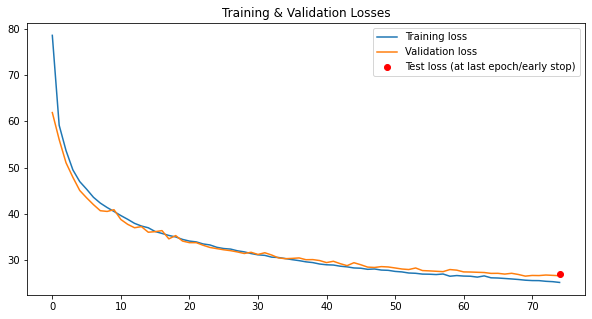

In [32]:
# Runs the conditional VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader, n_channels, latent_dims,  
    n_classes=n_classes, epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="CondVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [33]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/CondVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 4
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

Number of generated images: 3599 (4% of the dataset)


2. <u>Retraining the classifier and assessing changes in performance</u>

{
  "python_class": "PathMNIST",
  "description": "The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of 7,180 image patches from a different clinical center. The dataset is comprised of 9 types of tissues, resulting in a multi-class classification task. We resize the source images of 3\u00d7224\u00d7224 into 3\u00d728\u00d728, and split NCT-CRC-HE-100K into training and validation set with a ratio of 9:1. The CRC-VAL-HE-7K is treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/pathmnist.npz?download=1",
  "MD5": "a8b06965200029087d5bd730944a56c1",
  "task": "multi-class",
  "label": {
    "0": "adipose",
    "1": "background",
    "2": "debris",
    "3": "lymphocytes",
    "4": "mucus",
    "5": "smooth muscle",
    "6": "normal colon mucosa"

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:15<00:00, 96.21it/s]


train -- accuracy: 0.6601
val -- accuracy: 0.7696,  AUC: 0.9755
Epoch 1



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:15<00:00, 94.76it/s]


train -- accuracy: 0.818
val -- accuracy: 0.8171,  AUC: 0.9835
Epoch 2



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:14<00:00, 97.54it/s]


train -- accuracy: 0.8599
val -- accuracy: 0.8495,  AUC: 0.989
Epoch 3



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:15<00:00, 97.12it/s]


train -- accuracy: 0.8817
val -- accuracy: 0.8999,  AUC: 0.994
Epoch 4



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:15<00:00, 95.64it/s]


train -- accuracy: 0.8968
val -- accuracy: 0.8642,  AUC: 0.9918
Epoch 5



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:15<00:00, 93.98it/s]


train -- accuracy: 0.9078
val -- accuracy: 0.8721,  AUC: 0.9919
Epoch 6



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:15<00:00, 96.30it/s]


train -- accuracy: 0.9176
val -- accuracy: 0.912,  AUC: 0.9953
Epoch 7



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:15<00:00, 94.73it/s]


train -- accuracy: 0.9226
val -- accuracy: 0.9293,  AUC: 0.996
Epoch 8



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:15<00:00, 93.44it/s]


train -- accuracy: 0.9293
val -- accuracy: 0.9329,  AUC: 0.9969
Epoch 9



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:15<00:00, 94.17it/s]


train -- accuracy: 0.9335
val -- accuracy: 0.9283,  AUC: 0.9967
Epoch 10



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:15<00:00, 95.00it/s]


train -- accuracy: 0.9383
val -- accuracy: 0.9352,  AUC: 0.9969
Epoch 11



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:15<00:00, 93.14it/s]


train -- accuracy: 0.9433
val -- accuracy: 0.9273,  AUC: 0.9966
Epoch 12



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:15<00:00, 92.86it/s]


train -- accuracy: 0.9446
val -- accuracy: 0.9455,  AUC: 0.9972
Epoch 13



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:15<00:00, 94.25it/s]


train -- accuracy: 0.949
val -- accuracy: 0.9337,  AUC: 0.9971
Epoch 14



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:15<00:00, 93.07it/s]


train -- accuracy: 0.951
val -- accuracy: 0.9521,  AUC: 0.9978
Epoch 15



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:15<00:00, 94.22it/s]


train -- accuracy: 0.9536
val -- accuracy: 0.9391,  AUC: 0.9972
Epoch 16



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:15<00:00, 93.59it/s]


train -- accuracy: 0.9574
val -- accuracy: 0.943,  AUC: 0.9974
Epoch 17



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:15<00:00, 92.80it/s]


train -- accuracy: 0.9586
val -- accuracy: 0.9325,  AUC: 0.9972
Epoch 18



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:15<00:00, 95.03it/s]


train -- accuracy: 0.9606
val -- accuracy: 0.9441,  AUC: 0.9977
Epoch 19



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:15<00:00, 92.13it/s]


train -- accuracy: 0.964
val -- accuracy: 0.949,  AUC: 0.9978
test -- accuracy: 0.8749,  AUC: 0.9811


<Figure size 720x720 with 0 Axes>

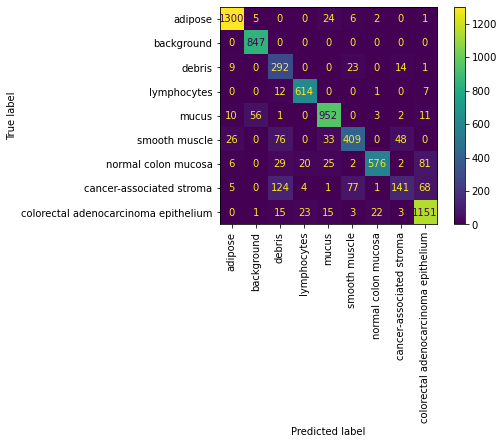

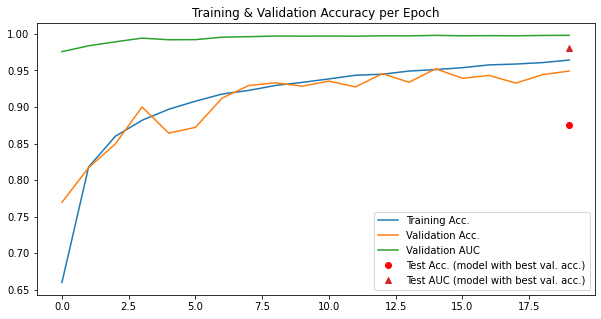

In [34]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [35]:
# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

{
  "python_class": "PathMNIST",
  "description": "The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of 7,180 image patches from a different clinical center. The dataset is comprised of 9 types of tissues, resulting in a multi-class classification task. We resize the source images of 3\u00d7224\u00d7224 into 3\u00d728\u00d728, and split NCT-CRC-HE-100K into training and validation set with a ratio of 9:1. The CRC-VAL-HE-7K is treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/pathmnist.npz?download=1",
  "MD5": "a8b06965200029087d5bd730944a56c1",
  "task": "multi-class",
  "label": {
    "0": "adipose",
    "1": "background",
    "2": "debris",
    "3": "lymphocytes",
    "4": "mucus",
    "5": "smooth muscle",
    "6": "normal colon mucosa"

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:15<00:00, 96.09it/s]


train -- accuracy: 0.6687
val -- accuracy: 0.7409,  AUC: 0.969
Epoch 1



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:15<00:00, 94.01it/s]


train -- accuracy: 0.8305
val -- accuracy: 0.8315,  AUC: 0.9831
Epoch 2



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:15<00:00, 94.80it/s]


train -- accuracy: 0.8673
val -- accuracy: 0.8624,  AUC: 0.9902
Epoch 3



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:14<00:00, 97.95it/s]


train -- accuracy: 0.8895
val -- accuracy: 0.8987,  AUC: 0.9929
Epoch 4



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:14<00:00, 98.14it/s]


train -- accuracy: 0.9032
val -- accuracy: 0.875,  AUC: 0.9916
Epoch 5



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:15<00:00, 94.63it/s]


train -- accuracy: 0.9154
val -- accuracy: 0.9125,  AUC: 0.9945
Epoch 6



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:14<00:00, 100.25it/s]


train -- accuracy: 0.9215
val -- accuracy: 0.9209,  AUC: 0.9957
Epoch 7



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:14<00:00, 100.49it/s]


train -- accuracy: 0.9269
val -- accuracy: 0.9303,  AUC: 0.9964
Epoch 8



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:14<00:00, 100.05it/s]


train -- accuracy: 0.9344
val -- accuracy: 0.9281,  AUC: 0.9961
Epoch 9



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:14<00:00, 100.75it/s]


train -- accuracy: 0.938
val -- accuracy: 0.9263,  AUC: 0.9968
Epoch 10



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:14<00:00, 100.13it/s]


train -- accuracy: 0.9432
val -- accuracy: 0.9079,  AUC: 0.9955
Epoch 11



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:14<00:00, 99.88it/s]


train -- accuracy: 0.9451
val -- accuracy: 0.9283,  AUC: 0.9967
Epoch 12



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:15<00:00, 96.20it/s]


train -- accuracy: 0.9501
val -- accuracy: 0.9293,  AUC: 0.9967
Epoch 13



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:14<00:00, 100.39it/s]


train -- accuracy: 0.9541
val -- accuracy: 0.9406,  AUC: 0.9971
Epoch 14



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:14<00:00, 98.58it/s]


train -- accuracy: 0.9563
val -- accuracy: 0.9253,  AUC: 0.9962
Epoch 15



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:14<00:00, 99.99it/s]


train -- accuracy: 0.9591
val -- accuracy: 0.9348,  AUC: 0.9972
Epoch 16



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:14<00:00, 100.44it/s]


train -- accuracy: 0.9612
val -- accuracy: 0.9375,  AUC: 0.9972
Epoch 17



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:14<00:00, 99.52it/s]


train -- accuracy: 0.9643
val -- accuracy: 0.9261,  AUC: 0.9958
Epoch 18



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:15<00:00, 95.53it/s]


train -- accuracy: 0.9657
val -- accuracy: 0.9271,  AUC: 0.9962
Epoch 19



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1463/1463 [00:15<00:00, 96.92it/s]


train -- accuracy: 0.969
val -- accuracy: 0.9189,  AUC: 0.9959
test -- accuracy: 0.8616,  AUC: 0.9795


<Figure size 720x720 with 0 Axes>

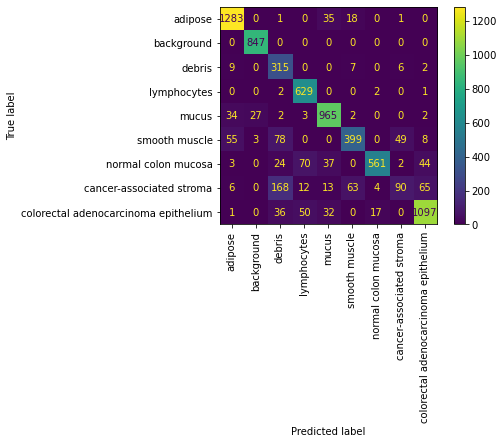

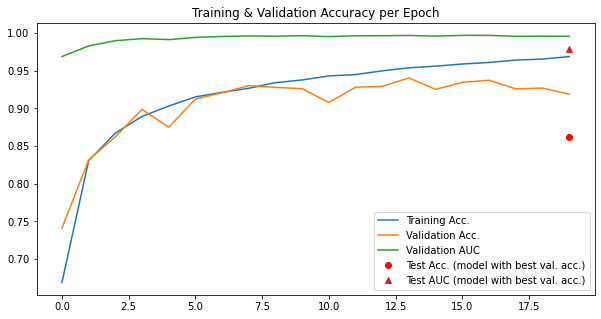

In [36]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

### DermaMNIST

#### Training the Conditional VAE

In [37]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "dermamnist"
base_dataset = dermamnist_noWRS_noGDA

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

Testing Conditional Variational Autoencoder:
Clearing CUDA Pytorch Cache
Model Output size: torch.Size([10, 3, 28, 28])
Forward pass test:  True
{'loss': tensor(27148.3770, grad_fn=<AddBackward0>), 'Reconstruction_Loss': tensor(27148.2793, grad_fn=<MseLossBackward>), 'KLD': tensor(-19.6918, grad_fn=<NegBackward>)}
Loss test:  True
Cuda device:  cuda
Training phase:
Train epoch 1 -- average loss: 101.18495166245584
Validation set loss: 78.681531
Train epoch 2 -- average loss: 53.949758214720546
Validation set loss: 51.155228
Train epoch 3 -- average loss: 40.0898199526478
Validation set loss: 32.556334
Train epoch 4 -- average loss: 32.889547115830595
Validation set loss: 37.201974
Train epoch 5 -- average loss: 29.261201166300218
Validation set loss: 27.064115
Train epoch 6 -- average loss: 27.46072087615231
Validation set loss: 26.040958
Train epoch 7 -- average loss: 26.260258740631578
Validation set loss: 22.711276
Train epoch 8 -- average loss: 24.456448284555847
Validation set los

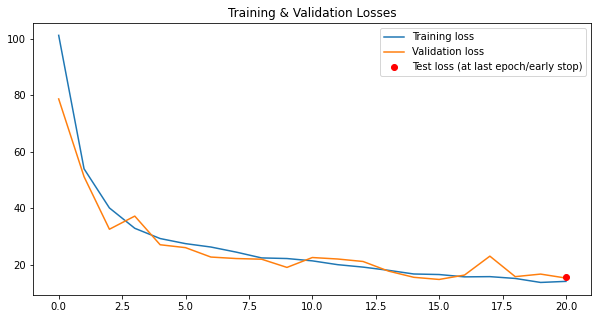

In [38]:
# Runs the conditional VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader, n_channels, latent_dims,  
    n_classes=n_classes, epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="CondVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [39]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/CondVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

Number of generated images: 700 (10% of the dataset)


2. <u>Retraining the classifier and assessing changes in performance</u>

{
  "python_class": "DermaMNIST",
  "description": "The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3\u00d7600\u00d7450 are resized into 3\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/dermamnist.npz?download=1",
  "MD5": "0744692d530f8e62ec473284d019b0c7",
  "task": "multi-class",
  "label": {
    "0": "actinic keratoses and intraepithelial carcinoma",
    "1": "basal cell carcinoma",
    "2": "benign keratosis-like lesions",
    "3": "dermatofibroma",
    "4": "melanoma",
    "5": "melanocytic nevi",
    "6": "vascular lesions"
  },
  "n_channels": 3,
  "n_samples": {
    "train": 7007,
    "val": 1003,
    "test": 2005
  },
  "license": "CC B

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 101.05it/s]


train -- accuracy: 0.5886
val -- accuracy: 0.669,  AUC: 0.8239
Epoch 1



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 99.20it/s]


train -- accuracy: 0.6279
val -- accuracy: 0.68,  AUC: 0.8616
Epoch 2



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 100.52it/s]


train -- accuracy: 0.6464
val -- accuracy: 0.6879,  AUC: 0.8746
Epoch 3



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 99.83it/s]


train -- accuracy: 0.6589
val -- accuracy: 0.6999,  AUC: 0.8746
Epoch 4



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 99.21it/s]


train -- accuracy: 0.6712
val -- accuracy: 0.7119,  AUC: 0.8876
Epoch 5



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 98.87it/s]


train -- accuracy: 0.6886
val -- accuracy: 0.7168,  AUC: 0.8781
Epoch 6



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 101.16it/s]


train -- accuracy: 0.6968
val -- accuracy: 0.7168,  AUC: 0.8853
Epoch 7



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 99.23it/s]


train -- accuracy: 0.7074
val -- accuracy: 0.7258,  AUC: 0.9011
Epoch 8



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 95.97it/s]


train -- accuracy: 0.7117
val -- accuracy: 0.7418,  AUC: 0.9018
Epoch 9



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 99.20it/s]


train -- accuracy: 0.7165
val -- accuracy: 0.7448,  AUC: 0.9055
Epoch 10



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 101.67it/s]


train -- accuracy: 0.7293
val -- accuracy: 0.7527,  AUC: 0.9087
Epoch 11



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 102.11it/s]


train -- accuracy: 0.7317
val -- accuracy: 0.7398,  AUC: 0.9088
Epoch 12



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 101.53it/s]


train -- accuracy: 0.7382
val -- accuracy: 0.7388,  AUC: 0.9075
Epoch 13



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 97.66it/s]


train -- accuracy: 0.753
val -- accuracy: 0.7438,  AUC: 0.911
Epoch 14



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 100.79it/s]


train -- accuracy: 0.7591
val -- accuracy: 0.7428,  AUC: 0.9016
Epoch 15



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 100.49it/s]


train -- accuracy: 0.7646
val -- accuracy: 0.7318,  AUC: 0.9089
Epoch 16



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 102.43it/s]


train -- accuracy: 0.7781
val -- accuracy: 0.7348,  AUC: 0.9025
Epoch 17



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 100.29it/s]


train -- accuracy: 0.793
val -- accuracy: 0.7358,  AUC: 0.9033
Epoch 18



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 102.56it/s]


train -- accuracy: 0.7921
val -- accuracy: 0.7318,  AUC: 0.9014
Epoch 19



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 102.20it/s]


train -- accuracy: 0.8161
val -- accuracy: 0.7468,  AUC: 0.9063
test -- accuracy: 0.7471,  AUC: 0.9032


<Figure size 720x720 with 0 Axes>

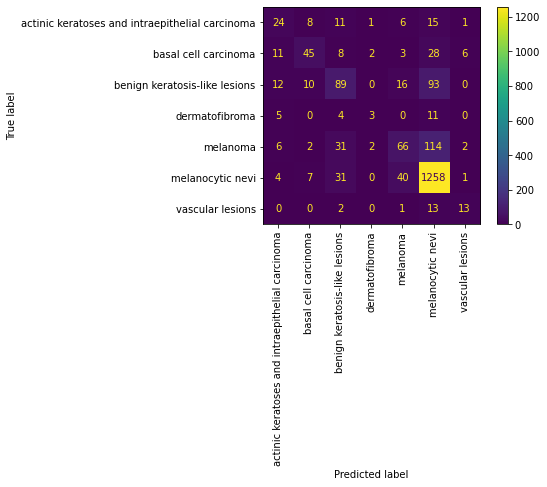

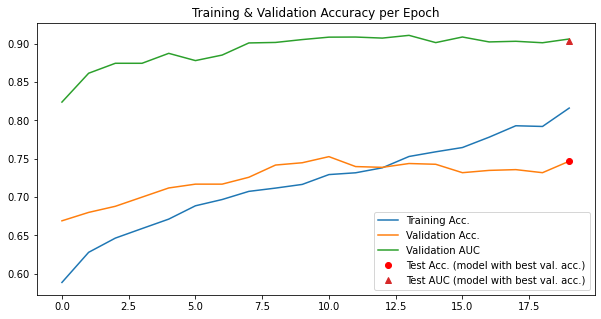

In [40]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [41]:
# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

{
  "python_class": "DermaMNIST",
  "description": "The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3\u00d7600\u00d7450 are resized into 3\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/dermamnist.npz?download=1",
  "MD5": "0744692d530f8e62ec473284d019b0c7",
  "task": "multi-class",
  "label": {
    "0": "actinic keratoses and intraepithelial carcinoma",
    "1": "basal cell carcinoma",
    "2": "benign keratosis-like lesions",
    "3": "dermatofibroma",
    "4": "melanoma",
    "5": "melanocytic nevi",
    "6": "vascular lesions"
  },
  "n_channels": 3,
  "n_samples": {
    "train": 7007,
    "val": 1003,
    "test": 2005
  },
  "license": "CC B

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 106.63it/s]


train -- accuracy: 0.3126
val -- accuracy: 0.5553,  AUC: 0.8497
Epoch 1



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 110.26it/s]


train -- accuracy: 0.4339
val -- accuracy: 0.5085,  AUC: 0.8663
Epoch 2



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 108.00it/s]


train -- accuracy: 0.5081
val -- accuracy: 0.5384,  AUC: 0.8781
Epoch 3



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 105.54it/s]


train -- accuracy: 0.5582
val -- accuracy: 0.6341,  AUC: 0.8925
Epoch 4



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 107.68it/s]


train -- accuracy: 0.5943
val -- accuracy: 0.5773,  AUC: 0.8924
Epoch 5



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 111.27it/s]


train -- accuracy: 0.6462
val -- accuracy: 0.4676,  AUC: 0.8576
Epoch 6



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 111.72it/s]


train -- accuracy: 0.704
val -- accuracy: 0.5623,  AUC: 0.8816
Epoch 7



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 108.09it/s]


train -- accuracy: 0.7588
val -- accuracy: 0.7218,  AUC: 0.9123
Epoch 8



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 109.91it/s]


train -- accuracy: 0.7866
val -- accuracy: 0.6152,  AUC: 0.8957
Epoch 9



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 111.45it/s]


train -- accuracy: 0.8312
val -- accuracy: 0.6371,  AUC: 0.8964
Epoch 10



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 108.60it/s]


train -- accuracy: 0.8542
val -- accuracy: 0.656,  AUC: 0.8932
Epoch 11



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 104.12it/s]


train -- accuracy: 0.87
val -- accuracy: 0.661,  AUC: 0.8933
Epoch 12



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 110.37it/s]


train -- accuracy: 0.8953
val -- accuracy: 0.6231,  AUC: 0.8823
Epoch 13



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 108.76it/s]


train -- accuracy: 0.9155
val -- accuracy: 0.7049,  AUC: 0.9004
Epoch 14



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 108.63it/s]


train -- accuracy: 0.9137
val -- accuracy: 0.7049,  AUC: 0.8908
Epoch 15



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 111.48it/s]


train -- accuracy: 0.9297
val -- accuracy: 0.6351,  AUC: 0.9008
Epoch 16



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 111.16it/s]


train -- accuracy: 0.9415
val -- accuracy: 0.6401,  AUC: 0.8874
Epoch 17



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 111.55it/s]


train -- accuracy: 0.9425
val -- accuracy: 0.6421,  AUC: 0.8731
Epoch 18



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 110.24it/s]


train -- accuracy: 0.9467
val -- accuracy: 0.669,  AUC: 0.8898
Epoch 19



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:01<00:00, 110.75it/s]


train -- accuracy: 0.9609
val -- accuracy: 0.7198,  AUC: 0.9041
test -- accuracy: 0.7302,  AUC: 0.9021


<Figure size 720x720 with 0 Axes>

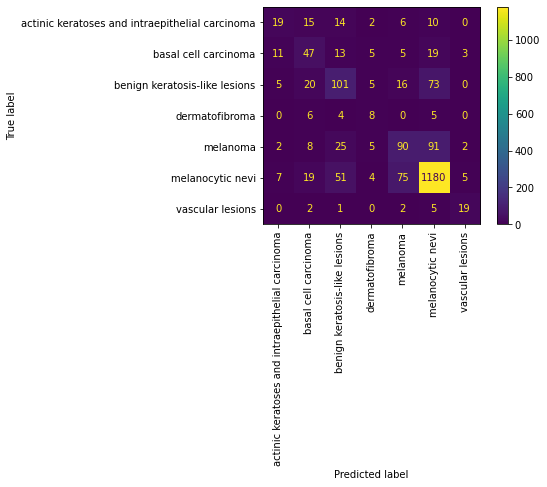

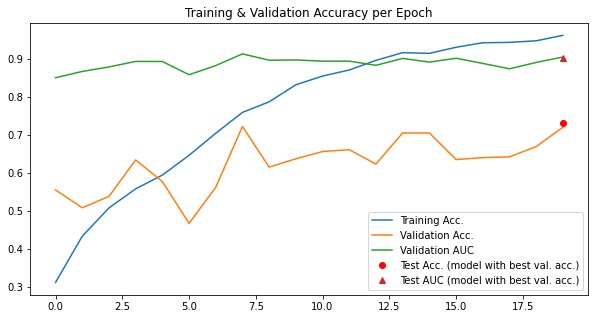

In [42]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

### OctMNIST

#### Training the Conditional VAE

In [43]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "octmnist"
base_dataset = octmnist_noWRS_noGDA

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

Testing Conditional Variational Autoencoder:
Clearing CUDA Pytorch Cache
Model Output size: torch.Size([10, 1, 28, 28])
Forward pass test:  True
{'loss': tensor(8955.3066, grad_fn=<AddBackward0>), 'Reconstruction_Loss': tensor(8955.2139, grad_fn=<MseLossBackward>), 'KLD': tensor(-18.5677, grad_fn=<NegBackward>)}
Loss test:  True
Cuda device:  cuda
Training phase:
Train epoch 1 -- average loss: 17.312155423773444
Validation set loss: 6.726041
Train epoch 2 -- average loss: 7.049885920354529
Validation set loss: 5.928398
Train epoch 3 -- average loss: 5.288755593855133
Validation set loss: 4.049714
Train epoch 4 -- average loss: 4.493984811109863
Validation set loss: 3.492971
Train epoch 5 -- average loss: 3.8335832454374152
Validation set loss: 3.409915
Train epoch 6 -- average loss: 3.4971819283105527
Validation set loss: 2.868931
Train epoch 7 -- average loss: 3.2083501123607405
Validation set loss: 3.090886
Train epoch 8 -- average loss: 2.9625996051827737
Validation set loss: 2.5536

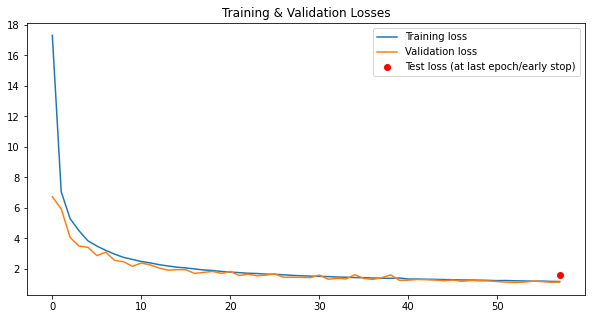

In [44]:
# Runs the conditional VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader, n_channels, latent_dims,  
    n_classes=n_classes, epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="CondVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [45]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/CondVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 4
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

Number of generated images: 3899 (4% of the dataset)


2. <u>Retraining the classifier and assessing changes in performance</u>

{
  "python_class": "OCTMNIST",
  "description": "The OCTMNIST is based on a prior dataset of 109,309 valid optical coherence tomography (OCT) images for retinal diseases. The dataset is comprised of 4 diagnosis categories, leading to a multi-class classification task. We split the source training set with a ratio of 9:1 into training and validation set, and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384\u22121,536)\u00d7(277\u2212512). We center-crop the images and resize them into 1\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/octmnist.npz?download=1",
  "MD5": "c68d92d5b585d8d81f7112f81e2d0842",
  "task": "multi-class",
  "label": {
    "0": "choroidal neovascularization",
    "1": "diabetic macular edema",
    "2": "drusen",
    "3": "normal"
  },
  "n_channels": 1,
  "n_samples": {
    "train": 97477,
    "val": 10832,
    "test": 1000
  },
  "license": "CC BY 4.0"
}
--------------------------------

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:15<00:00, 104.57it/s]


train -- accuracy: 0.7823
val -- accuracy: 0.8345,  AUC: 0.9154
Epoch 1



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 107.45it/s]


train -- accuracy: 0.8458
val -- accuracy: 0.8617,  AUC: 0.9487
Epoch 2



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 110.98it/s]


train -- accuracy: 0.8672
val -- accuracy: 0.878,  AUC: 0.9527
Epoch 3



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 111.74it/s]


train -- accuracy: 0.8803
val -- accuracy: 0.8816,  AUC: 0.9578
Epoch 4



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 112.29it/s]


train -- accuracy: 0.8893
val -- accuracy: 0.8697,  AUC: 0.9605
Epoch 5



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 112.43it/s]


train -- accuracy: 0.8975
val -- accuracy: 0.8963,  AUC: 0.9643
Epoch 6



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 111.89it/s]


train -- accuracy: 0.9049
val -- accuracy: 0.8811,  AUC: 0.9596
Epoch 7



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 112.16it/s]


train -- accuracy: 0.9121
val -- accuracy: 0.8913,  AUC: 0.9643
Epoch 8



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 108.03it/s]


train -- accuracy: 0.9179
val -- accuracy: 0.9025,  AUC: 0.968
Epoch 9



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 111.67it/s]


train -- accuracy: 0.9223
val -- accuracy: 0.9002,  AUC: 0.9661
Epoch 10



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 111.82it/s]


train -- accuracy: 0.9276
val -- accuracy: 0.8988,  AUC: 0.968
Epoch 11



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 111.40it/s]


train -- accuracy: 0.9314
val -- accuracy: 0.9065,  AUC: 0.9702
Epoch 12



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 112.10it/s]


train -- accuracy: 0.9355
val -- accuracy: 0.9078,  AUC: 0.9695
Epoch 13



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 112.01it/s]


train -- accuracy: 0.9404
val -- accuracy: 0.9089,  AUC: 0.9696
Epoch 14



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 111.79it/s]


train -- accuracy: 0.9436
val -- accuracy: 0.9071,  AUC: 0.9689
Epoch 15



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 112.16it/s]


train -- accuracy: 0.9482
val -- accuracy: 0.9052,  AUC: 0.9705
Epoch 16



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 111.93it/s]


train -- accuracy: 0.9506
val -- accuracy: 0.9125,  AUC: 0.9691
Epoch 17



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 111.94it/s]


train -- accuracy: 0.9538
val -- accuracy: 0.9134,  AUC: 0.9704
Epoch 18



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 109.09it/s]


train -- accuracy: 0.9562
val -- accuracy: 0.9135,  AUC: 0.9693
Epoch 19



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 110.39it/s]


train -- accuracy: 0.9583
val -- accuracy: 0.9084,  AUC: 0.9705
test -- accuracy: 0.725,  AUC: 0.9353


<Figure size 720x720 with 0 Axes>

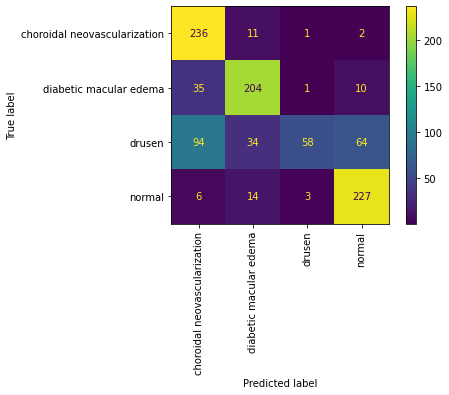

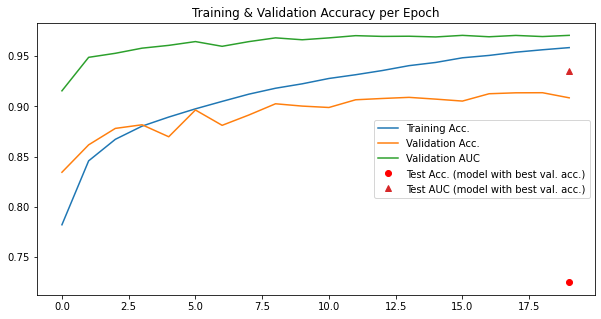

In [46]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [47]:
# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

{
  "python_class": "OCTMNIST",
  "description": "The OCTMNIST is based on a prior dataset of 109,309 valid optical coherence tomography (OCT) images for retinal diseases. The dataset is comprised of 4 diagnosis categories, leading to a multi-class classification task. We split the source training set with a ratio of 9:1 into training and validation set, and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384\u22121,536)\u00d7(277\u2212512). We center-crop the images and resize them into 1\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/octmnist.npz?download=1",
  "MD5": "c68d92d5b585d8d81f7112f81e2d0842",
  "task": "multi-class",
  "label": {
    "0": "choroidal neovascularization",
    "1": "diabetic macular edema",
    "2": "drusen",
    "3": "normal"
  },
  "n_channels": 1,
  "n_samples": {
    "train": 97477,
    "val": 10832,
    "test": 1000
  },
  "license": "CC BY 4.0"
}
--------------------------------

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 109.68it/s]


train -- accuracy: 0.6832
val -- accuracy: 0.7371,  AUC: 0.9308
Epoch 1



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 111.71it/s]


train -- accuracy: 0.8028
val -- accuracy: 0.8506,  AUC: 0.9576
Epoch 2



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 113.01it/s]


train -- accuracy: 0.8383
val -- accuracy: 0.874,  AUC: 0.9634
Epoch 3



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 111.98it/s]


train -- accuracy: 0.8642
val -- accuracy: 0.8793,  AUC: 0.9617
Epoch 4



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 112.86it/s]


train -- accuracy: 0.8796
val -- accuracy: 0.7618,  AUC: 0.9599
Epoch 5



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 112.89it/s]


train -- accuracy: 0.896
val -- accuracy: 0.8429,  AUC: 0.9611
Epoch 6



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 112.55it/s]


train -- accuracy: 0.9066
val -- accuracy: 0.8712,  AUC: 0.9672
Epoch 7



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:15<00:00, 104.11it/s]


train -- accuracy: 0.9181
val -- accuracy: 0.875,  AUC: 0.9644
Epoch 8



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 106.03it/s]


train -- accuracy: 0.9267
val -- accuracy: 0.8803,  AUC: 0.9628
Epoch 9



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 107.12it/s]


train -- accuracy: 0.9345
val -- accuracy: 0.8978,  AUC: 0.9675
Epoch 10



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 107.17it/s]


train -- accuracy: 0.9428
val -- accuracy: 0.8669,  AUC: 0.9641
Epoch 11



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 107.51it/s]


train -- accuracy: 0.9471
val -- accuracy: 0.883,  AUC: 0.9633
Epoch 12



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 111.60it/s]


train -- accuracy: 0.9498
val -- accuracy: 0.8958,  AUC: 0.9654
Epoch 13



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 109.94it/s]


train -- accuracy: 0.9558
val -- accuracy: 0.8714,  AUC: 0.9665
Epoch 14



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 109.85it/s]


train -- accuracy: 0.9597
val -- accuracy: 0.8793,  AUC: 0.9656
Epoch 15



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 113.04it/s]


train -- accuracy: 0.9616
val -- accuracy: 0.8624,  AUC: 0.9634
Epoch 16



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 108.59it/s]


train -- accuracy: 0.9648
val -- accuracy: 0.8936,  AUC: 0.9642
Epoch 17



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 108.33it/s]


train -- accuracy: 0.9675
val -- accuracy: 0.8993,  AUC: 0.9668
Epoch 18



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 110.87it/s]


train -- accuracy: 0.9708
val -- accuracy: 0.9002,  AUC: 0.9656
Epoch 19



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1584/1584 [00:14<00:00, 106.74it/s]


train -- accuracy: 0.974
val -- accuracy: 0.8981,  AUC: 0.9666
test -- accuracy: 0.741,  AUC: 0.9199


<Figure size 720x720 with 0 Axes>

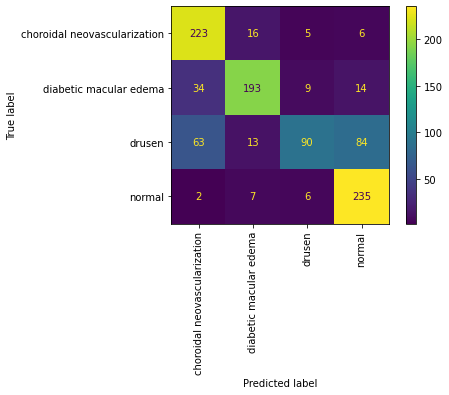

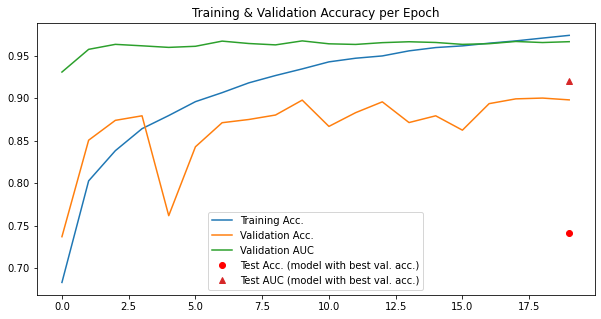

In [48]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

### PneumoniaMNIST

#### Training the Conditional VAE

In [49]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "pneumoniamnist"
base_dataset = pneumoniamnist_noWRS_noGDA

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

In [50]:
# Runs the conditional VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader, n_channels, latent_dims,  
    n_classes=n_classes, epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="CondVAE"
)

Testing Conditional Variational Autoencoder:
Clearing CUDA Pytorch Cache
Model Output size: torch.Size([10, 1, 28, 28])
Forward pass test:  True
{'loss': tensor(8657.9404, grad_fn=<AddBackward0>), 'Reconstruction_Loss': tensor(8657.8428, grad_fn=<MseLossBackward>), 'KLD': tensor(-19.6081, grad_fn=<NegBackward>)}
Loss test:  True
Cuda device:  cuda
Training phase:


KeyboardInterrupt: 

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/CondVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

### BreastMNIST

#### Training the Conditional VAE

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "breastmnist"
base_dataset = breastmnist_noWRS_noGDA

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

In [ ]:
# Runs the conditional VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader, n_channels, latent_dims,  
    n_classes=n_classes, epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="CondVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/CondVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

### OrganaMNIST

#### Training the Conditional VAE

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "organamnist"
base_dataset = organamnist_noWRS_noGDA

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

In [ ]:
# Runs the conditional VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader, n_channels, latent_dims,  
    n_classes=n_classes, epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="CondVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/CondVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 5
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

### OrgancMNIST

#### Training the Conditional VAE

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "organcmnist"
base_dataset = organcmnist_noWRS_noGDA

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

In [ ]:
# Runs the conditional VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader, n_channels, latent_dims,  
    n_classes=n_classes, epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="CondVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/CondVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

### OrgansMNIST

#### Training the Conditional VAE

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "organsmnist"
base_dataset = organsmnist_noWRS_noGDA

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

In [ ]:
# Runs the conditional VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader, n_channels, latent_dims,  
    n_classes=n_classes, epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="CondVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/CondVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

## 5. Training a Joint Variational Autoencoder 

We train a Joint Variational Autoencoder for data augmentation for each of the datasets. 

For each dataset, we then retrain the underlying baseline classifier.

In [ ]:
# Declares the Joint VAE's hyperparameters
latent_dims = 100
categorical_dims = 50
epochs = 200

### PathMNIST

#### Training the Joint VAE

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "pathmnist"
base_dataset = pathmnist_noWRS_noGDA

# Retrieves the dataset parameters
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

In [ ]:
# Runs the Joint VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader,  n_channels, 
    latent_dims, categorical_dims=categorical_dims,
    epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="JointVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/JointVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 4
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, jointVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, jointVAE_loader)

### DermaMNIST

#### Training the Joint VAE

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "dermamnist"
base_dataset = dermamnist_noWRS_noGDA

# Retrieves the dataset parameters
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

In [ ]:
# Runs the Joint VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader,  n_channels, 
    latent_dims, categorical_dims=categorical_dims,
    epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="JointVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/JointVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, jointVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, jointVAE_loader)

### OctMNIST

#### Training the Joint VAE

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "octmnist"
base_dataset = octmnist_noWRS_noGDA

# Retrieves the dataset parameters
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

In [ ]:
# Runs the Joint VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader,  n_channels, 
    latent_dims, categorical_dims=categorical_dims,
    epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="JointVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/JointVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 4
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, jointVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, jointVAE_loader)

### PneumoniaMNIST

#### Training the Joint VAE

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "pneumoniamnist"
base_dataset = pneumoniamnist_noWRS_noGDA

# Retrieves the dataset parameters
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

In [ ]:
# Runs the Joint VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader,  n_channels, 
    latent_dims, categorical_dims=categorical_dims,
    epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="JointVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/JointVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, jointVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, jointVAE_loader)

### BreastMNIST

#### Training the Joint VAE

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "breastmnist"
base_dataset = breastmnist_noWRS_noGDA

# Retrieves the dataset parameters
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

In [ ]:
# Runs the Joint VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader,  n_channels, 
    latent_dims, categorical_dims=categorical_dims,
    epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="JointVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/JointVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, jointVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, jointVAE_loader)

### OrganaMNIST

#### Training the Joint VAE

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "organamnist"
base_dataset = organamnist_noWRS_noGDA

# Retrieves the dataset parameters
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

In [ ]:
# Runs the Joint VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader,  n_channels, 
    latent_dims, categorical_dims=categorical_dims,
    epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="JointVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/JointVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 5
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, jointVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, jointVAE_loader)

### OrgancMNIST

#### Training the Joint VAE

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "organcmnist"
base_dataset = organcmnist_noWRS_noGDA

# Retrieves the dataset parameters
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

In [ ]:
# Runs the Joint VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader,  n_channels, 
    latent_dims, categorical_dims=categorical_dims,
    epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="JointVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/JointVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, jointVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, jointVAE_loader)

### OrgansMNIST

#### Training the Joint VAE

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "organsmnist"
base_dataset = organsmnist_noWRS_noGDA

# Retrieves the dataset parameters
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

In [ ]:
# Runs the Joint VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader,  n_channels, 
    latent_dims, categorical_dims=categorical_dims,
    epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="JointVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/JointVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, jointVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, jointVAE_loader)

## 6. Training a Conditional Generative Adversarial Network 

We train a Conditional Generative Adversarial Network Autoencoder for data augmentation for each of the datasets. 

For each dataset, we then retrain the underlying baseline classifier.

In [ ]:
# Declares the number of epochs and the model's latent dimensions
latent_dims = 128
epochs = 100

### PathMNIST

#### Training the Conditional GAN

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "pathmnist"
base_dataset = pathmnist_noWRS_noGDA_upscaled

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3] #####################################################
val_loader = base_dataset[5]   ### OF NOTE #########################################
test_loader = base_dataset[4]  ### EVALUATE/TEST NOT IMPLEMENTED YET IN ############
                               ### TORCHFUSION AT THE TIME OF CREATION OF NOTEBOOK #
                               ### Thus the use of None below in the pipeline ######
                               #####################################################

In [ ]:
# Runs the Cond GAN
run_GAN_pipeline(
    train_loader, None, None, #val_loader, test_loader, 
    n_channels, latent_dims, n_classes,
    epochs=epochs, name_dataset=name_dataset
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Removes saved intermediary models
model_path = f"trained_models/conditionalGAN/{name_dataset}/gen_models/"
models = [x for x in os.listdir(model_path) 
          if x[-(4+len(str(epochs))):]!=f"{epochs}.pth"]
for model in models:
    os.remove(model_path+model)
# Fetches the generated GAN Model model to import
model_path += f"gen_model_{epochs}.pth"

# Calculates the number of images to generate
percentage = 4
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

### DermaMNIST

#### Training the Conditional GAN

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "dermamnist"
base_dataset = dermamnist_noWRS_noGDA_upscaled

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3] #####################################################
val_loader = base_dataset[5]   ### OF NOTE #########################################
test_loader = base_dataset[4]  ### EVALUATE/TEST NOT IMPLEMENTED YET IN ############
                               ### TORCHFUSION AT THE TIME OF CREATION OF NOTEBOOK #
                               ### Thus the use of None below in the pipeline ######
                               #####################################################

In [ ]:
# Runs the Cond GAN
run_GAN_pipeline(
    train_loader, None, None, #val_loader, test_loader, 
    n_channels, latent_dims, n_classes,
    epochs=epochs, name_dataset=name_dataset
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Removes saved intermediary models
model_path = f"trained_models/conditionalGAN/{name_dataset}/gen_models/"
models = [x for x in os.listdir(model_path) 
          if x[-(4+len(str(epochs))):]!=f"{epochs}.pth"]
for model in models:
    os.remove(model_path+model)
# Fetches the generated GAN Model model to import
model_path += f"gen_model_{epochs}.pth"

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

### OctMNIST

#### Training the Conditional GAN

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "octmnist"
base_dataset = octmnist_noWRS_noGDA_upscaled

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3] #####################################################
val_loader = base_dataset[5]   ### OF NOTE #########################################
test_loader = base_dataset[4]  ### EVALUATE/TEST NOT IMPLEMENTED YET IN ############
                               ### TORCHFUSION AT THE TIME OF CREATION OF NOTEBOOK #
                               ### Thus the use of None below in the pipeline ######
                               #####################################################

In [ ]:
# Runs the Cond GAN
run_GAN_pipeline(
    train_loader, None, None, #val_loader, test_loader, 
    n_channels, latent_dims, n_classes,
    epochs=epochs, name_dataset=name_dataset
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Removes saved intermediary models
model_path = f"trained_models/conditionalGAN/{name_dataset}/gen_models/"
models = [x for x in os.listdir(model_path) 
          if x[-(4+len(str(epochs))):]!=f"{epochs}.pth"]
for model in models:
    os.remove(model_path+model)
# Fetches the generated GAN Model model to import
model_path += f"gen_model_{epochs}.pth"

# Calculates the number of images to generate
percentage = 4
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

### PneumoniaMNIST

#### Training the Conditional GAN

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "pneumoniamnist"
base_dataset = pneumoniamnist_noWRS_noGDA_upscaled

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3] #####################################################
val_loader = base_dataset[5]   ### OF NOTE #########################################
test_loader = base_dataset[4]  ### EVALUATE/TEST NOT IMPLEMENTED YET IN ############
                               ### TORCHFUSION AT THE TIME OF CREATION OF NOTEBOOK #
                               ### Thus the use of None below in the pipeline ######
                               #####################################################

In [ ]:
# Runs the Cond GAN
run_GAN_pipeline(
    train_loader, None, None, #val_loader, test_loader, 
    n_channels, latent_dims, n_classes,
    epochs=epochs, name_dataset=name_dataset
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Removes saved intermediary models
model_path = f"trained_models/conditionalGAN/{name_dataset}/gen_models/"
models = [x for x in os.listdir(model_path) 
          if x[-(4+len(str(epochs))):]!=f"{epochs}.pth"]
for model in models:
    os.remove(model_path+model)
# Fetches the generated GAN Model model to import
model_path += f"gen_model_{epochs}.pth"

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

### BreastMNIST

#### Training the Conditional GAN

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "breastmnist"
base_dataset = breastmnist_noWRS_noGDA_upscaled

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3] #####################################################
val_loader = base_dataset[5]   ### OF NOTE #########################################
test_loader = base_dataset[4]  ### EVALUATE/TEST NOT IMPLEMENTED YET IN ############
                               ### TORCHFUSION AT THE TIME OF CREATION OF NOTEBOOK #
                               ### Thus the use of None below in the pipeline ######
                               #####################################################

In [ ]:
# Runs the Cond GAN
run_GAN_pipeline(
    train_loader, None, None, #val_loader, test_loader, 
    n_channels, latent_dims, n_classes,
    epochs=epochs, name_dataset=name_dataset
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Removes saved intermediary models
model_path = f"trained_models/conditionalGAN/{name_dataset}/gen_models/"
models = [x for x in os.listdir(model_path) 
          if x[-(4+len(str(epochs))):]!=f"{epochs}.pth"]
for model in models:
    os.remove(model_path+model)
# Fetches the generated GAN Model model to import
model_path += f"gen_model_{epochs}.pth"

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

### OrganaMNIST

#### Training the Conditional GAN

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "organamnist"
base_dataset = organamnist_noWRS_noGDA_upscaled

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3] #####################################################
val_loader = base_dataset[5]   ### OF NOTE #########################################
test_loader = base_dataset[4]  ### EVALUATE/TEST NOT IMPLEMENTED YET IN ############
                               ### TORCHFUSION AT THE TIME OF CREATION OF NOTEBOOK #
                               ### Thus the use of None below in the pipeline ######
                               #####################################################

In [ ]:
# Runs the Cond GAN
run_GAN_pipeline(
    train_loader, None, None, #val_loader, test_loader, 
    n_channels, latent_dims, n_classes,
    epochs=epochs, name_dataset=name_dataset
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Removes saved intermediary models
model_path = f"trained_models/conditionalGAN/{name_dataset}/gen_models/"
models = [x for x in os.listdir(model_path) 
          if x[-(4+len(str(epochs))):]!=f"{epochs}.pth"]
for model in models:
    os.remove(model_path+model)
# Fetches the generated GAN Model model to import
model_path += f"gen_model_{epochs}.pth"

# Calculates the number of images to generate
percentage = 5
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

### OrgancMNIST

#### Training the Conditional GAN

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "organcmnist"
base_dataset = organcmnist_noWRS_noGDA_upscaled

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3] #####################################################
val_loader = base_dataset[5]   ### OF NOTE #########################################
test_loader = base_dataset[4]  ### EVALUATE/TEST NOT IMPLEMENTED YET IN ############
                               ### TORCHFUSION AT THE TIME OF CREATION OF NOTEBOOK #
                               ### Thus the use of None below in the pipeline ######
                               #####################################################

In [ ]:
# Runs the Cond GAN
run_GAN_pipeline(
    train_loader, None, None, #val_loader, test_loader, 
    n_channels, latent_dims, n_classes,
    epochs=epochs, name_dataset=name_dataset
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Removes saved intermediary models
model_path = f"trained_models/conditionalGAN/{name_dataset}/gen_models/"
models = [x for x in os.listdir(model_path) 
          if x[-(4+len(str(epochs))):]!=f"{epochs}.pth"]
for model in models:
    os.remove(model_path+model)
# Fetches the generated GAN Model model to import
model_path += f"gen_model_{epochs}.pth"

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

### OrgansMNIST

#### Training the Conditional GAN

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "organsmnist"
base_dataset = organsmnist_noWRS_noGDA_upscaled

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3] #####################################################
val_loader = base_dataset[5]   ### OF NOTE #########################################
test_loader = base_dataset[4]  ### EVALUATE/TEST NOT IMPLEMENTED YET IN ############
                               ### TORCHFUSION AT THE TIME OF CREATION OF NOTEBOOK #
                               ### Thus the use of None below in the pipeline ######
                               #####################################################

In [ ]:
# Runs the Cond GAN
run_GAN_pipeline(
    train_loader, None, None, #val_loader, test_loader, 
    n_channels, latent_dims, n_classes,
    epochs=epochs, name_dataset=name_dataset
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Removes saved intermediary models
model_path = f"trained_models/conditionalGAN/{name_dataset}/gen_models/"
models = [x for x in os.listdir(model_path) 
          if x[-(4+len(str(epochs))):]!=f"{epochs}.pth"]
for model in models:
    os.remove(model_path+model)
# Fetches the generated GAN Model model to import
model_path += f"gen_model_{epochs}.pth"

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)